<img align="right" src="https://www.tedu.edu.tr/themes/custom/tedu/logo.svg" width="350px" height="350px"/>
<h1 style="font-size:20pt"> IE547 PROJECT | IE547 PROJECT </h1><br/>
<b> Author: </b> Gonca AVCI CAKMAK<br/>
<b> Created: </b>04 January 2023<br/>


## Table of Contents:

* [1. Loading Necesarry Liblaries](#oading-neccessary-libraries)
* [2. Description And Loading Gas Emission Dataset](#description-loading-dataset)
* [3. Data Preparation](#data-preparation)
* [4. Explonatory Data Analysis](#explonatory-data-analysis)
* [5. Hypothesis Testing](#hypothesis-testing)
* [6. Linear Regression](#linear-regression)
* [7. Refrences](#references)


### 1. LOADING NECCESSARY LIBRARY<a class="anchor" id="loading-neccessary-libraries"></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from dython.nominal import associations
import statsmodels.api as sm
import datetime, scipy
from scipy.stats import chisquare, anderson
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from statsmodels.stats.weightstats import ztest
from sklearn import preprocessing
from scipy.stats import ttest_1samp, binom,uniform,chi2, chisquare,norm
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from scipy.special import inv_boxcox
import warnings
#sets the default autosave frequency in seconds
#%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
np.random.seed(0)
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
np.set_printoptions(suppress=True)
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import glob, os
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

### 2. DESCRIPTION AND LOADING GAS EMISSION DATASET<a class="anchor" id="description-loading-dataset"></a>

Data Set Information:

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine located in Turkey's north western region for the purpose of studying flue gas emissions, namely CO and NOx (NO + NO2). The data comes from the same power plant as the dataset <http://archive.ics.uci.edu/ml/datasets/Gas+Turbine+CO+and+NOx+Emission+Data+Set.com> used for predicting hourly net energy yield. By contrast, this data is collected in another data range (01.01.2011 - 31.12.2015), includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables. Note that the dates are not given in the instances but the data are sorted in chronological order. 

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

-Variable (Abbr.) Unit Min Max Mean

-Ambient temperature (AT) C â€“6.23 37.10 17.71

-Ambient pressure (AP) mbar 985.85 1036.56 1013.07

-Ambient humidity (AH) (%) 24.08 100.20 77.87

-Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93

-Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56

-Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43

-Turbine after temperature (TAT) C 511.04 550.61 546.16

-Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06

-Turbine energy yield (TEY) MWH 100.02 179.50 133.51

-Carbon monoxide (CO) mg/m3 0.00 44.10 2.37

-Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

Purpose of this Project:
We try to predict TEY (Turbine energy yield ) with the help of some gas ratio and pressure, temperature , humudity in atmosphere and turbine inner features. For the best prediction of the powerplant's TEY(TURBİNE ENERGY YIELD):

- Preparation of data like eliminating outlier, dealing with missing values for plotting ,testing, modelling

- Understanding data statistical features like mean, standart deviation,etc..

- Plotting variables features and their relations, 

- Applying hypothesis test to make inferences on the aspects of probability of admission chances.

- Check assumptions for llinear regression and if necesarry making transformation of variables

- Conduct linear regression, evaluate results of model

- Improving  linear regression to find better result

- if it is not suitable try to other regression models and making evaluation and improving processes again for each model.

- Deciding Final model and making a conclusion


In [2]:
df_2011=pd.read_csv('gt_2011.csv')
df_2012=pd.read_csv('gt_2012.csv')
df_2013=pd.read_csv('gt_2013.csv')
df_2014=pd.read_csv('gt_2014.csv')
df_2015=pd.read_csv('gt_2015.csv')

In [3]:
df_2011['year']= '2011'
df_2011['year'] = pd.to_datetime(df_2011['year'])
df_2011['year'] = pd.to_datetime(df_2011['year']).dt.year

In [4]:
df_2012['year']= '2012'
df_2012['year'] = pd.to_datetime(df_2012['year'])
df_2012['year'] = pd.to_datetime(df_2012['year']).dt.year

In [5]:
df_2013['year']= '2013'
df_2013['year'] = pd.to_datetime(df_2013['year'])
df_2013['year'] = pd.to_datetime(df_2013['year']).dt.year

In [6]:
df_2014['year']= '2014'
df_2014['year'] = pd.to_datetime(df_2014['year'])
df_2014['year'] = pd.to_datetime(df_2014['year']).dt.year

In [7]:
df_2015['year']= '2015'
df_2015['year'] = pd.to_datetime(df_2015['year'])
df_2015['year'] = pd.to_datetime(df_2015['year']).dt.year

In [8]:
df_total=pd.concat([df_2011,df_2012,df_2013,df_2014,df_2015],axis=0)

In [9]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
 11  year    36733 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 3.6 MB


In [10]:
df_total.describe().T

count         mean        std          min        25%        50%        75%        max
AT    36733.0    17.712726   7.447451    -6.234800    11.7810    17.8010    23.6650    37.1030
AP    36733.0  1013.070165   6.463346   985.850000  1008.8000  1012.6000  1017.0000  1036.6000
AH    36733.0    77.867015  14.461355    24.085000    68.1880    80.4700    89.3760   100.2000
AFDP  36733.0     3.925518   0.773936     2.087400     3.3556     3.9377     4.3769     7.6106
GTEP  36733.0    25.563801   4.195957    17.698000    23.1290    25.1040    29.0610    40.7160
TIT   36733.0  1081.428084  17.536373  1000.800000  1071.8000  1085.9000  1097.0000  1100.9000
TAT   36733.0   546.158517   6.842360   511.040000   544.7200   549.8800   550.0400   550.6100
TEY   36733.0   133.506404  15.618634   100.020000   124.4500   133.7300   144.0800   179.5000
CDP   36733.0    12.060525   1.088795     9.851800    11.4350    11.9650    12.8550    15.1590
CO    36733.0     2.372468   2.262672     0.000388     1.1824     1.7135     2.8429    44.1030
NOX   36733.0    65.293067  11.678357    25.905000    57.1620    63.8490    71.5480   119.9100
year  36733.0  2012.985735   1.418965  2011.000000  2012.0000  2013.0000  2014.0000  2015.0000

RESULT= Our dependent variables (TEY) has 133.50 mean with 15.61 standard deviation that can be  not bad distribution. Mean and median (133.70) are almost same and also its minimum (100) and maximum (179) value are not so different that mean its distributions can be close normal. 

AT has 17.71 mean with 7.44 standard deviation that may not be bad distribution. Mean and median (17.80) are almost same but its minimum (-6) and maximum (37.1) value are different from each other that mean its distributions can be not close normal. But we are not sure before make testings. 

AP has 1013.07 mean with 6.46 standard deviation that may not be bad distribution. Mean and median (1017.0) are almost same and also its minimum (985) and maximum (1036) value are not so different that mean its distributions can be close normal.But we are not sure before testing.

AH has 77.86 mean with 14.46 standard deviation that may not be  bad distribution. Mean and median (80.47) are not so different and its minimum (68) and maximum (100) value are not so different that mean its distributions can be  close normal. But we are not sure before testing.

AFDP has 3.92 mean with 0.77 standard deviation that can be  good distribution. Mean and median (3.93) are almost same but its minimum (2.08) and maximum (7.61) value are  different that mean its distributions can not be close normal.But we are not sure before testing. 

GTEP  has 25.56 mean with 4.19 standard deviation that can be  not SO good distribution. Mean and median (25.10) are almost same BUT its minimum (23.12) and maximum (40.71) value are different that mean its distributions can not be close normal.But we are not sure before testing. 

TIT has 1081.42 mean with 17.53 standard deviation that can be good distribution. Mean and median (1085.90) are almost same and also its minimum (1071.8) and maximum (1100.0) value are not so different that mean its distributions can be  close normal. But we are not sure before testing.


TAT has 546.15 mean with 17.53 standard deviation that can be good. Mean and median (549.8) are almost same and also its minimum (511) and maximum (550) value are not so different that mean its distributions can be close normal.But we are not sure before testing. 


TEY has 133.5 mean with 15.61 standard deviation that can be good distribution. Mean and median (133.7) are almost same and also its minimum (100) and maximum (179) value are not so different that mean its distributions can be  close normal. But we are not sure before testing.


CDP has 12.06 mean with 1.088 standard deviation that can be good distribution. Mean and median (11.96) are almost same and also its minimum (9.85) and maximum (15.159) value are not so different that mean its distributions can be close normal.But we are not sure before testing. 


CO has 2.37 mean with 2.26 standard deviation that is not good distribution. Mean and median (1.71) arevery different and  its minimum (0.0003) and maximum (44.1) value are so different that mean its distributions can not be close normal. But we are not sure before testing.


NOX has 65.29 mean with 11.67 standard deviation that may not be good distribution. Mean and median (71.54) are not so close and also its minimum (25.9) and maximum (119.9) value are  so different that mean its distributions is not be close normal.But we are not sure before test 


In [11]:
df_total.head()

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP       CO     NOX  year
0  4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  134.67  11.898  0.32663  81.952  2011
1  4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  134.67  11.892  0.44784  82.377  2011
2  3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  135.10  12.042  0.45144  83.776  2011
3  3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  135.03  11.990  0.23107  82.505  2011
4  3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  134.67  11.910  0.26747  82.028  2011

### 3. DATA PREPARATION<a class="anchor" id="data-preparation"></a>

#### 3.1. DEALING WITH MISSING VALUES

In [12]:
df_total.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
year    0
dtype: int64

RESULT= We do not have any misiing value so we miss this part without doing nothing.

#### 3.2. DEALING WITH OUTLIER 
**Before dealing with outlier we have to decide which variables taht we use for linear regression or we can say which independent variables that have meaningfull relation with dependent variables.**

In [13]:
lists=[]
for label, content in df_total.items():
    if pd.api.types.is_numeric_dtype(content):
        lists.append(label)
print(lists)

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX', 'year']


In [14]:
df_cor=df_total[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']]

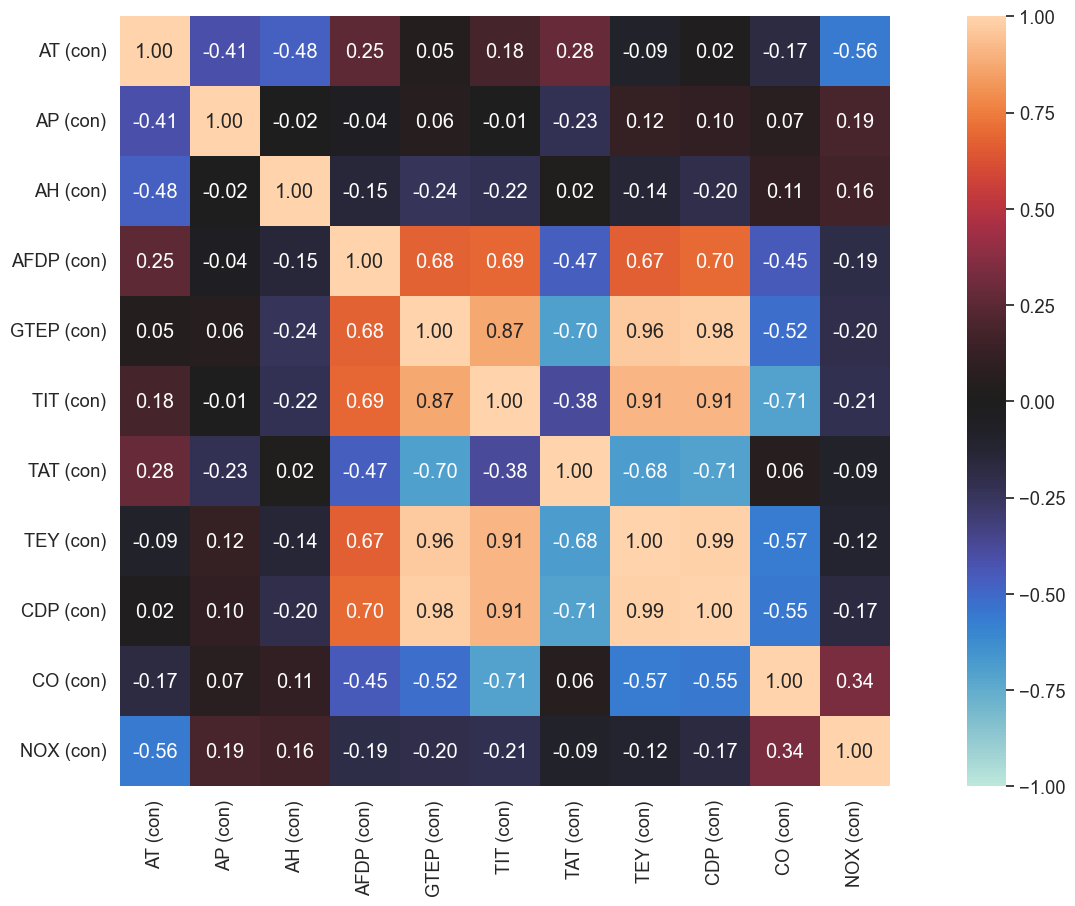

{'corr':             AT (con)  AP (con)  AH (con)  AFDP (con)  GTEP (con)  TIT (con)  TAT (con)  TEY (con)  CDP (con)  CO (con)  NOX (con)
 AT (con)    1.000000 -0.406601 -0.476291    0.251974    0.045851   0.183706   0.281869  -0.091152   0.015287 -0.174326  -0.558174
 AP (con)   -0.406601  1.000000 -0.015184   -0.040363    0.057533  -0.005390  -0.225601   0.118224   0.102636  0.067050   0.191938
 AH (con)   -0.476291 -0.015184  1.000000   -0.147840   -0.235153  -0.221809   0.022965  -0.137360  -0.196275  0.106586   0.164617
 AFDP (con)  0.251974 -0.040363 -0.147840    1.000000    0.678485   0.691292  -0.466882   0.665483   0.702568 -0.448425  -0.188247
 GTEP (con)  0.045851  0.057533 -0.235153    0.678485    1.000000   0.874234  -0.699703   0.964127   0.978470 -0.518909  -0.201630
 TIT (con)   0.183706 -0.005390 -0.221809    0.691292    0.874234   1.000000  -0.380862   0.910297   0.908469 -0.706275  -0.213865
 TAT (con)   0.281869 -0.225601  0.022965   -0.466882   -0.699703  -0.38086

In [15]:
associations(df_cor,figsize=(20,10),mark_columns=True)

**3.2.1.RESULT =  We can see relation betwween variables with dependent variables (TEY).
Beside we can decide which variables include linear Regression which ones does not. For linear regression we mustt have independent variables that have strong relations with dependent variables. Theorically for a good linear regression model we need independent variables that have corelation with dependent variables between 0.7 and 0.9. But in this project we take variables that have correlation between 0.9 and 0.5 with TEY
We can see most correleated vairables with dependent variables.** 

In [16]:
#Finding dependent variables corelation rate with dependent variable in descending order
corr_matrix = df_total.corr()
a=corr_matrix["TEY"].sort_values(ascending=False)
print(a)

TEY     1.000000
CDP     0.988778
GTEP    0.964127
TIT     0.910297
AFDP    0.665483
AP      0.118224
year   -0.029414
AT     -0.091152
NOX    -0.116127
AH     -0.137360
CO     -0.569813
TAT    -0.682396
Name: TEY, dtype: float64


In [17]:
# delling unnecassary columns
df=df_total.drop(['AT','AH','AP','NOX'],axis=1)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFDP    36733 non-null  float64
 1   GTEP    36733 non-null  float64
 2   TIT     36733 non-null  float64
 3   TAT     36733 non-null  float64
 4   TEY     36733 non-null  float64
 5   CDP     36733 non-null  float64
 6   CO      36733 non-null  float64
 7   year    36733 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 2.5 MB


#### 3.2. ELIMINATING OUTLIER

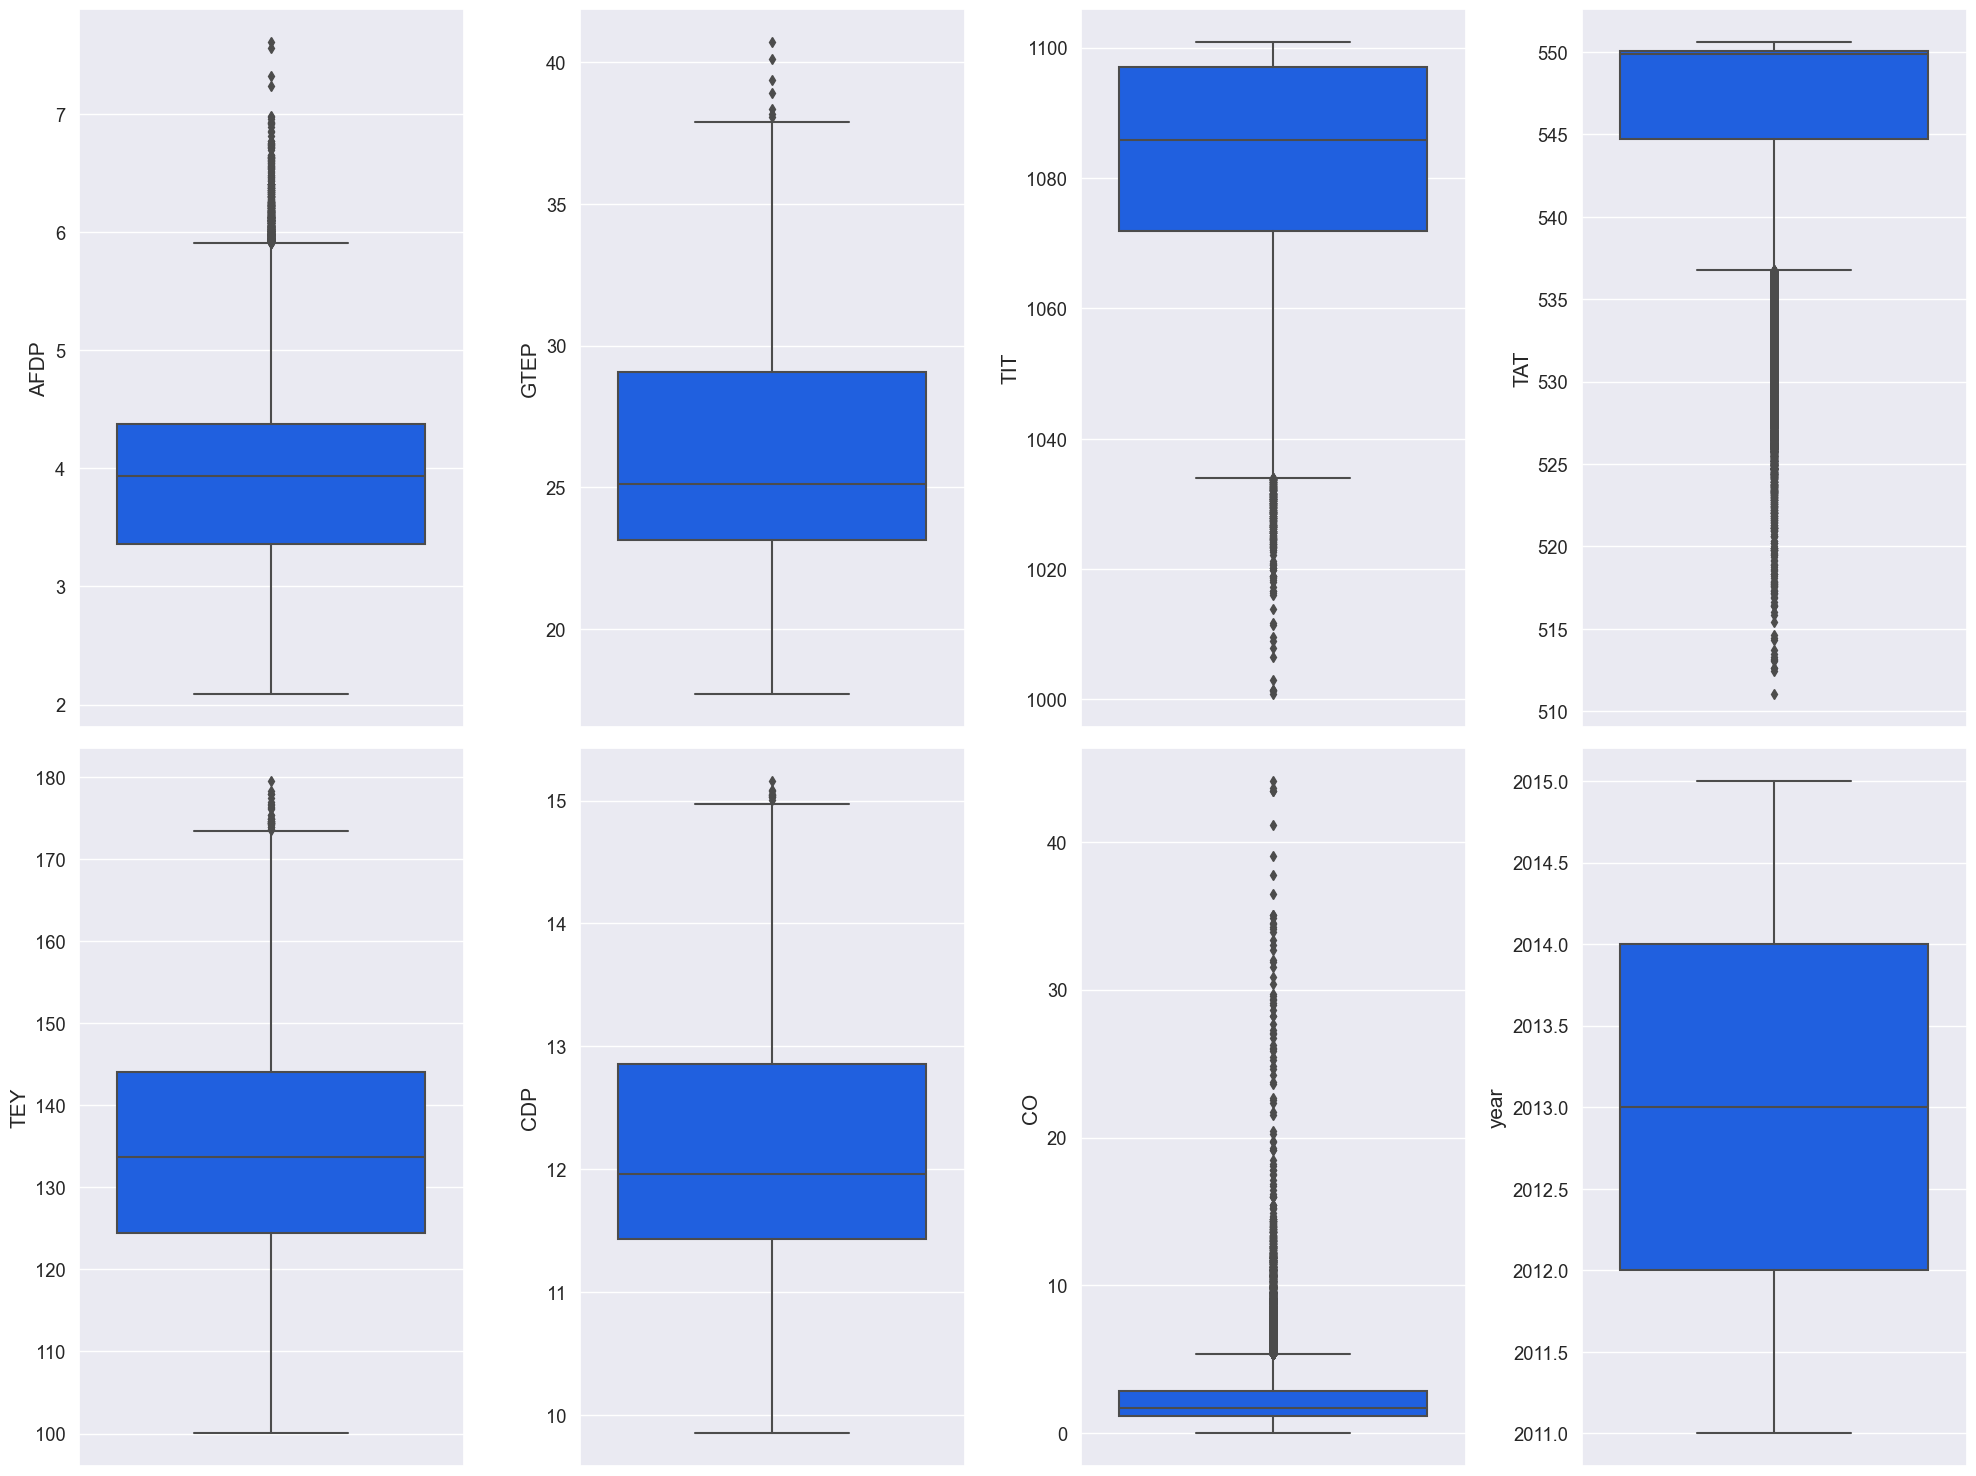

In [19]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))
OrderedCols = df.select_dtypes(exclude='object')
fig, ax = plt.subplots(2, 4, figsize=(20,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4

    sns.boxplot(data=df, y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

#### Eliminating Outliers with Percentage Methods

In [20]:
def cap_data(df):
    for col in df.select_dtypes(exclude='object').columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)

capping the  AFDP
capping the  GTEP
capping the  TIT
capping the  TAT
capping the  TEY
capping the  CDP
capping the  CO
capping the  year


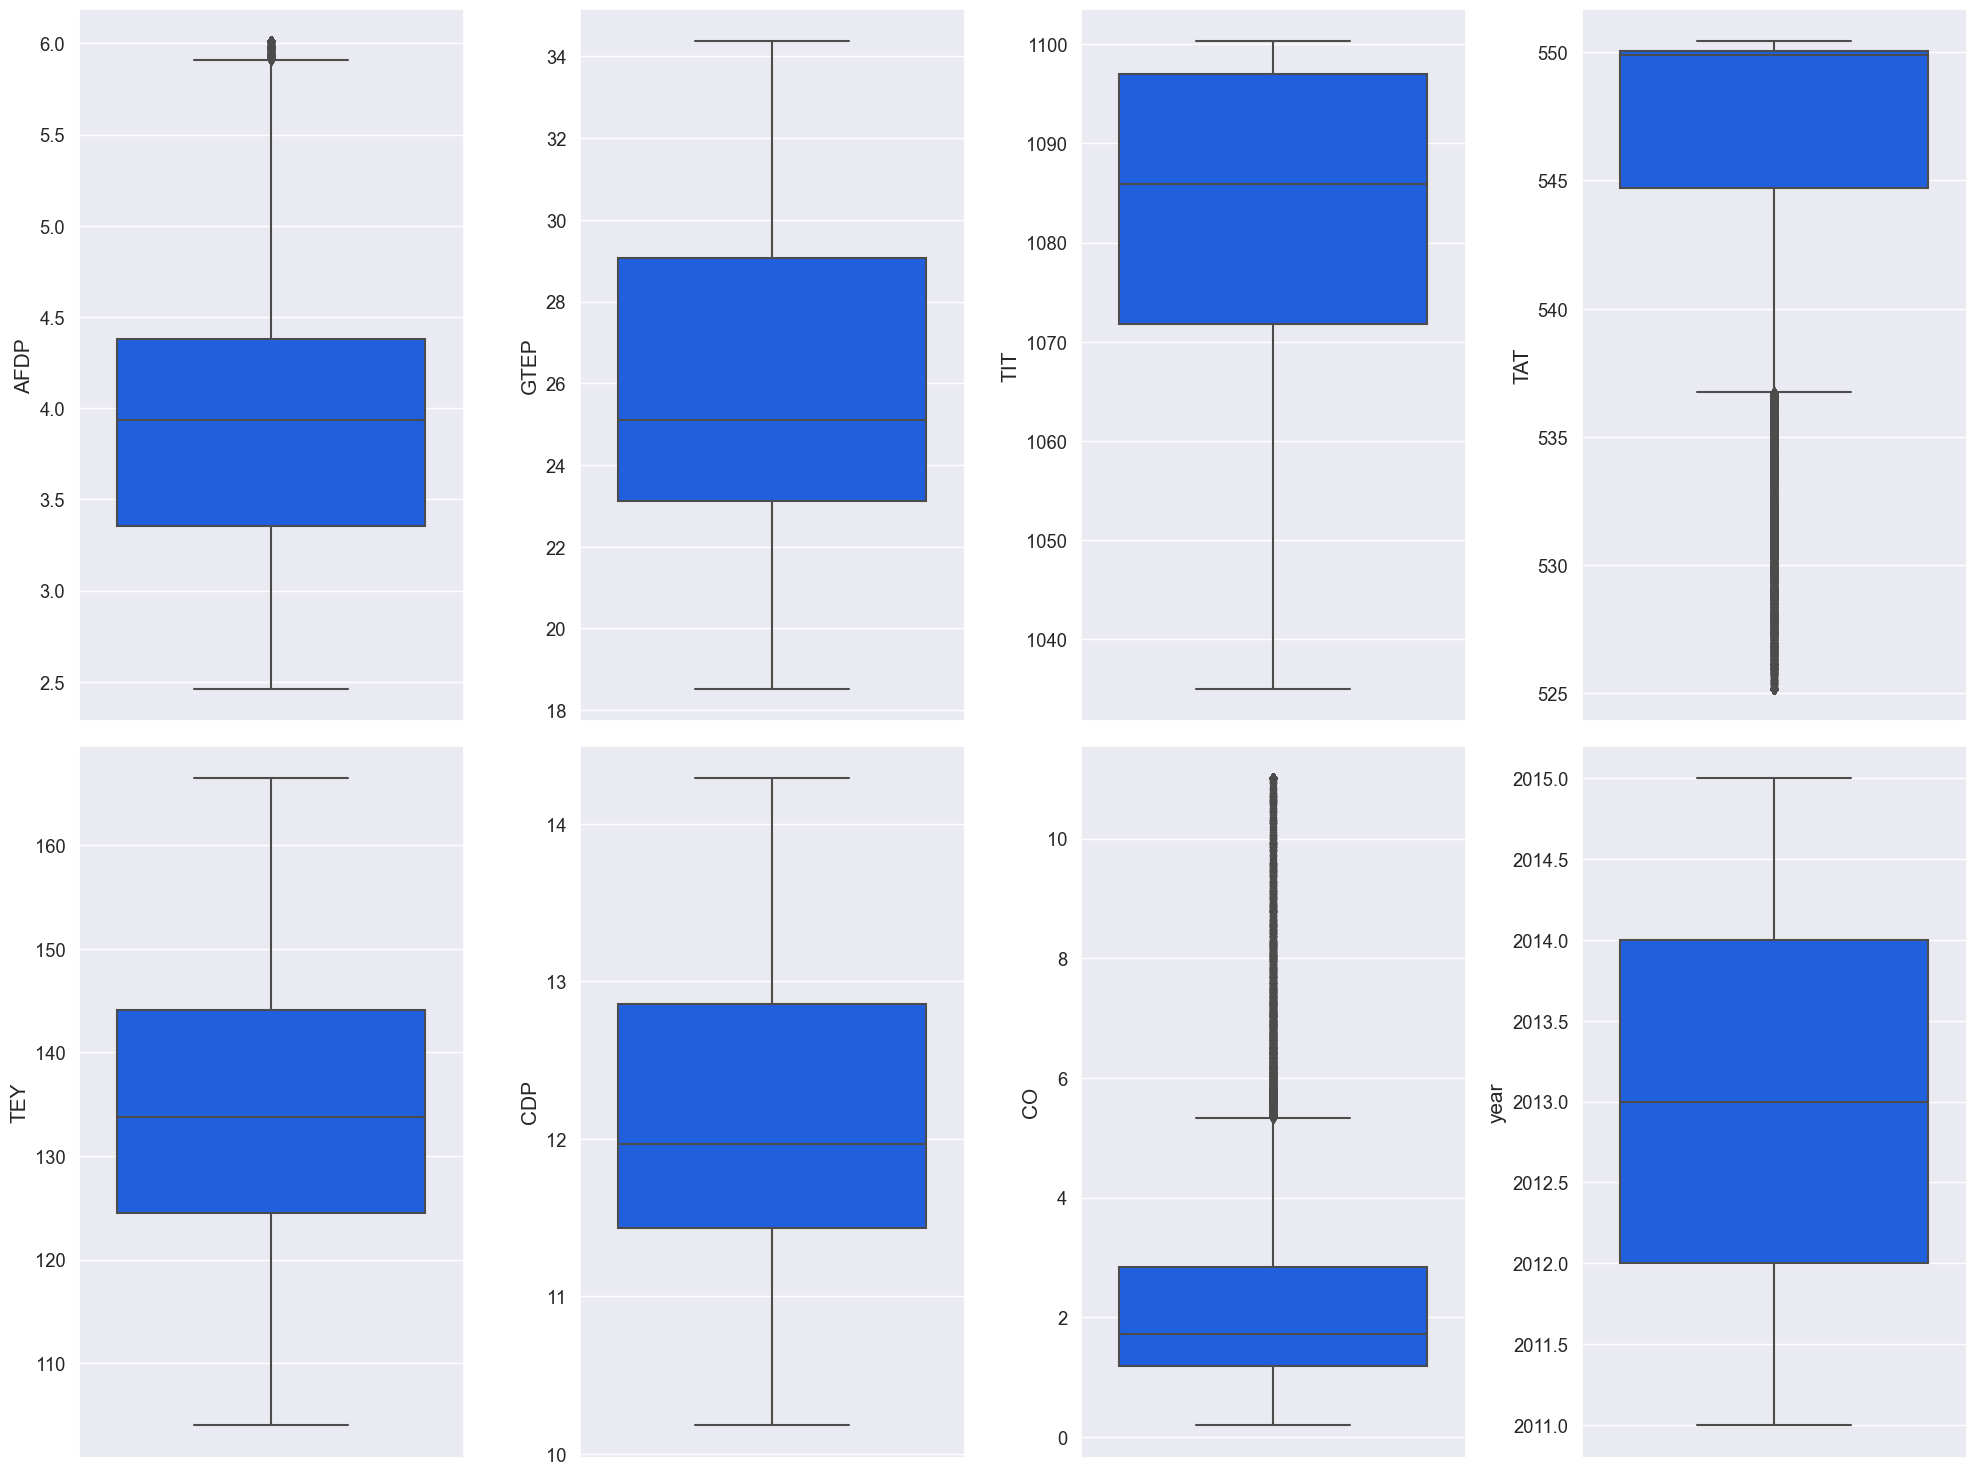

In [21]:
sns.set_style('darkgrid')
colors = ['#0055ff', '#ff7000', '#23bf00']
CustomPalette = sns.set_palette(sns.color_palette(colors))

OrderedCols = df

fig, ax = plt.subplots(2, 4, figsize=(20,15),dpi=100)

for i,col in enumerate(OrderedCols):
    x = i//4
    y = i%4

    sns.boxplot(data=df, y=col, ax=ax[x,y])
    ax[x,y].yaxis.label.set_size(15)


plt.tight_layout()    
plt.show()

**3.2.1.RESULT:  AFTER ELIMINATING OUTLIER WITH DROPPING 0.002 AND 0.98 OF ALL COLUMNS THERE ARE 2 INDEPENDENT VARIABALES THAT HAVE OUTLIER AND WE TRY TO ELIMINATE THEM WITH QUARTILE METHOD BUT IT IS NOT EFFECTIVE SO WE MUST ELIMINATE THEIR OUTLIER BY ONE BY**

In [22]:
df1= df[(df['CO'] <= 3.3)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29169 entries, 0 to 7376
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFDP    29169 non-null  float64
 1   GTEP    29169 non-null  float64
 2   TIT     29169 non-null  float64
 3   TAT     29169 non-null  float64
 4   TEY     29169 non-null  float64
 5   CDP     29169 non-null  float64
 6   CO      29169 non-null  float64
 7   year    29169 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 2.0 MB


<AxesSubplot:ylabel='CO'>

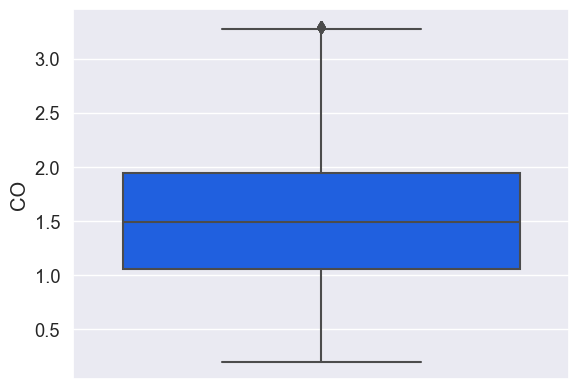

In [23]:
sns.boxplot(data=df1, y='CO')

In [24]:

df2= df1[df1['TAT']> 549.6]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18423 entries, 0 to 7345
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AFDP    18423 non-null  float64
 1   GTEP    18423 non-null  float64
 2   TIT     18423 non-null  float64
 3   TAT     18423 non-null  float64
 4   TEY     18423 non-null  float64
 5   CDP     18423 non-null  float64
 6   CO      18423 non-null  float64
 7   year    18423 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 1.3 MB


<AxesSubplot:ylabel='TAT'>

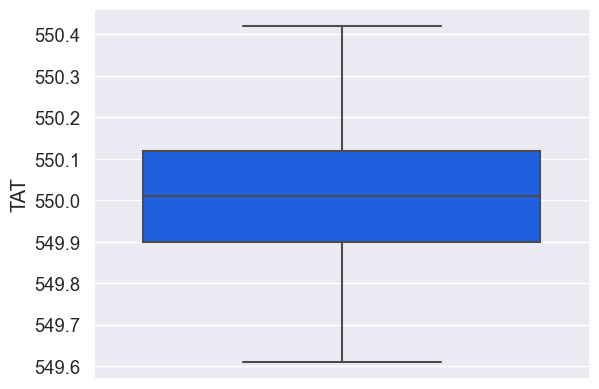

In [25]:
sns.boxplot(data=df2, y='TAT')

**3.2.2.RESULT: As we can see TAT and CO box plot,We eliminate all outlier 

#### 3.3. CHECKING NORMALITY

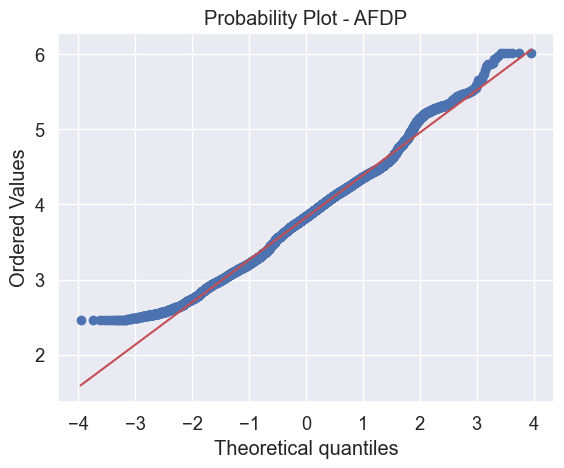

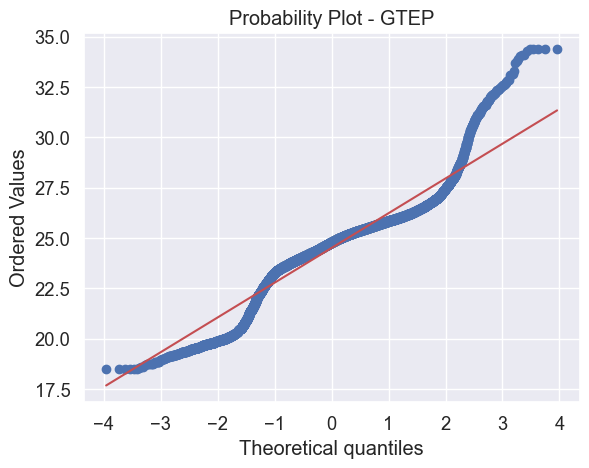

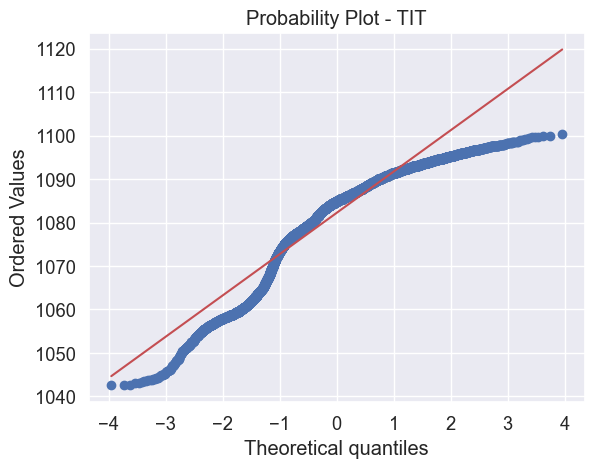

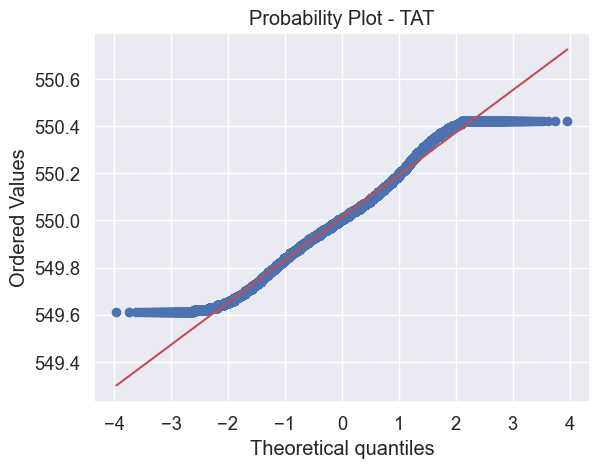

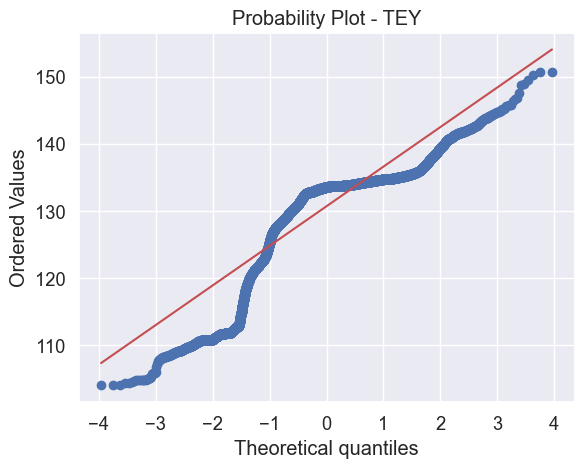

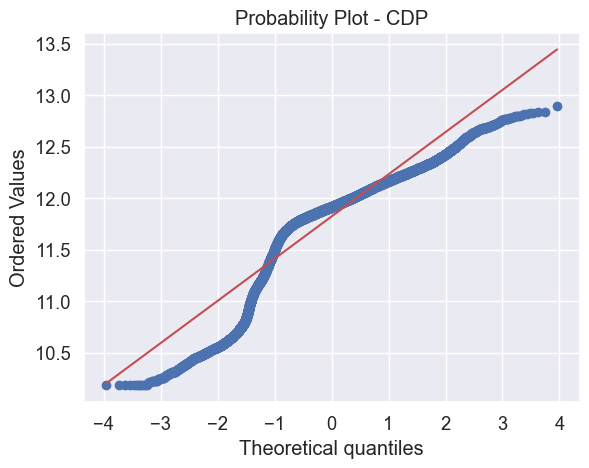

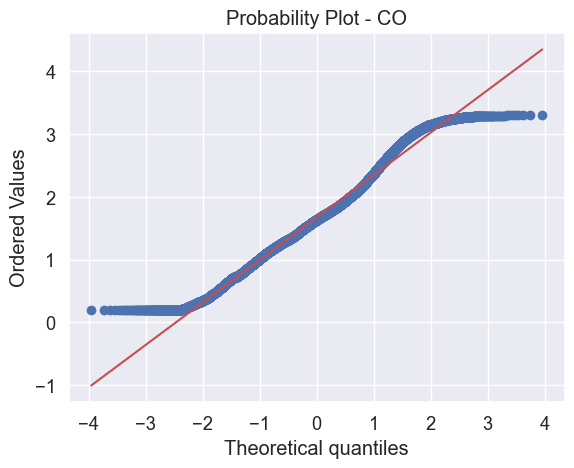

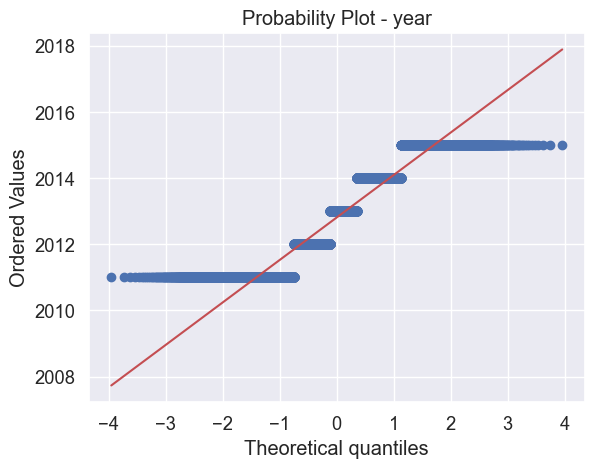

In [38]:
for label, content in df2.items():
    if pd.api.types.is_numeric_dtype(content):
        stats.probplot(content, dist="norm", plot=plt)
        plt.title("Probability Plot - " + label)
        plt.show()

#### SHAPIRO TEST FOR NORMALITY CHECK
Hypothesis:

  - H0: There is no statistically  evidence tthat data is normally distributed.
    
  -  H1: There is a statistically evidence tahat data is normally distributed.

In [39]:
from scipy.stats import shapiro
def check_normality(df):
    normal_list=[]
    abnormal_list=[]
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            test_stat_normality, p_value_normality=stats.shapiro(content)
            print('column name', label, "p value:%.4f" % p_value_normality)
            if p_value_normality <0.05:
                print("Reject null hypothesis >> The data is not normally distributed")
                abnormal_list.append(label)
            else:
                print("Fail to reject null hypothesis >> The data is normally distributed")
                normal_list.append(label)
    print('normal_list:' ,normal_list)
    print('abnormal_list',abnormal_list)

        
check_normality(df2)

column name AFDP p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name GTEP p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name TIT p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name TAT p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name TEY p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name CDP p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name CO p value:0.0000
Reject null hypothesis >> The data is not normally distributed
column name year p value:0.0000
Reject null hypothesis >> The data is not normally distributed
normal_list: []
abnormal_list ['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'year']


**RESULT= We can see All variables do not have normal distributions according to Shapiro Test.We can check normality with Chi Square and Anderson Darling Test also.**

#### CHI SQUARE TEST FOR  NORMALITY CHECK
Hypothesis:

    H0: There is no statistically  evidence tthat data is normally distributed.
    
    H1: There is a statistically evidence tahat data is normally distributed.

In [40]:
def check_normality(df):
    normal_list=[]
    abnormal_list=[]
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            test_stat_normality, p_value_normality=chisquare(content)
            print('column name', label, "p value:%.4f" % p_value_normality)
            if p_value_normality <0.05:
                print("Reject null hypothesis >> The data is not normally distributed")
                abnormal_list.append(label)
            else:
                print("Fail to reject null hypothesis >> The data is normally distributed")
                normal_list.append(label)
    print('normal_list:' ,normal_list)
    print('abnormal_list',abnormal_list)

        
check_normality(df2)

column name AFDP p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name GTEP p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name TIT p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name TAT p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name TEY p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name CDP p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name CO p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
column name year p value:1.0000
Fail to reject null hypothesis >> The data is normally distributed
normal_list: ['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'year']
abnormal_list []


**RESULT= As a result of chi square, all variables have normal distributions.**

### 4. EXPLONATORY DATA ANALYSIS<a class="anchor" id="explonatory-data-analysis"></a>

In [41]:
numeric_list = []
numerics=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Num= df2.select_dtypes(include=numerics)
for i in Num:
    numeric_list.append(i)
print(numeric_list)

['AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'year']


#### 4.1. UNVARIATE ANALYSIS OF NUMERIC VARIABLES

In [42]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True) 


    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))


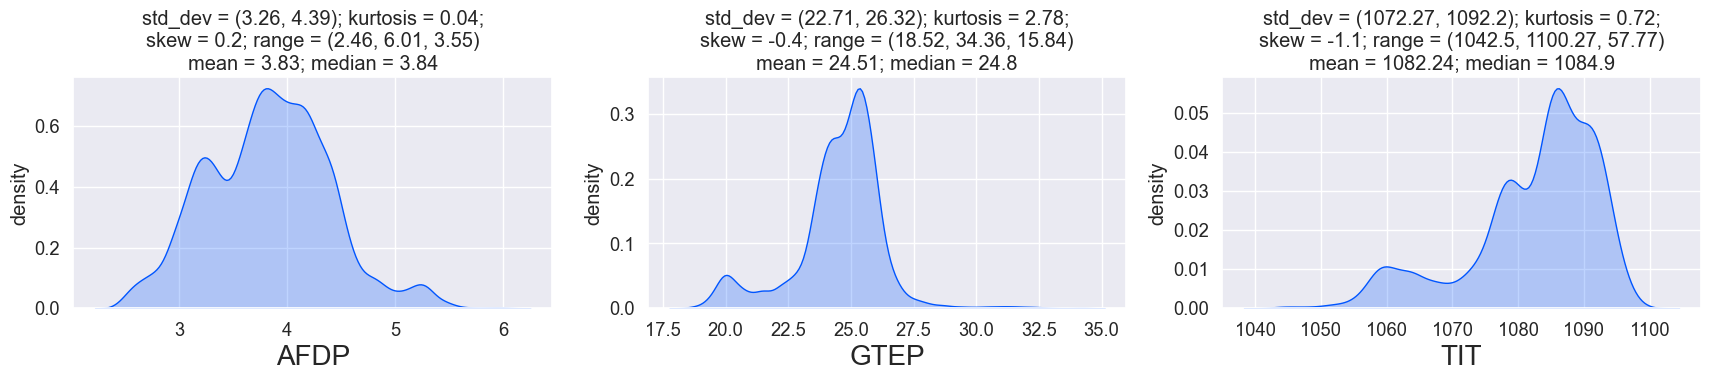

In [43]:
UVA_numeric(df2, numeric_list[0:3])

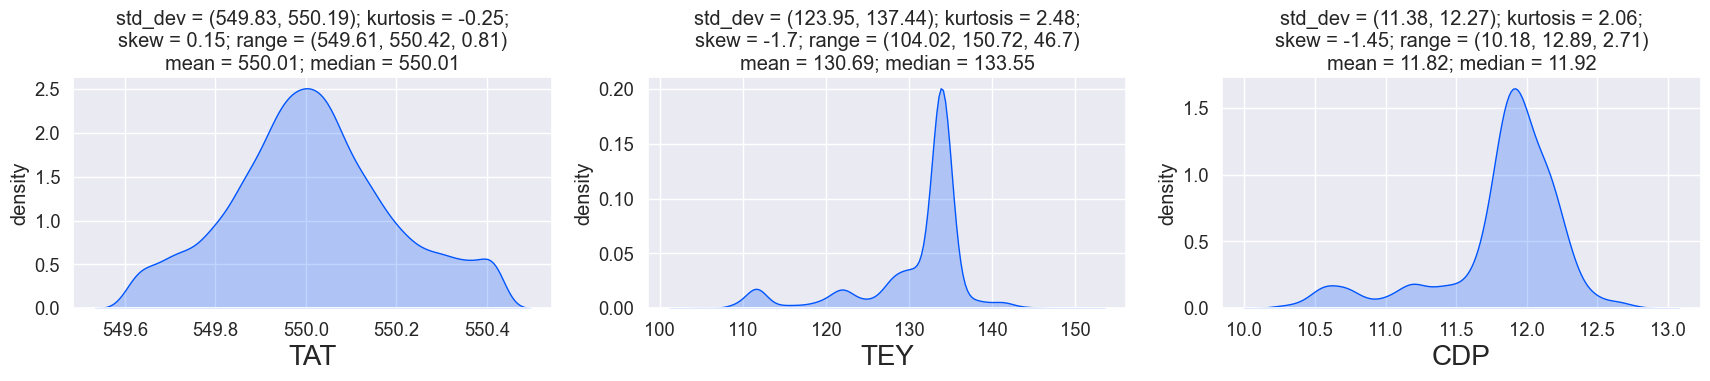

In [44]:
UVA_numeric(df2, numeric_list[3:6])

**RESULT= We can see all variables distribution shape and their skewness and kurtosis on the graph. As we konw if skewness coefficient between 0 and 1 it can be acceptable but if it is higher than 1, it is right skewed and if lower tahn 0 it is left skewed.Besides if kurtosis coefficient is 3 that means it has normal distributions but if it is higher than 3, it has sharp shape and if it is lower than 3, it has kurtosis.**

 - AFDP and TAT  do not have skewness or kurosis and its shape is close normal distributions.
 - GTEP has nearly left skewed distributions.
 - TIT ,TEY and CDP ARE left skewed and do not have kurtosis.

#### 4.2. BIVARIATE ANALYSIS OF DEPENDENT VARIABLES AND NUMERIC VARIABLES

Actually our indpendent variables are all numeric so we do not seek categorical analysis.

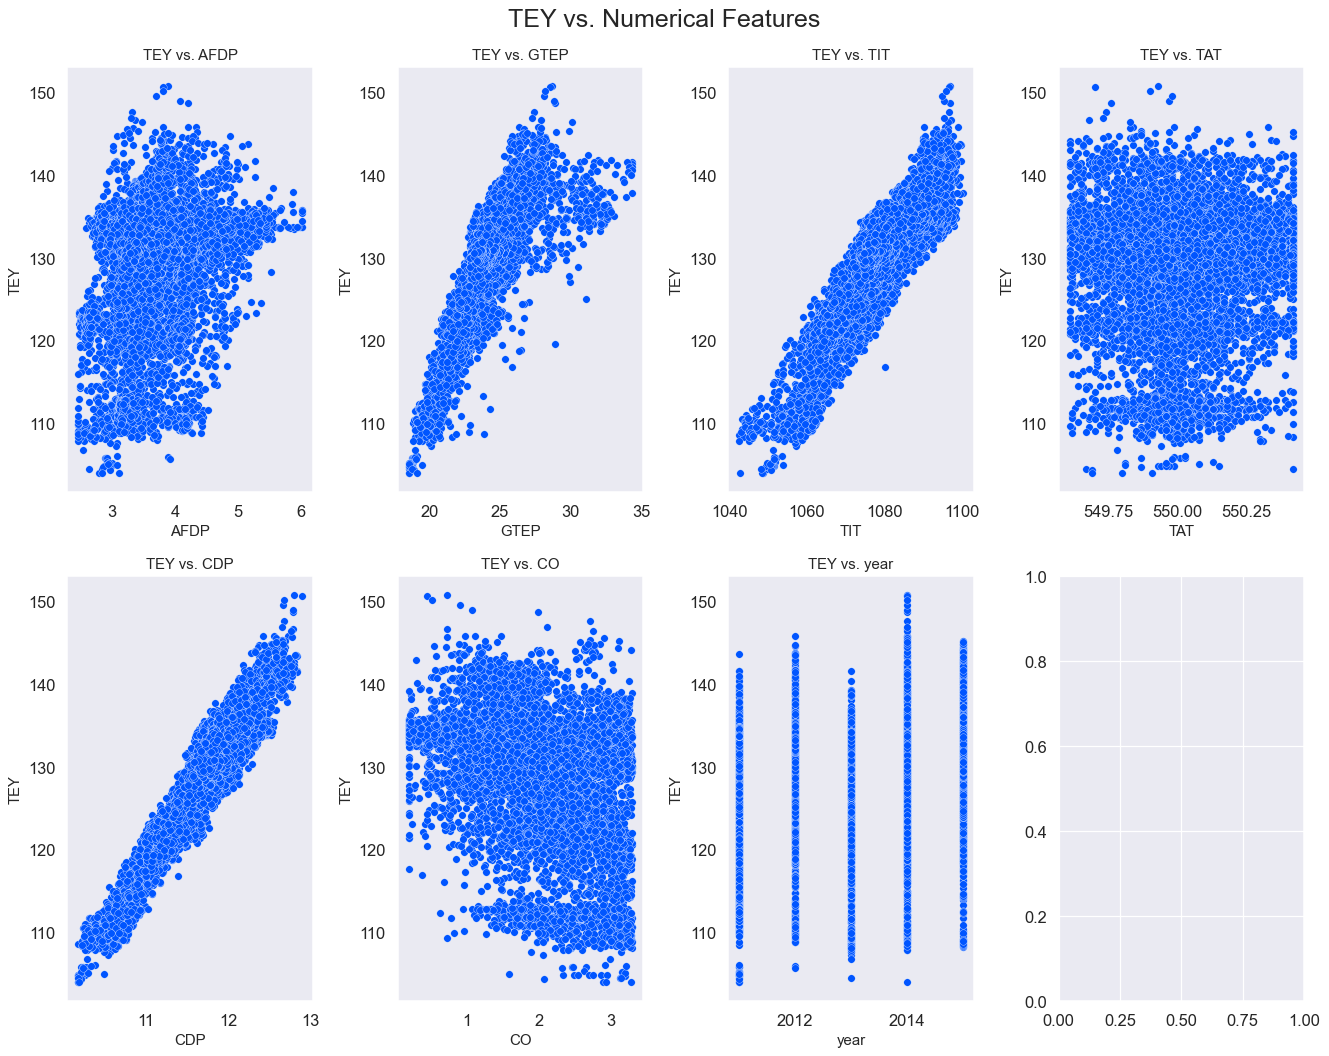

In [45]:
fig, ax = plt.subplots(nrows=2 ,ncols=4, figsize=(15,12), dpi=90)
num_features=['AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO','year']
target = 'TEY'
c = '#0055ff'

for i in range(len(num_features)):
    row = i//4
    col = i%4
    ax[row,col].scatter(df2[num_features[i]], df2[target], color=c, edgecolors='w', linewidths=0.25)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

plt.suptitle('TEY vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

**RESULT= As a result of the graph, we can sat GTEP,CDP and TIT can have linear relationship with imdependent variable (TEY).**

#### VISUALIZE DIFFERENT YEAR EFFECT 


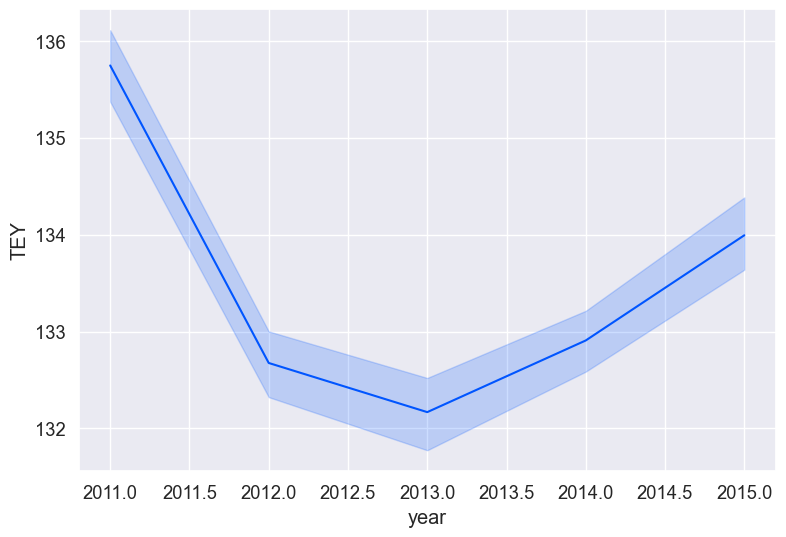

In [46]:
plt.figure(figsize=(9,6))
df_total1 = df_total.set_index("year")
sns.lineplot(x="year", y="TEY", data=df_total1, palette="Dark2")
plt.show()

**RESULT= As a result of time graph, we can see in 2011 the power plant produced the most turbine energy yield  and it illustrated decreasing until 2013 when it produced lowest energy yield and then it showed soaring until 2015.**

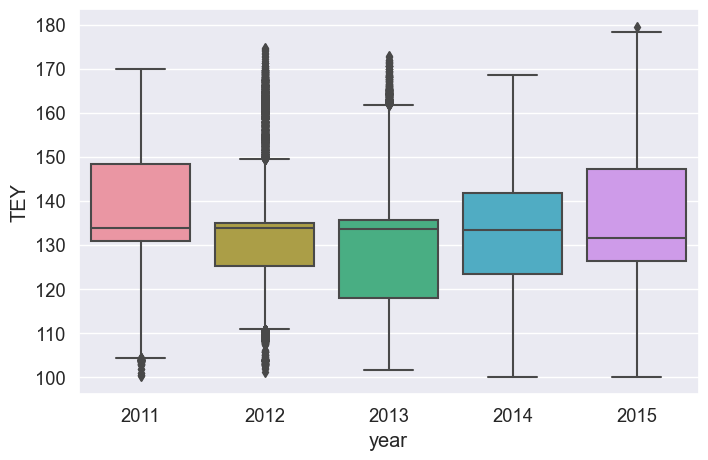

In [47]:
plt.figure(figsize=(8,5))
sns.boxplot(y='TEY', x='year', data=df_total)
plt.show()

**Production of TEY had outlier in year 2011,2012 and 2013.** 

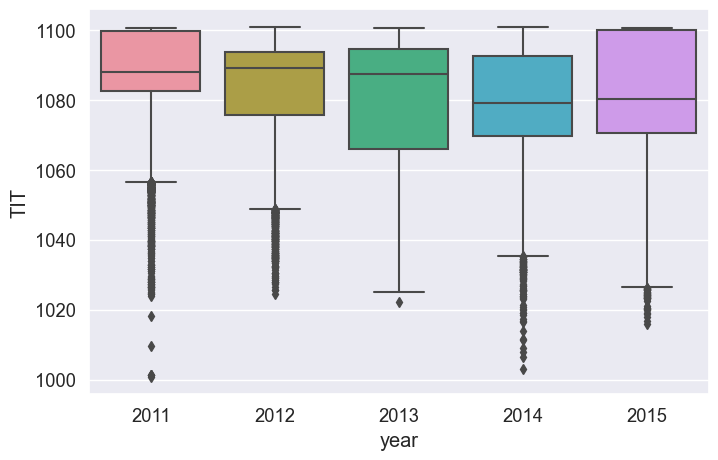

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(y='TIT', x='year', data=df_total)
plt.show()

**Production of TIT have outlier all year except of 2013. The most TIT was produced in 2015 and 2011 but its production were almost same in each year**

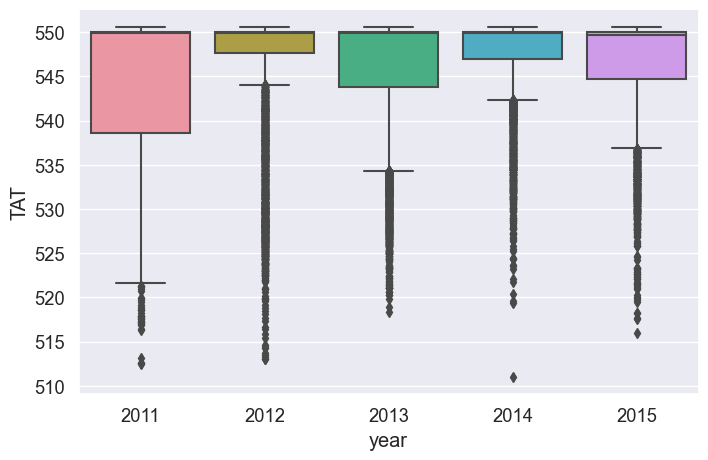

In [49]:
plt.figure(figsize=(8,5))
sns.boxplot(y='TAT', x='year', data=df_total)
plt.show()

**Production of TAT had lots of outliers in each year. Its production was higher in 2011 than the other years**

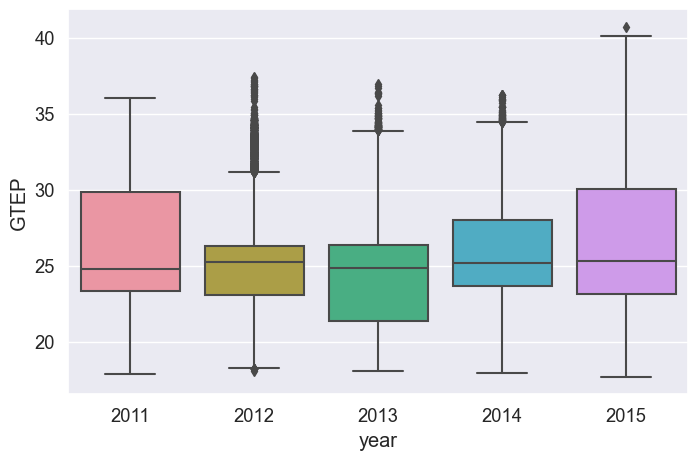

In [50]:
plt.figure(figsize=(8,5))
sns.boxplot(y='GTEP', x='year', data=df_total)
plt.show()

**GTEP had the most production in 2011 and 2015,It had outliers in 2012,2013 and 2014.**

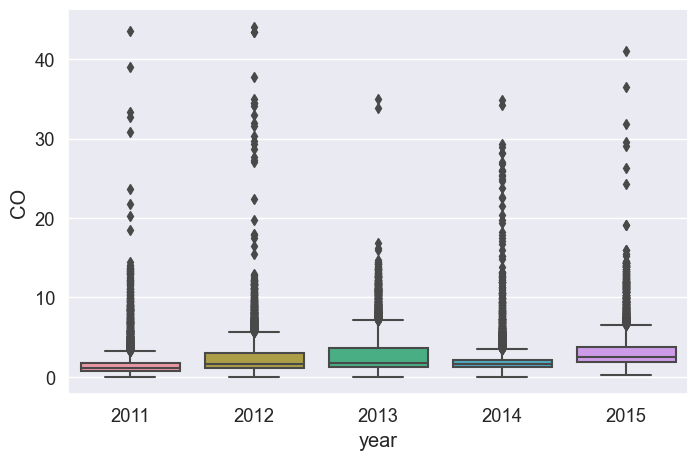

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(y='CO', x='year', data=df_total)
plt.show()

**CO had too much outliers in all years.We can see the small changes can affect its distribution.Its production were lower and almost same in 2014 and 2011; its production higher and nearly same in 2013 and 2015** 

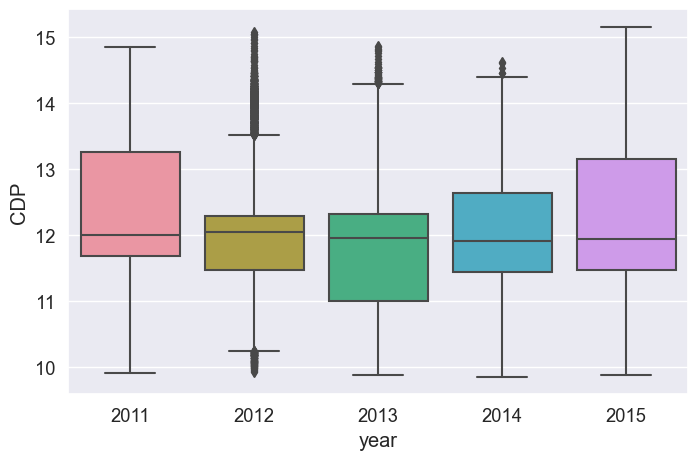

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(y='CDP', x='year', data=df_total)
plt.show()

**CDP had outliers in 2012,2013 and 2014. Its production is higher in 2011 and 2015 than the other years.**

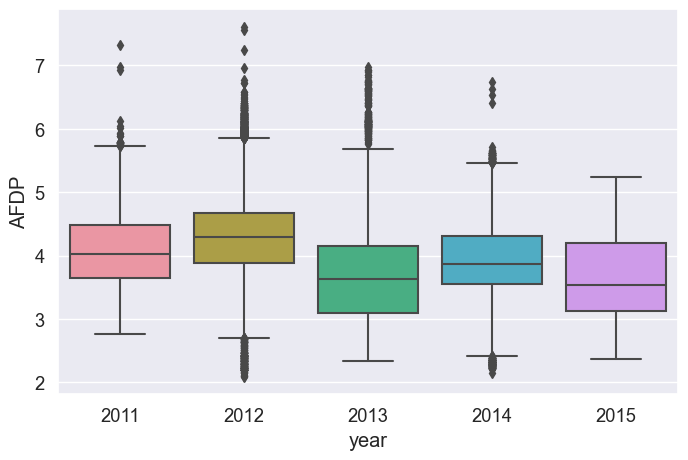

In [53]:
plt.figure(figsize=(8,5))
sns.boxplot(y='AFDP', x='year', data=df_total)
plt.show()

**AFDP had outlier in all years except of 2015. Its distribution was higher in 2013 and 2012 than the other years.**

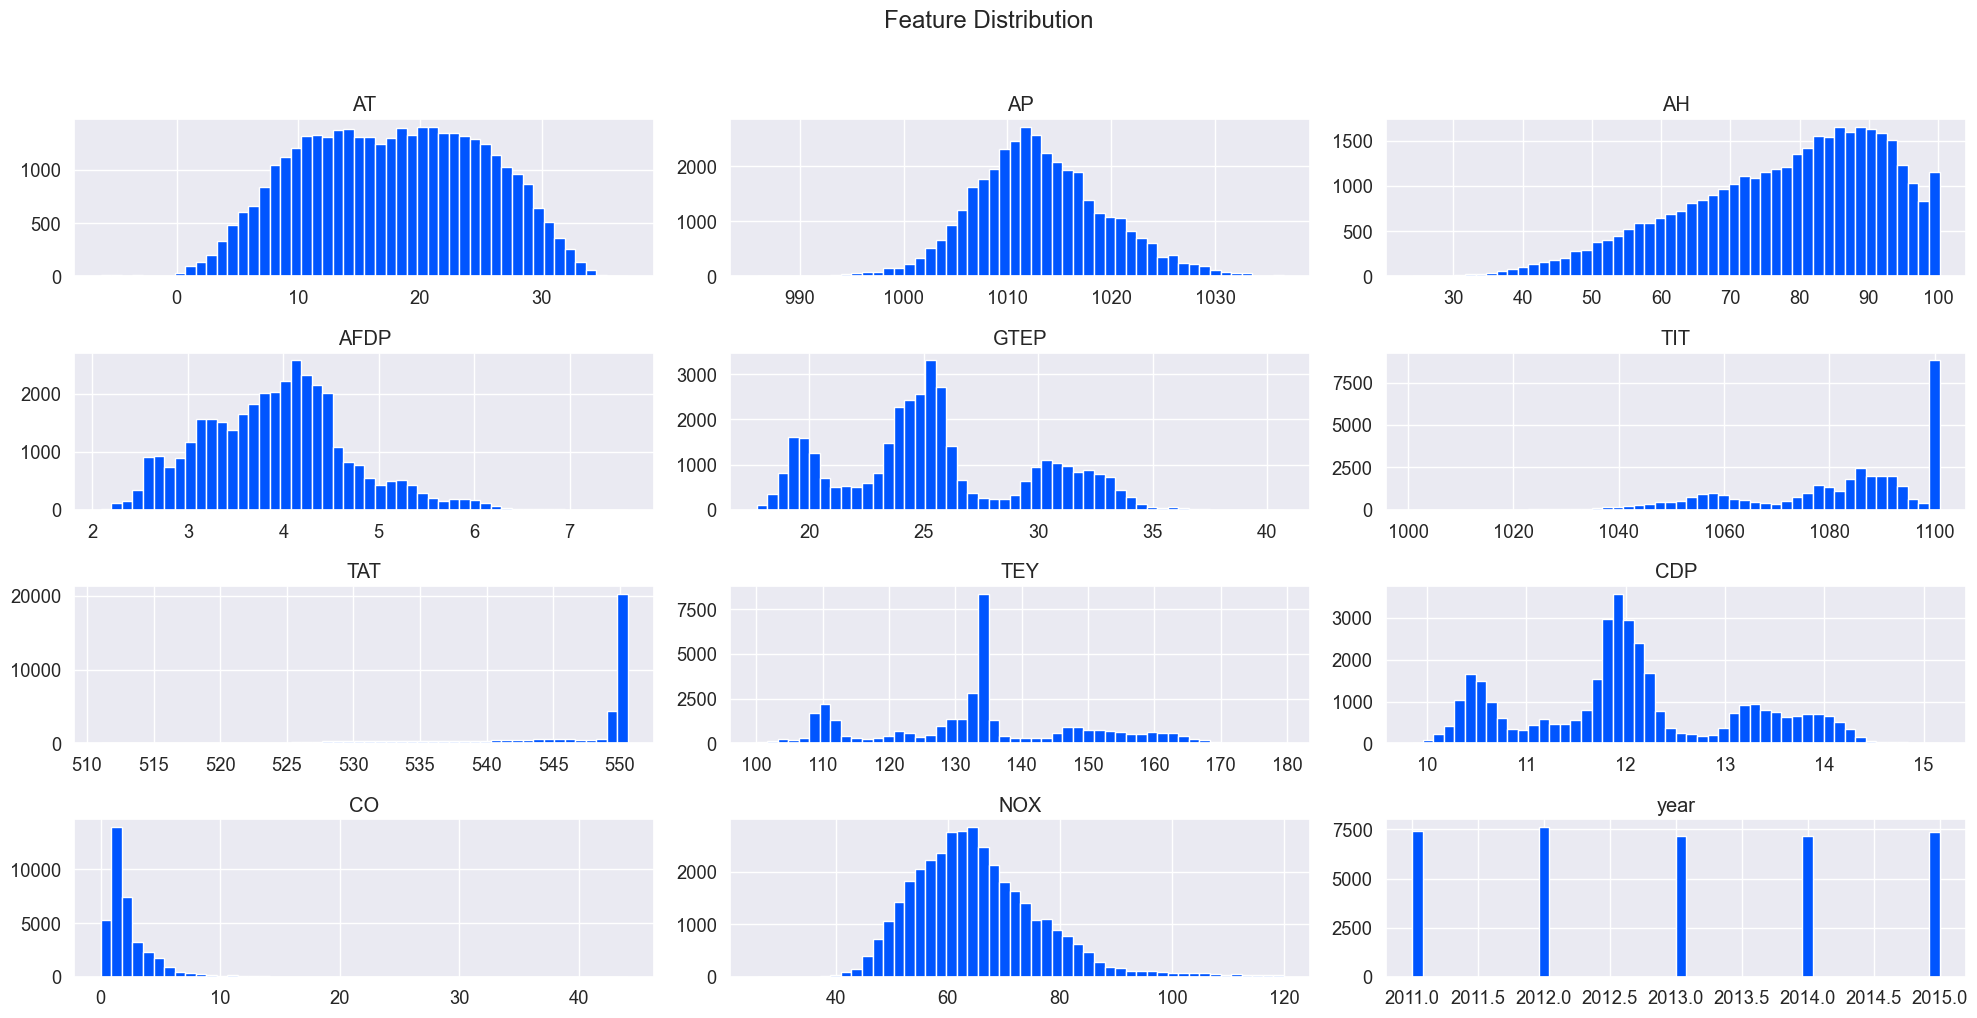

In [54]:
df_total.hist(bins=50, figsize=(20,10))
plt.suptitle('Feature Distribution', x=0.5, y=1.02, ha='center', fontsize='large')
plt.tight_layout()
plt.show()

<Figure size 3000x3000 with 0 Axes>

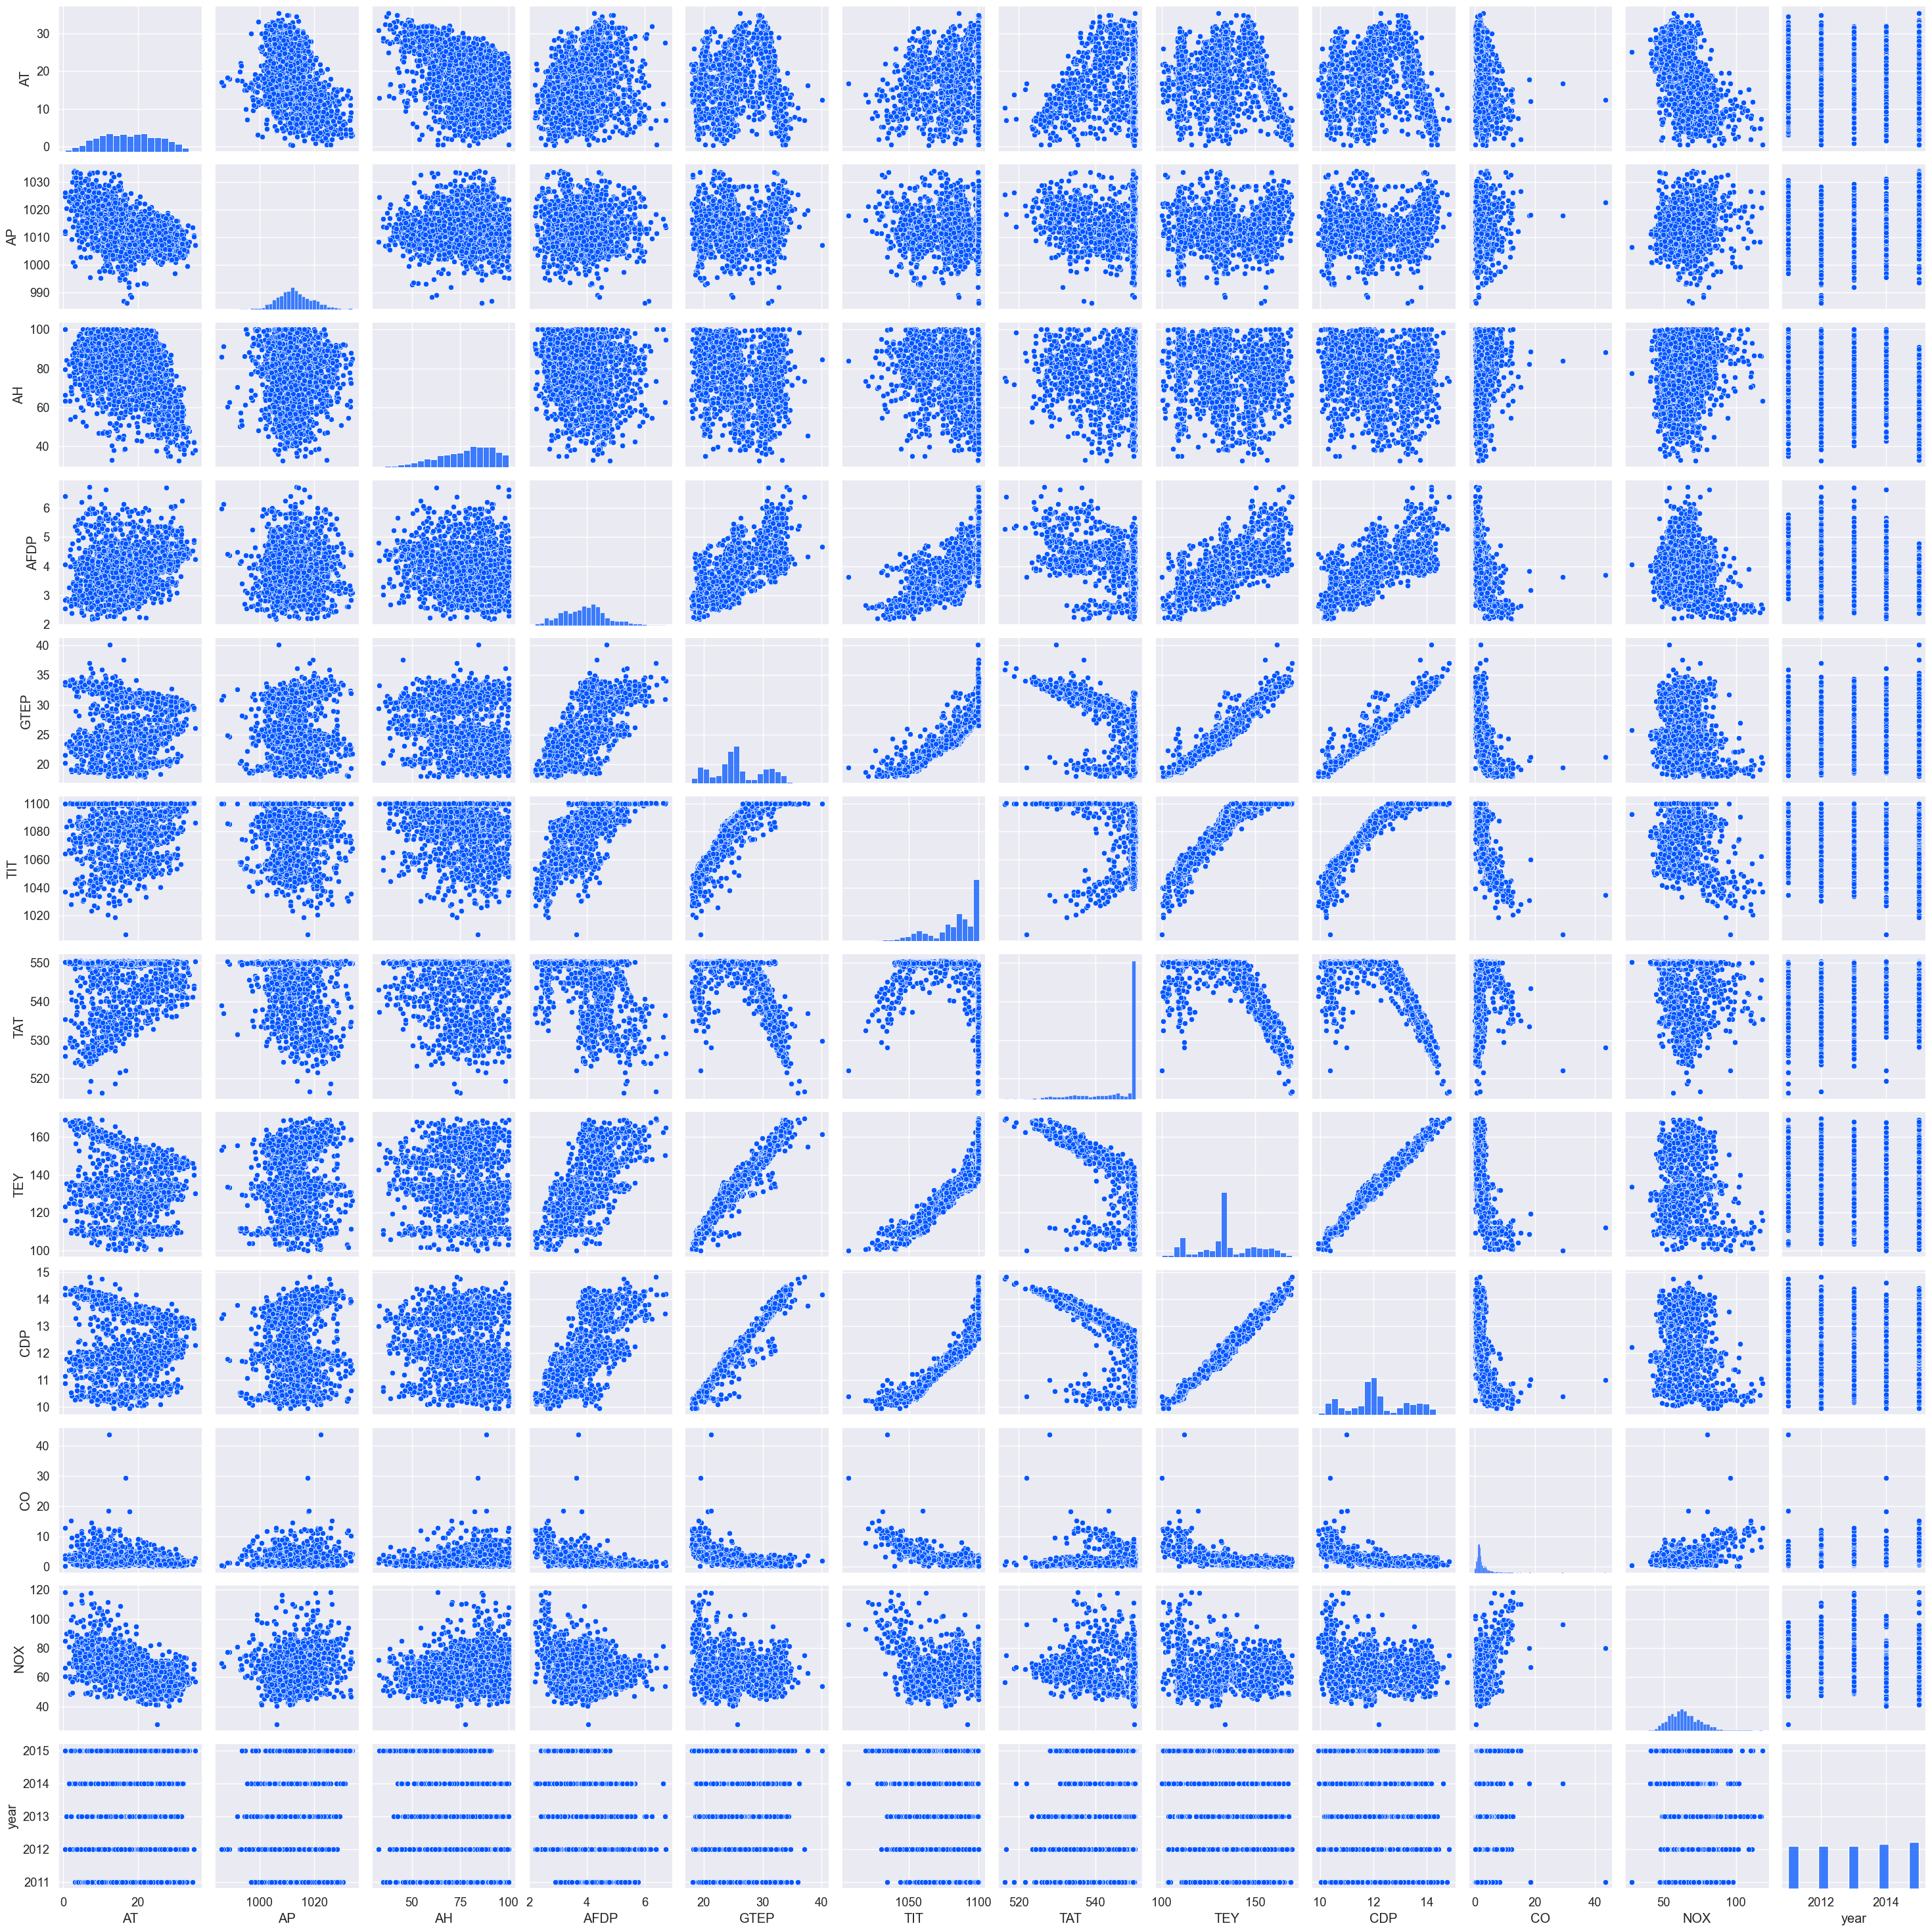

In [55]:
plt.figure(figsize=(30,30))
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize='large')
sns.pairplot(df_total.sample(2000))
plt.show()

### 5. HYPOTHESIS TESTING<a class="anchor" id="hypothesis-testing"></a>

Hypotheses are claims, and we can use statistics to prove or disprove them. At this point, hypothesis testing structures the problems so that we can use statistical evidence to test these claims. So we can check whether or not the claim is valid.

- 7.2.1. Defining Hypotheses
First of all, we should understand which scientific question we are looking for an answer to, and it should be formulated in the form of the Null Hypothesis (H₀) and the Alternative Hypothesis (H₁ or Hₐ). Please remember that H₀ and H₁ must be mutually exclusive, and H₁ shouldn’t contain equality:

-   $H_0: µ\_1 = µ\_2$ , $H_1: µ\_1 ≠ µ\_2$
-   $H_0: µ\_1 < µ\_2$, $H_1: µ\_1 > µ\_2$
-   $H_0: µ\_1 > µ\_2$, $H_1: µ\_1 < µ\_2$
  

- 7.2.2. Assumption Check
To decide whether to use the parametric or nonparametric version of the test, we should check the specific requirements listed below:
 Observations in each sample are independent and identically distributed (IID).
 Observations in each sample are normally distributed.
 Observations in each sample have the same variance.

#### 5.1. What is the probability of DEPENDENT VARİABLE Distributions LESS THAN its mean+ 2std

In [56]:
tey_mean = round(df2['TEY'].mean(), 3)
tey_std = round(df2['TEY'].std(), 3)
print(' Mean:',tey_mean,',' 'Std:',tey_std)

 Mean: 130.694 ,Std: 6.745


In [57]:
mean_2std= tey_mean - 2*(tey_std)
prob0 = scipy.stats.norm.cdf(( mean_2std- tey_mean)/tey_std )
print(1 - prob0)

0.9772498680518208


#### 5.1.1. what is the probability of Dependent variable Distributions LESS THAN its mean+ 3std

In [58]:
mean_3std= tey_mean - 3*(tey_std)
prob0 = scipy.stats.norm.cdf(( mean_3std- tey_mean)/tey_std )
print(1 - prob0)

0.9986501019683699


#### 5.1.2. what is the probability of Dpendent Variable Distributions GREATER THAN its mean+ 3std

In [59]:
mean_3std= tey_mean + 3*(tey_std)
prob0 = scipy.stats.norm.cdf(( mean_3std- tey_mean)/tey_std )
print(1-prob0)

0.0013498980316301035


#### DISTRIBUTION GRAPH OF NUMERIC VARİABLES 
To see clearly distributions of numeric variables and their mean, standart deviation,min max and median we will plot histogram graph.

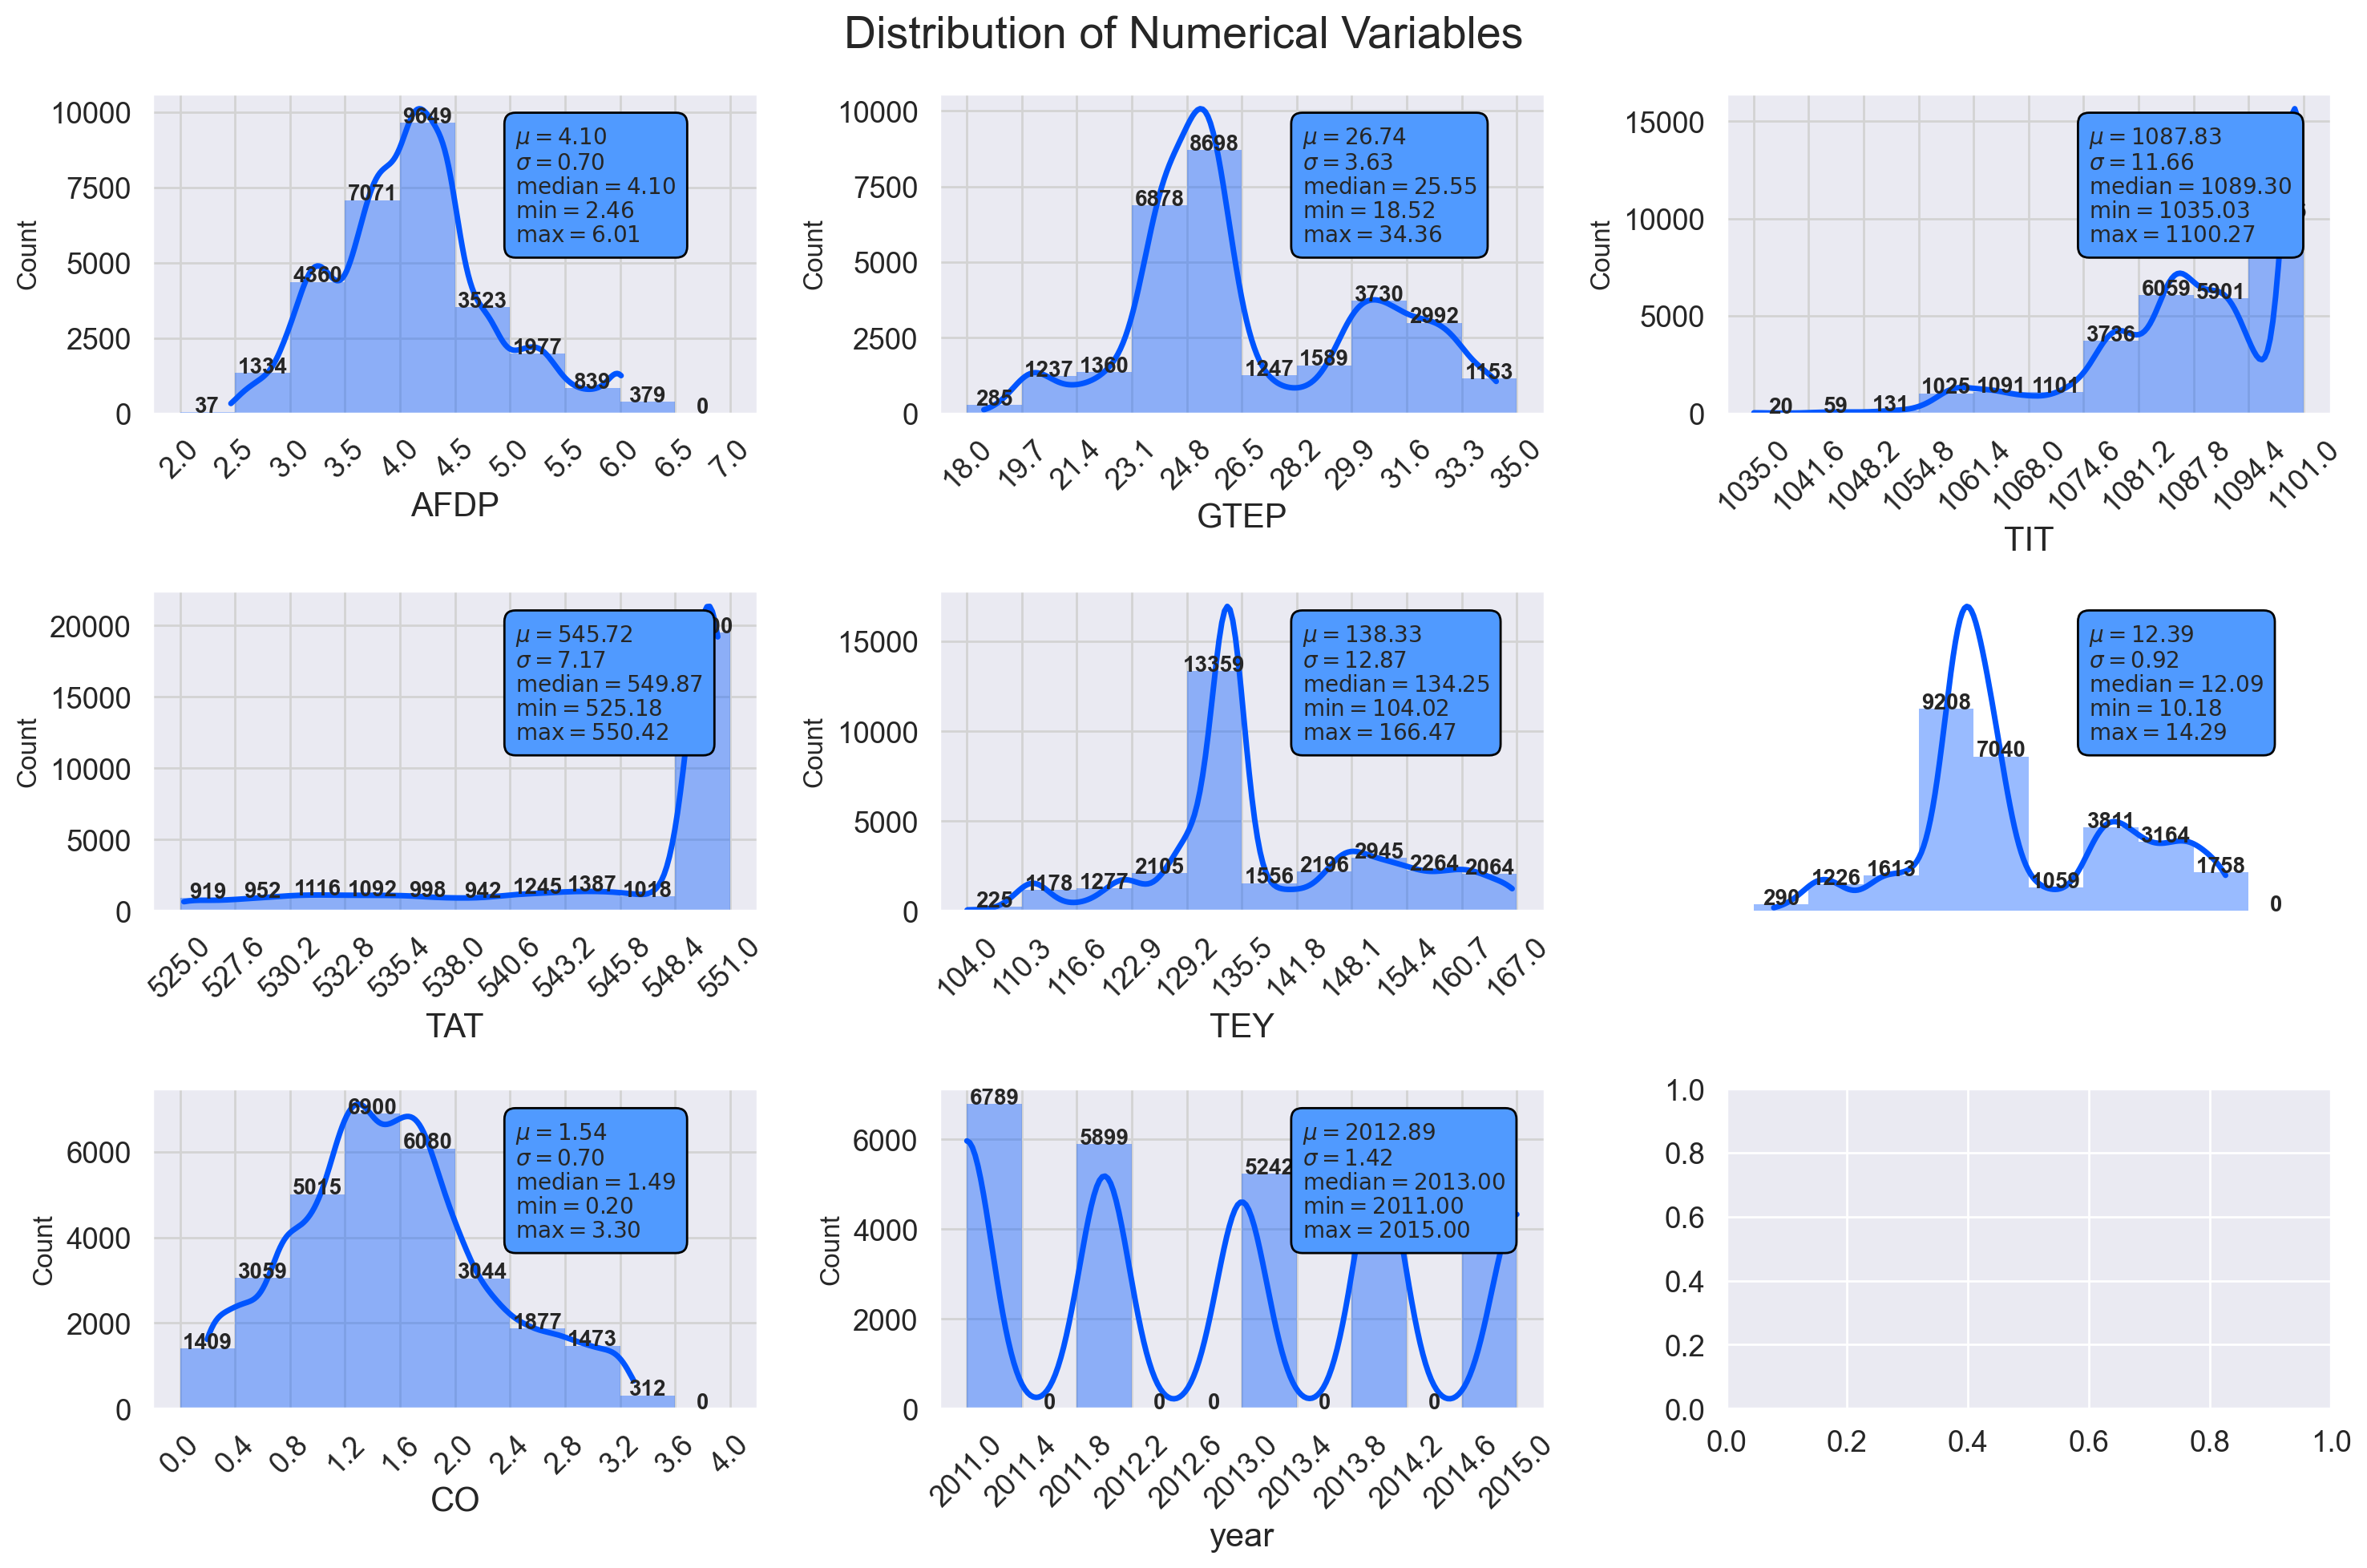

In [60]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10), dpi=200)
c = '#0055ff'

for i in range(len(numeric_list)):
    row = i//3
    col = i%3
    values, bin_edges = np.histogram(df1[numeric_list[i]], 
                                     range=(np.floor(df1[numeric_list[i]].min()), np.ceil(df1[numeric_list[i]].max())))                
    graph = sns.histplot(data=df1, x=numeric_list[i], bins=bin_edges, kde=True, ax=ax[row,col],
                         edgecolor='none', color=c, alpha=0.4, line_kws={'lw': 2.5})
    ax[row,col].set_xlabel(numeric_list[i], fontsize=15)
    ax[row,col].set_ylabel('Count', fontsize=12)
    ax[row,col].set_xticks(np.round(bin_edges,1))
    ax[row,col].set_xticklabels(ax[row,col].get_xticks(), rotation = 45)
    ax[row,col].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
        ax[row,col].annotate('{}'.format(p.get_height()), (p.get_x()+p.get_width()/2, p.get_height()+1),
                             ha='center', fontsize=10 ,fontweight="bold")
    
    textstr = '\n'.join((
    r'$\mu=%.2f$' %df1[numeric_list[i]].mean(),
    r'$\sigma=%.2f$' %df1[numeric_list[i]].std(),
    r'$\mathrm{median}=%.2f$' %np.median(df1[numeric_list[i]]),
    r'$\mathrm{min}=%.2f$' %df1[numeric_list[i]].min(),
    r'$\mathrm{max}=%.2f$' %df1[numeric_list[i]].max()
    ))
    ax[row,col].text(0.6, 0.9, textstr, transform=ax[row,col].transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Numerical Variables', fontsize=20) 
plt.tight_layout()   
plt.show()

#### 5.2. MAKING GROUP FOR HYPOTHESIS TESTS

**To understand diffrenece between variables distributions we follow two ways. One of them creating group for numerical variables because we have all numeric variables if we do not make group (categoric variables) we can not apply hypothesis tests except for Spearman or Pearson Corelation test, the other way is taking random sample and then apply hypothesis test on them.**
**Therefore we create group of all dependent variables and then seek for there is a significant evidence that they are different from each other**

#### The Quartile Group of CO 

In [61]:
df3=df2.copy()

In [62]:
df3.CO.quantile([0.25,0.5,0.75])

0.25    1.22610
0.50    1.63640
0.75    2.06635
Name: CO, dtype: float64

In [63]:
df3.loc[(df3['CO'] <= 1.22610), 'co_group'] = 'lower than 1.22610'
df3.loc[(df3['CO'] > 1.22610)&(df3['CO'] < 1.63640), 'co_group'] = 'between 1.22610 and 1.63640'
df3.loc[(df3['CO'] > 1.63640)&(df3['CO'] < 2.06635), 'co_group'] = 'between 1.63640 and 2.06635'
df3.loc[(df3['CO'] >= 2.06635), 'co_group'] = 'higher than 2.06635'

#### The Quartile Group of AFDP

In [64]:
df3.AFDP.quantile([0.25,0.5,0.75])

0.25    3.39905
0.50    3.83840
0.75    4.20035
Name: AFDP, dtype: float64

In [65]:
df3.loc[(df3['AFDP'] <= 3.39905), 'afdp_group'] = 'lower than 3.39905'
df3.loc[(df3['AFDP'] > 3.39905)&(df3['AFDP'] < 3.83840), 'afdp_group'] = 'between 3.39905 and 3.83840'
df3.loc[(df3['AFDP'] > 3.83840)&(df3['AFDP'] < 4.20035), 'afdp_group'] = 'between 3.83840and 4.20035'
df3.loc[(df3['AFDP'] >= 4.20035), 'afdp_group'] = 'higher than 4.20035'

#### The Quartile Group of GTEP

In [66]:
df3.GTEP.quantile([0.25,0.5,0.75])

0.25    23.831
0.50    24.795
0.75    25.541
Name: GTEP, dtype: float64

In [67]:
df3.loc[(df3['GTEP'] <= 23.831), 'gdep_group'] = 'lower than 23.831'
df3.loc[(df3['GTEP'] > 23.831) & (df3['GTEP'] < 24.795), 'gdep_group'] = 'between 23.831 and 24.795'
df3.loc[(df3['GTEP'] > 24.795)  & (df3['GTEP'] < 25.541), 'gdep_group'] = 'between 24.795 and 25.541'         
df3.loc[(df3['GTEP'] >= 25.541), 'gdep_group'] = 'higher than 25.541'

#### The Quartile Group of TIT

In [68]:
df3.TIT.quantile([0.25,0.5,0.75])

0.25    1077.8
0.50    1084.9
0.75    1089.5
Name: TIT, dtype: float64

In [69]:
df3.loc[(df3['TIT'] <= 1077.8), 'tit_group'] = 'lower than 1077.8'
df3.loc[(df3['TIT'] > 1077.8) & (df3['TIT'] < 1084.9), 'tit_group'] = 'between 1077.8 and 1084.9'
df3.loc[(df3['TIT'] > 1084.9)  & (df3['TIT'] < 1089.5), 'tit_group'] = 'between 1084.9 and 1089.5'         
df3.loc[(df3['TIT'] >= 1089.5), 'tit_group'] = 'higher than 1089.5'

#### The Quartile Group of TAT

In [70]:
df3.TAT.quantile([0.25,0.5,0.75])

0.25    549.90
0.50    550.01
0.75    550.12
Name: TAT, dtype: float64

In [71]:
df3.loc[(df3['TAT'] <= 549.90), 'tat_group'] = 'lower than 549.90'
df3.loc[(df3['TAT'] > 549.90) & (df3['TAT'] < 550.01), 'tat_group'] = 'between 549.90 and 550.01'
df3.loc[(df3['TAT'] > 550.01)  & (df3['TAT'] < 550.12), 'tat_group'] = 'between 550.01 and 550.12'         
df3.loc[(df3['TAT'] >= 550.12), 'tat_group'] = 'higher than 550.12'

#### The Quartile Group of CDP

In [72]:
df3.CDP.quantile([0.25,0.5,0.75])

0.25    11.748
0.50    11.916
0.75    12.087
Name: CDP, dtype: float64

In [73]:
df3.loc[(df3['CDP'] <= 11.748), 'cdp_group'] = 'lower than 11.748'
df3.loc[(df3['CDP'] >11.748) & (df3['CDP'] <11.916), 'cdp_group'] = 'between 11.748 and 11.916'
df3.loc[(df3['CDP'] > 11.916)  & (df3['CDP'] < 12.087), 'cdp_group'] = 'between 11.916 and12.087'         
df3.loc[(df3['CDP'] >= 12.087), 'cdp_group'] = 'higher than 12.087'

In [74]:
df3.head()

AFDP    GTEP     TIT     TAT     TEY     CDP       CO  year            co_group                   afdp_group                 gdep_group                  tit_group                  tat_group                  cdp_group
0  3.5758  23.979  1086.2  549.83  134.67  11.898  0.32663  2011  lower than 1.22610  between 3.39905 and 3.83840  between 23.831 and 24.795  between 1084.9 and 1089.5          lower than 549.90  between 11.748 and 11.916
1  3.5709  23.951  1086.1  550.05  134.67  11.892  0.44784  2011  lower than 1.22610  between 3.39905 and 3.83840  between 23.831 and 24.795  between 1084.9 and 1089.5  between 550.01 and 550.12  between 11.748 and 11.916
2  3.5828  23.990  1086.5  550.19  135.10  12.042  0.45144  2011  lower than 1.22610  between 3.39905 and 3.83840  between 23.831 and 24.795  between 1084.9 and 1089.5         higher than 550.12   between 11.916 and12.087
3  3.5808  23.911  1086.5  550.17  135.03  11.990  0.23107  2011  lower than 1.22610  between 3.39905 and 3.83840  between 23.831 and 24.795  between 1084.9 and 1089.5         higher than 550.12   between 11.916 and12.087
4  3.5781  23.917  1085.9  550.00  134.67  11.910  0.26747  2011  lower than 1.22610  between 3.39905 and 3.83840  between 23.831 and 24.795  between 1084.9 and 1089.5  between 549.90 and 550.01  between 11.748 and 11.916

### 5.3. HYPOTHESIS TEST FOR EACH INDEPENDENT VARIABLES GROUPS DEPEND ON INDEPENDENT VARIABLE (TEY)

### 5.3.1. Is there a significant difference between CO groups depend on TEY

-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between CO groups depend on TEY")

-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between CO groups depend on TEY")

##### CHECK NORMALITY

Shapiro Test Hypothesis:
-   $H_0: µ\_1 = µ\_2$  ("The data is not normally distributed")
-   $H_1: µ\_1 ≠ µ\_2$  ("The data is normally distributed")


In [75]:
group1=df3[df3['co_group']=='lower than 1.22610']
group2=df3[df3['co_group']=='between 1.22610 and 1.63640']
group3=df3[df3['co_group']=='between 1.63640 and 2.06635']
group4=df3[df3['co_group']=='higher than 2.06635']

In [76]:
#normality check with shapiro test:
shapiro_result = (df3.groupby('co_group')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

co_group                            
between 1.22610 and 1.63640  W          6.356395e-01
                             p_value    0.000000e+00
between 1.63640 and 2.06635  W          8.019946e-01
                             p_value    0.000000e+00
higher than 2.06635          W          9.315139e-01
                             p_value    1.042846e-41
lower than 1.22610           W          6.555560e-01
                             p_value    0.000000e+00
Name: TEY, dtype: float64

**RESULT= H0 rejected. p_value<0.05 for all co_groups so we can say they do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY
Barlett  Test Hypothesis:
-   $H_0: µ\_1 = µ\_2$  ("Tthere is NO enough evidence about their variance are homogeneous")
-   $H_1: µ\_1 ≠ µ\_2$  ("Tthere is enough evidence about their variance are homogeneous")

In [77]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 5756.8872 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


**RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [78]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value)             


t_statistic_value: 3723.8341325891784 p_value: 0.0


**RESULT= H0 rejected. There is statistically evidence that there are significant difference between CO group depend on TEY**

#### POSTHOC TEST

In [79]:
import scikit_posthocs as sp
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

**RESULT= As a result of Kruskal Test we find there statistically significant difference betweeen groups. But With the help of Post Hoc test We can see each groups differences. If the value 1 that means groups are exactLy same if value 0 that means groups are tottaly different. As we see the post hoc result above, all groups are different each other but Kruskal result tells as opposite. Therefore we can check each group whether or not there is a significnatly different from each other**

### 5.3.2. Is there a significant difference between AFDP groups depend on TEY

- $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between AFDP groups depend on TEY")

- $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between AFDP groups depend on TEY")

In [80]:
group1=df3[df3['afdp_group']=='lower than 3.39905']
group2=df3[df3['afdp_group']=='between 3.39905 and 3.83840']
group3=df3[df3['afdp_group']=='between 3.83840and 4.20035']
group4=df3[df3['afdp_group']=='higher than 4.20035']

#### CHECK NORMALITY
Shapiro Test Hypothesis:
-   $H_0: µ\_1 = µ\_2$  ("The data is not normally distributed")
-   $H_1: µ\_1 ≠ µ\_2$  ("The data is normally distributed")

In [81]:
#normality check with shapiro test:
shapiro_result = (df3.groupby('afdp_group')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

afdp_group                          
between 3.39905 and 3.83840  W          0.789296
                             p_value    0.000000
between 3.83840and 4.20035   W          0.824788
                             p_value    0.000000
higher than 4.20035          W          0.649500
                             p_value    0.000000
lower than 3.39905           W          0.842018
                             p_value    0.000000
Name: TEY, dtype: float64

**RESULT= All co_groups do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY

Barlett  Test Hypothesis:

-   $H_0: µ\_1 = µ\_2$  ("Tthere is NO enough evidence about their variance are homogeneous")

-   $H_1: µ\_1 ≠ µ\_2$  ("Tthere is enough evidence about their variance are homogeneous")

In [82]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 3861.7405 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


**RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [83]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value)      

t_statistic_value: 1642.958715721997 p_value: 0.0


**RESULT= H0 rejected.There is statistically evidence that there are significant difference between AFDP groups depend on TEY**

#### POSTHOC TEST

In [84]:
import scikit_posthocs as sp
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

**RESULT= As a result of Kruskal Test we find there statistically significant difference betweeen groups. But With the help of Post Hoc test We can see each groups differences. If the value 1 that means groups are exactLy same if value 0 that means groups are tottaly different.**

### 5.3.3. Is there a significant difference between GDEP groups depend on TEY

-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between GDEP groups depend on TEY")

-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between GDEP groups depend on TEY")

In [85]:
df3.gdep_group.unique()

array(['between 23.831 and 24.795', 'lower than 23.831',
       'between 24.795 and 25.541', 'higher than 25.541', nan],
      dtype=object)

In [86]:
group1=df3[df3['gdep_group']=='lower than 23.831']
group2=df3[df3['gdep_group']=='between 23.831 and 24.795']
group3=df3[df3['gdep_group']=='between 24.795 and 25.541']
group4=df3[df3['gdep_group']=='higher than 25.541']

#### CHECK NORMALITY

In [87]:
#normality check with shapiro test:
shapiro_result = (df3.groupby('gdep_group')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

gdep_group                        
between 23.831 and 24.795  W          8.300461e-01
                           p_value    0.000000e+00
between 24.795 and 25.541  W          8.591246e-01
                           p_value    0.000000e+00
higher than 25.541         W          8.452910e-01
                           p_value    0.000000e+00
lower than 23.831          W          9.179453e-01
                           p_value    1.401298e-44
Name: TEY, dtype: float64

**RESULT= All co_groups do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY

In [88]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 11402.4817 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


**RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [89]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value)             


t_statistic_value: 6583.65015309803 p_value: 0.0


**RESULT= H0 rejected.There is statistically evidence that there are significant difference between GDEP groups depend on TEY**

#### POSTHOCT EST

In [90]:
import scikit_posthocs as sp
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

**RESULT= As a result of Kruskal Test we find there statistically significant difference betweeen groups. But With the help of Post Hoc test We can see each groups differences. If the value 1 that means groups are exactLy same if value 0 that means groups are tottaly different.**

### 5.3.4. Is there a significant difference between TIT groups depend on TEY

-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between TIT groups depend on TEY")

-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between TIT groups depend on TEY")

In [91]:
group1=df3[df3['tit_group']=='lower than 1077.8']
group2=df3[df3['tit_group']=='between 1077.8 and 1084.9']
group3=df3[df3['tit_group']=='between 1084.9 and 1089.5']
group4=df3[df3['tit_group']=='higher than 1089.5']

#### CHECK NORMALITY

In [92]:
#normality check with shapiro test:
shapiro_result = (df3.groupby('tit_group')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

tit_group                         
between 1077.8 and 1084.9  W          9.404485e-01
                           p_value    3.098021e-39
between 1084.9 and 1089.5  W          8.916179e-01
                           p_value    0.000000e+00
higher than 1089.5         W          6.658064e-01
                           p_value    0.000000e+00
lower than 1077.8          W          9.438837e-01
                           p_value    6.809862e-39
Name: TEY, dtype: float64

**RESULT= All co_groups do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY

In [93]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 14940.0056 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


**RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [94]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value) 

t_statistic_value: 9049.385833341967 p_value: 0.0


**RESULT= H0 rejected.There is statistically evidence that there are significant difference between TIT groups depend on TEY**

#### POSTHOC TEST

In [95]:
import scikit_posthocs as sp
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

### 5.3.5. Is there a significant difference between TAT groups depend on TEY

-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between TAT groups depend on TEY")

-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between TAT groups depend on TEY")

In [96]:
group1=df3[df3['tat_group']=='lower than 549.90']
group2=df3[df3['tat_group']=='between 549.90 and 550.01']
group3=df3[df3['tat_group']=='between 550.01 and 550.12']
group4=df3[df3['tat_group']=='higher than 550.12']

#### CHECK NORMALITY
Shapiro Test Hypothesis:
-   $H_0: µ\_1 = µ\_2$  ("The data is not normally distributed")
-   $H_1: µ\_1 ≠ µ\_2$  ("The data is normally distributed")

In [97]:
#normality check with shapiro test:
shapiro_result = (df3.groupby('tit_group')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

tit_group                         
between 1077.8 and 1084.9  W          9.404485e-01
                           p_value    3.098021e-39
between 1084.9 and 1089.5  W          8.916179e-01
                           p_value    0.000000e+00
higher than 1089.5         W          6.658064e-01
                           p_value    0.000000e+00
lower than 1077.8          W          9.438837e-01
                           p_value    6.809862e-39
Name: TEY, dtype: float64

**RESULT= All co_groups do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY

In [98]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 323.3791 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


***RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [99]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value) 

t_statistic_value: 10.872608704062962 p_value: 0.012435055079203602


**RESULT= H0 rejected.There is statistically evidence that there are significant difference between TAT groups depend on TEY**

#### POSTHOC TEST

In [100]:
import scikit_posthocs as sp
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

**RESULT=we find there statistically significant difference betweeen all groups except for group2 and group 3, group1 and group 4 groups, group2 and group3 because they are same according to PostHoc test.** 

### 5.3.6. Is there a significant difference between CDP groups depend on TEY

-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between CDP groups depend on TEY")

-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between CDP groups depend on TEY")

In [101]:
group1=df3[df3['cdp_group']=='lower than 11.748']
group2=df3[df3['cdp_group']=='between 11.748 and 11.916']
group3=df3[df3['cdp_group']=='between 11.916 and12.087']
group4=df3[df3['cdp_group']=='higher than 12.087']

#### CHECK NORMALITY

In [102]:
#normality check with shapiro test:
shapiro_result = (df3.groupby('cdp_group')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

cdp_group                         
between 11.748 and 11.916  W          8.714876e-01
                           p_value    0.000000e+00
between 11.916 and12.087   W          8.870688e-01
                           p_value    0.000000e+00
higher than 12.087         W          7.619908e-01
                           p_value    0.000000e+00
lower than 11.748          W          9.449745e-01
                           p_value    2.017088e-38
Name: TEY, dtype: float64

**RESULT= All co_groups do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY

In [103]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 13630.0066 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


***RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [104]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value) 

t_statistic_value: 9521.13816526326 p_value: 0.0


**RESULT= H0 rejected.There is statistically evidence that there are significant difference between CDP groups depend on TEY**

#### POSTHOC TEST

In [105]:
import scikit_posthocs as sp
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

In [106]:
df3.shape

(18423, 14)

**5.3.RESULT= After makinh Kruskal test for 'co_group', 'afdp_group', 'gdep_group', 'tit_group', 'tat_group', 'cdp_group', We found  there are statistically evidence that each groups of variables significantly diffrent from each other and It also shows us our variables do not normally distributed and they do not give realiable result when we conduct Linear Regression so we must scale them**

### 5.4  HYPOTHESIS TEST FOR INDPENDENT VARIABLES 

**To find if there is any distribution differences in the dependent variable (TEY) we take some random samples and observe whether or not there is a diffrence according to population of dependent variable**

**Hypothesis :**

 **-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference between TEY sample and population mean")**
 
 **-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference between TEY sample and population mean")**


**We have 18423 rows in our dataset. We should take an sample from the population.
There are methods to understand the enough sample size. One of the method is below:
Yamane’s formula:
Yamane sample calculation is a way to determine the sample size for a study. It is the most ideal method to use when the only thing you know about the underlying population you are sampling from is its size.**

 $ sample = population / (1 + population*error^2) $
 
**As you can see, the formula depends on an “error” or “confidence level”. If you only research part of the population instead of the whole population, there is a certain risk that you don’t detect the thing you want to research in your sample group. Typically, we accept an error of 5% or in other words have a confidence level of 95% that our research is valid**

**We see that below formula 391 rows are enough according to the Yamane.  We can choose the bigger sample size also.
For sampling, we decided to choosetaking  400 rows**

In [107]:
sample_size = 18423/(1 + 18423*0.05*0.05)
sample_size

391.4997609307761

In [108]:
sample_size=400
df3_samples= np.random.choice(df3['TEY'], sample_size)

In [109]:
df3_samples=pd.Series(df3_samples)

In [110]:
#Before tets we must observe diffrence between real data and sample.
(df3['TEY'].mean()- df3_samples.mean()) /df3['TEY'].mean()

0.0002682830963052915

In [111]:
(df3['TEY'].median()- df3_samples.median()) / df3['TEY'].median()

0.0005990265818046612

#### Plotting sample and Population Dsitributions

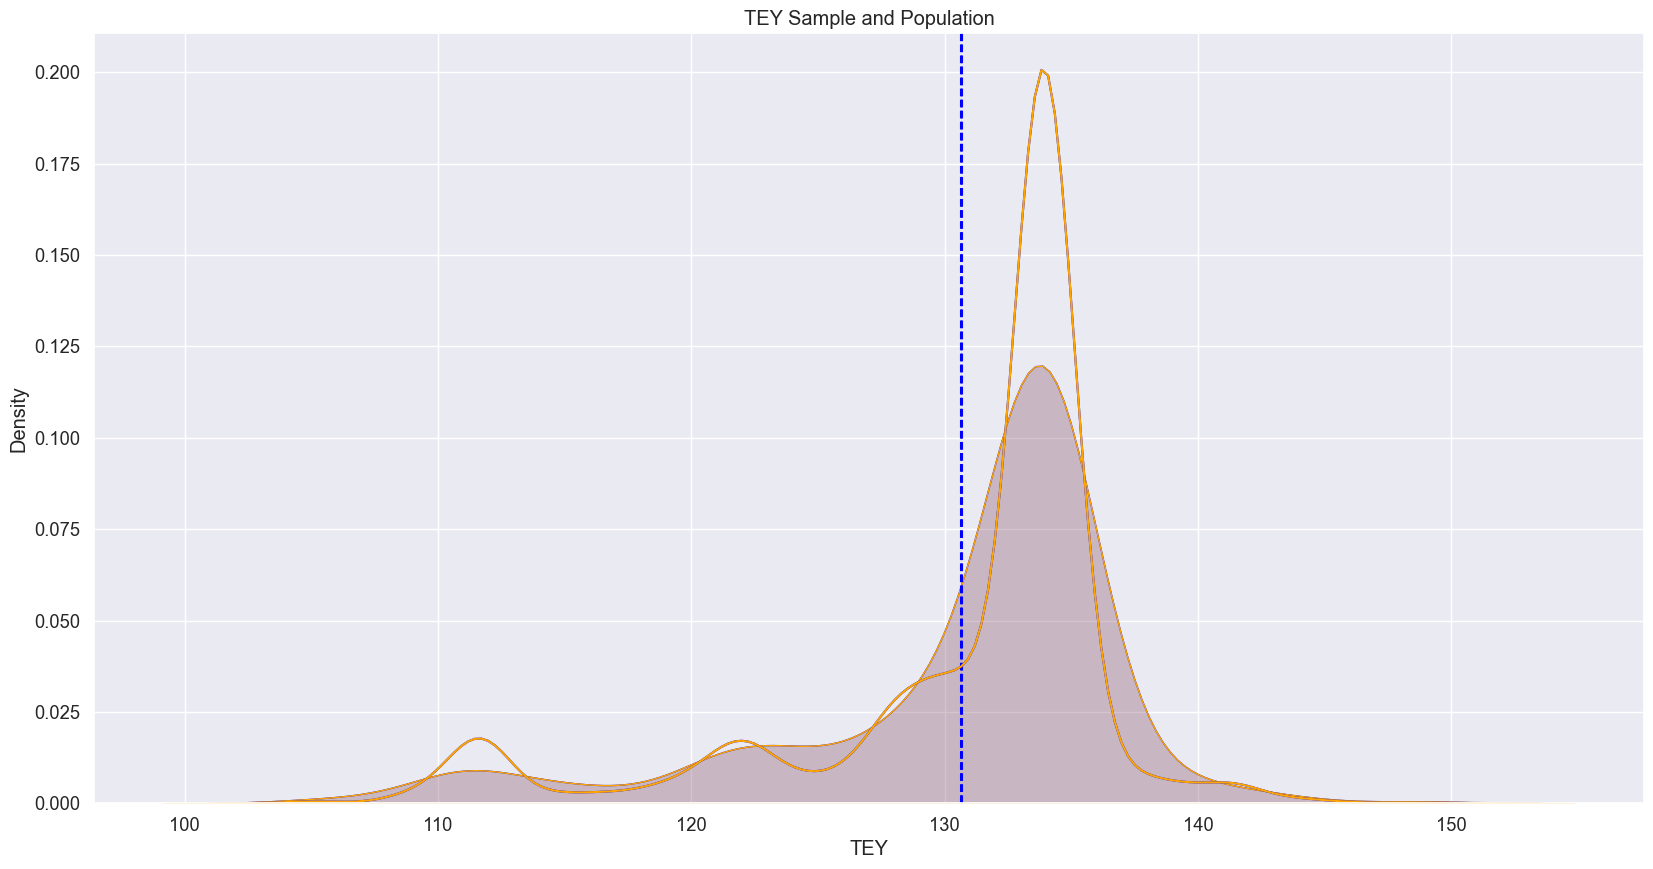

In [112]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=df3, x='TEY', shade=False, alpha=1,color='blue')
sns.kdeplot(data=df3_samples, shade=True, alpha=0.20,color='blue')
k1= df3['TEY'].mean()
k2=df3_samples.mean()
plt.axvline(k1, color='blue', linestyle='--')
plt.axvline(k2, color='blue', linestyle='--')   
sns.kdeplot(data=df3, x='TEY', shade=False, alpha=1,color='orange')
sns.kdeplot(data=df3_samples,shade=True, alpha=0.20,color='orange')
plt.title('TEY Sample and Population')
plt.show()

#### CHECK NORMALITY

In [113]:
from scipy.stats import shapiro
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed ")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [114]:
check_normality(df3_samples)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed 


#### CHECK VARIANCE HOMOGENITY

In [115]:
t_statistic_value , p_value = stats.bartlett(df3_samples,df3['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 0.0053 , p_value: 0.9419
Ho can not be rejected, there is enough evidence about their variance are homogeneous


***RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ONE SAMPLE T TEST)so we use non parametric test(for this question it must be MAN WHITNEY U TEST).**

#### MANN WHITNEYU TEST

In [116]:
from scipy.stats import mannwhitneyu
ttest,p_value0= mannwhitneyu(df3_samples,df3['TEY'])
H0= 'H0: there is no statistically evidence that there are significant difference between TEY sample and population mean'
HA= 'HA: there is a statistically evidence that there are significant difference between TEY sample and population mean'
print("p value:%.10f" % p_value)

if p_value0 <0.005:
    print("H0 rejected. {}".format(HA))
else:
    print("H0 fail to reject. {}".format(H0))

p value:0.9418723508
H0 fail to reject. H0: there is no statistically evidence that there are significant difference between TEY sample and population mean


#### TAKING ANOTHER SAMPLE AND TEST AGAIN

In [117]:
sample_size=700
df3_samples= np.random.choice(df3['TEY'], sample_size)

In [118]:
df3_samples=pd.Series(df3_samples)

In [119]:
#Before tets we must observe diffrence between real data and sample.
(df3['TEY'].mean()- df3_samples.mean()) /df3['TEY'].mean()

-0.0026349005150382923

In [120]:
(df3['TEY'].median()- df3_samples.median()) / df3['TEY'].median()

-0.0007862223886184183

#### Plotting sample and Population Dsitributions

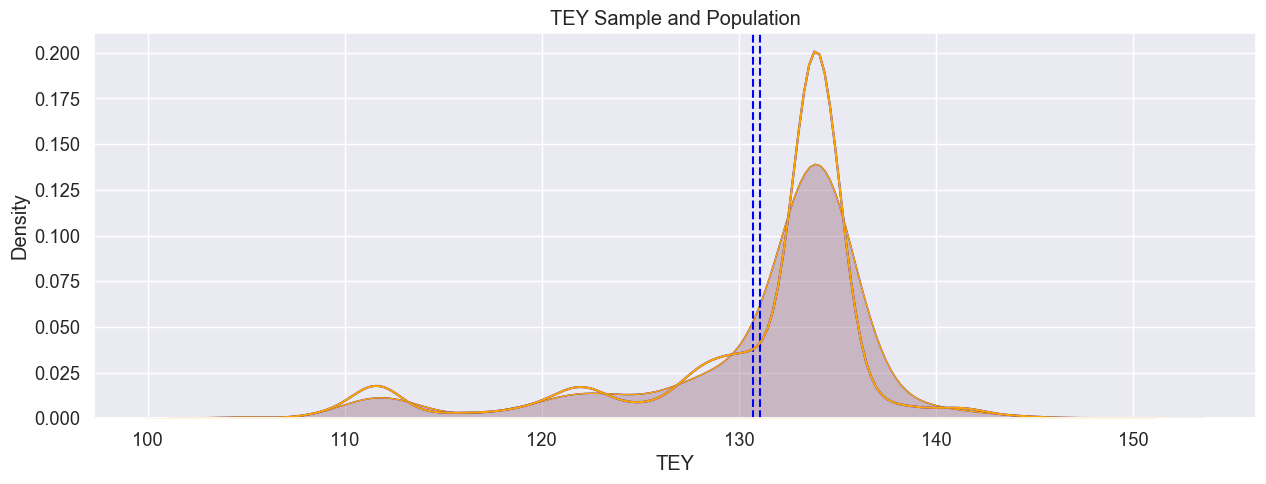

In [121]:
plt.figure(figsize=(15,5))
sns.kdeplot(data=df3, x='TEY', shade=False, alpha=1,color='blue')
sns.kdeplot(data=df3_samples, shade=True, alpha=0.20,color='blue')
k1= df3['TEY'].mean()
k2=df3_samples.mean()
plt.axvline(k1, color='blue', linestyle='--')
plt.axvline(k2, color='blue', linestyle='--')   
sns.kdeplot(data=df3, x='TEY', shade=False, alpha=1,color='orange')
sns.kdeplot(data=df3_samples,shade=True, alpha=0.20,color='orange')
plt.title('TEY Sample and Population')
plt.show()

#### CHECK NORMALITY

In [122]:
check_normality(df3_samples)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed 


#### CHECK VARIANCE HOMOGENITY

In [123]:
t_statistic_value , p_value = stats.bartlett(df3_samples,df3['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 3.3251 , p_value: 0.0682
Ho can not be rejected, there is enough evidence about their variance are homogeneous


***RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ONE SAMPLE T TEST)so we use non parametric test(for this question it must be MAN WHITNEY U TEST).**

#### MANN WHITNEYU TEST

In [124]:
ttest,p_value0= mannwhitneyu(df3_samples,df3['TEY'])
H0= 'H0: there is no statistically evidence that there are significant difference between TEY sample and population mean'
HA= 'HA: there is a statistically evidence that there are significant difference between TEY sample and population mean'
print("p value:%.10f" % p_value)

if p_value0 <0.005:
    print("H0 rejected. {}".format(HA))
else:
    print("H0 fail to reject. {}".format(H0))

p value:0.0682307172
H0 fail to reject. H0: there is no statistically evidence that there are significant difference between TEY sample and population mean


**RESULT=As we can see, our random samples do not have same distributions with population of dependent variables(TEY). 

### 5.5 HYPOTHESIS TEST THAT LOOKING FOR ANY CHANGES ACCORDING TO DIFFERENT YEARS

**Dataset collected from a power plant in Turkey  between 2011 and 2015. We can evaluate whether they are significantly different between years with the help of hypothesis tests**

### 5.5.1. Is there a significant difference on TEY between each year
-   $H_0: µ\_1 = µ\_2$  ("there is no statistically evidence that there are significant difference on TEY between years")
-   $H_1: µ\_1 ≠ µ\_2$  ("there is statistically evidence that there are significant difference  on TEYbetween years")

In [125]:
group1=df_2011
group2=df_2012
group3=df_2013
group4=df_2014
group5=df_2015

#### CHECK NORMALITY

In [126]:
#normality check with shapiro test:
shapiro_result = (df_total.groupby('year')['TEY'] .apply(lambda x: pd.Series(shapiro(x), index=['W','p_value']))) 
shapiro_result.T

year         
2011  W          9.296440e-01
      p_value    0.000000e+00
2012  W          8.994904e-01
      p_value    0.000000e+00
2013  W          9.166459e-01
      p_value    0.000000e+00
2014  W          9.750188e-01
      p_value    1.385959e-33
2015  W          9.715941e-01
      p_value    7.470166e-36
Name: TEY, dtype: float64

**RESULT= All co_groups do not have normal distributions**

#### CHECK VARIANCE HOMOGENITY

In [127]:
t_statistic_value , p_value = stats.bartlett(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'], group5['TEY'])
print('t_statistic_value : %.4f , p_value: %.4f' %(t_statistic_value , p_value))
alpha = 0.005
if p_value > alpha:
    print('Ho can not be rejected, there is enough evidence about their variance are homogeneous')
else:
    print('Ho can be rejected. they are not homogeneous variance')

t_statistic_value : 325.7562 , p_value: 0.0000
Ho can be rejected. they are not homogeneous variance


**RESULT=Assumption check tells us our data is not suitable parametric hypothesis test (for this question it can be ANOVA TEST)so we use non parametric test(for this question it must be Kruskal test).**

#### KRUSKAL TEST

In [128]:
t_statistic_value , p_value=stats.kruskal(group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'], group5['TEY'])
print('t_statistic_value:' ,t_statistic_value, 'p_value:', p_value) 

t_statistic_value: 298.6465847841756 p_value: 2.1219950849566365e-63


**RESULT= H0 rejected.There is statistically evidence that there are significant difference on TEY between YEARS ***

#### POSTHOC TEST

In [129]:
posthoc_df = sp.posthoc_mannwhitney([group1['TEY'],group2['TEY'],group3['TEY'],group4['TEY'], group5['TEY']], p_adjust = 'bonferroni')
group_names= ["group1", "group2","group3", "group4","group5"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

**5.4.RESULT= After Mann WhitneyU. test result, we understand there is significant evidence that our dependent variable (TEY) have different distributions between years**

### 5.6. HYPOTHESIS TESTINGS RESULT

 -In 5.3 part, we make group of each independent variables and seek whether there is a statsitically evidence they have different distributions or not.Finally We obtained taht they all have different distributions

 -In 5.3. part, we take two random samples from independent variables and seek that there is a statsitically evidence samples and population of independent variables have different distributions or not.Finally We obtained taht they all have different distributions

 -In 5.5. part,we make group from each year which are 2011,2012,2013,2014,2015 and seek that there is a statsitically evidence independent variables have different distributions or not depends on yaers. But We obtained taht they all have different distributions

 -After these tests We can say this data is not so proper for Linear Regression but we can try  scaling and regularization for conducting linear regression


### 6. LINEAR REGRESSION<a class="anchor" id="linear-regression"></a>

#### 6.1. LINEAR REGRESSION WITH STAT MODEL

In [130]:
from sklearn.model_selection import train_test_split
X= df2.drop('TEY',axis=1)
y =df2['TEY']
# Split data into train and test
np.random.seed(42)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size=0.2)


In [131]:
X_train_raw.shape, X_test_raw.shape, y_train.shape, y_test.shape

((14738, 7), (3685, 7), (14738,), (3685,))

In [132]:
import statsmodels.api as sm

In [133]:
X= sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    TEY   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 2.141e+04
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:56:29   Log-Likelihood:                -40926.
No. Observations:               18423   AIC:                         8.187e+04
Df Residuals:                   18415   BIC:                         8.193e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -324.6581     70.332     -4.616      0.0

**6.1.RESULT

-R2 score is 0.891 which means that independent variables can explain 0.89 of dependnet variables or we can say it is model' sucess score.

-F-statistic's p_values=0.00 that is lower tahn aplha=0.005 which means our model is meaningful for the dataset.

-Jargue-Bera 's p_values =  2.24e-55 that is lower tahn aplha=0.005 which means the data does not come from a normal distribution.

-Durbin Watson Coefficient is 0.214 tahat is between 0 and 5 which means that our data do not autocorellated.

-Skew result=0.135 that is lower than 1 which means data is not skewed maybe slightly skewed.

-Kurtosis result=2.495 that is lower than 3 which mean data does not have kurosis but slighlty sharp.

-Coefficient's p_values: 

  For Intercept, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of AFDP, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of GTEP, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of TIT, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of TAT, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of CDP, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of CO, p_value is lower than aplha=0.005 which means it is significant.
  
  For coefficient of year, p_value is lower than aplha=0.005 which means it is significant.
  

#### PRINT LINEAR REGRESSION EQUATION

In [134]:
# Make List of model coefficient:
param_lists=[]
for i in model.params:
    param_lists.append(i)
print(param_lists)

[-324.6580586469669, -1.6704061956050207, -0.3928135117072756, 0.1833727041963171, -0.7294327317953783, 12.555368005179455, -0.23908002139850842, 0.2613617176757175]


In [135]:
#Print model equation:
print('TEY='+str('%.2f' % model.params[0]) + str('%.2f' % model.params[1])+'*'+'AFDP' + str('%.2f' % model.params[2])+'*'+'GTEP +'\
      + str('%.2f' % model.params[3]) + '*' + 'TIT' + str('%.2f' % model.params[4]) + '*' + 'TAT +'\
      + str('%.2f' % model.params[5]) + '*' + 'CDP' + str('%.2f' % model.params[6]) + '*' + 'CO +'\
      + str('%.2f' % model.params[7]) + '*' + 'year')
                                                       
                                                       
                                                
                                                                                                     

TEY=-324.66-1.67*AFDP-0.39*GTEP +0.18*TIT-0.73*TAT +12.56*CDP-0.24*CO +0.26*year


#### 6.2. LINEAR REGRESSION WITH SKLEARN

##### SCALING INDEPENDENT VARIABLES FOR SKLEARN LINEAR REGRESSION

In [136]:
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train= scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [137]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

##### SKLEARN LINEAR REGRESSION

In [138]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,mean_absolute_error,mean_squared_error,r2_score
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    MSE = metrics.mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([MAE, MSE, RMSE, R2_Score], index=['MAE', 'MSE', 'RMSE' ,'R2-Score'], columns=[model_name])

In [139]:
model_evaluation(linear_reg, X_test, y_test, 'Linear Reg.')

Linear Reg.
MAE          1.835437
MSE          4.929292
RMSE         2.220201
R2-Score     0.891424

#### 6.2.1.MODEL EVALUATION WITH CROSS VALIDATION

In [140]:
linear_reg_cv = LinearRegression()
scaler = StandardScaler()
pipeline = make_pipeline(StandardScaler(),  LinearRegression())

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result['test_neg_mean_absolute_error']).mean()
MAE_std = (-result['test_neg_mean_absolute_error']).std()
MSE_mean = (-result['test_neg_mean_squared_error']).mean()
MSE_std = (-result['test_neg_mean_squared_error']).std()
RMSE_mean = (-result['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result['test_r2'].mean()
R2_Score_std = result['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

Mean       Std
MAE       1.840657  0.024440
MSE       4.985761  0.121624
RMSE      2.232715  0.027267
R2-Score  0.890322  0.003780

**RESULT= The linear regression model obtained R2-score of %89.03 using 6-fold cross-validation.**

**Pipeline is a great way to prevent data leakage as it ensures that the appropriate method is performed on the correct data subset. This is ideal for using in cross-validation since it ensures that only the training folds are used when performing fit and the test set (validation set) is used only for calculating the accuracy score in each iteration of cross-validation.**

#### 6.2.2.ASSUMPTION CHECK

#### Assumption 1-Linearity

**This assumes that there is a linear relationship between the independent variables or features and the dependent variable or label. Fitting a linear model to data with non-linear patterns results in serious prediction errors, because our model is underfitting.
To detect nonlinearity, we can check:

**Plots of actual vs. predicted values -> The desired outcome is that points are symmetrically distributed around a diagonal line
Plots of residuals vs. predicted values -> The desired outcome is that points are symmetrically distributed around a horizontal line
In both cases we should have an almost constant variance.

In [141]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

In [142]:
def residuals(model, X_test, y_test):
    '''
    Creates predictions on the features with the model and calculates residuals
    '''
    y_pred = model.predict(X_test)
    df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results
def linear_assumption(model, X_test, y_test):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model
    '''
    df_results = residuals(model, X_test, y_test)
    
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    sns.regplot(x='Predicted', y='Actual', data=df_results, lowess=True, ax=ax[0],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[0].set_title('Actual vs. Predicted Values', fontsize=15)
    ax[0].set_xlabel('Predicted', fontsize=12)
    ax[0].set_ylabel('Actual', fontsize=12)        
    
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True, ax=ax[1],
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=15)
    ax[1].set_xlabel('Predicted', fontsize=12)
    ax[1].set_ylabel('Residuals', fontsize=12)  

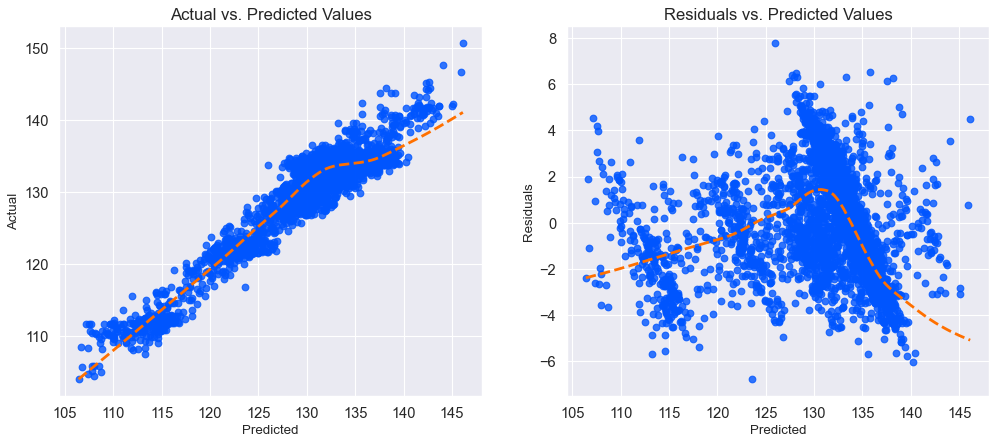

In [143]:
linear_assumption(linear_reg, X_test, y_test)

**RESULT= The inspection of the plots shows that the linearity assumption is not satisfied.

**Potential solutions:

Applying nonlinear transformations

Adding polynomial terms to some of the predictors

####  Assumption 2 - Normality of Residuals

**This assumes that the error terms of the model are normally distributed with a mean value of zero.**

**This can actually happen if either the predictors or the label are significantly non-normal. Other potential reasons could include the linearity assumption being violated or presence of a few large outliers in data affecting our model.**

**A violation of this assumption could cause issues with either shrinking or inflating our confidence intervals. When the residuals distribution significantly departs from Gaussian, confidence intervals may be too wide or too narrow. Technically, we can omit this assumption if we assume instead that the model equation is correct and our goal is to estimate the coefficients and generate predictions (in the sense of minimizing mean squared error). However, normally we are interested in making valid inferences from the model or estimating the probability that a given prediction error will exceed some threshold in a particular direction. To do so, the assumption about the normality of residuals must be satisfied.**

**To investigate this assumption we can check:**

**Check residuals histogram**

**Quantile-Quantile probability plot -> plotting the residuals vs the order of statistic**

**Anderson-Darling test**

In [144]:
def normal_errors_assumption(model, X_test, y_test, p_value_thresh=0.05):
    '''
    Function for inspecting the assumption of normality of residuals.
    '''
    df_results = residuals(model, X_test, y_test)
    
    # Anderson-Darling Test
    p_value = normal_ad(df_results['Residuals'])[1]
    
    print('\nP-value from the test (below 0.05 generally means non-normal):  ', np.round(p_value,6))
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed. Assumption not satisfied.') 
    else:
        print('Residuals are normally distributed. Assumption satisfied.')
    fig, ax = plt.subplots(1,2, figsize=(15,6), dpi=80)
    
    sns.histplot(data=df_results, x='Residuals', kde=True, ax=ax[0], bins=15, 
                 color='#0055ff', edgecolor='none', alpha=0.4, line_kws={'lw': 2.5})
    ax[0].set_xlabel('Residuals', fontsize=12)
    ax[0].set_ylabel('Count', fontsize=12)
    ax[0].set_title('Distribution of Residuals', fontsize=15)
    textstr = '\n'.join((
        r'$\mu=%.2f$' %np.mean(df_results['Residuals']),
        r'$\sigma=%.2f$' %np.std(df_results['Residuals']),
        ))
    ax[0].text(0.7, 0.9, textstr, transform=ax[0].transAxes, fontsize=15, verticalalignment='top',
                 bbox=dict(boxstyle='round',facecolor='#509aff', edgecolor='black', pad=0.5))
    # Q-Q Probability Plot
    stats.probplot(df_results['Residuals'], dist="norm", plot= ax[1])
    ax[1].set_title("Residuals Q-Q Plot", fontsize=15)
    ax[1].set_xlabel('Theoretical Quantiles', fontsize=12)
    ax[1].set_ylabel('Ordered Values', fontsize=12)
    ax[1].get_lines()[0].set_markerfacecolor('#509aff')
    ax[1].get_lines()[1].set_color('#ff7000')
    ax[1].get_lines()[1].set_linewidth(2.5)
    ax[1].get_lines()[1].set_linestyle('--')
    ax[1].legend(['Actual','Theoretical'])
    
    plt.show()


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


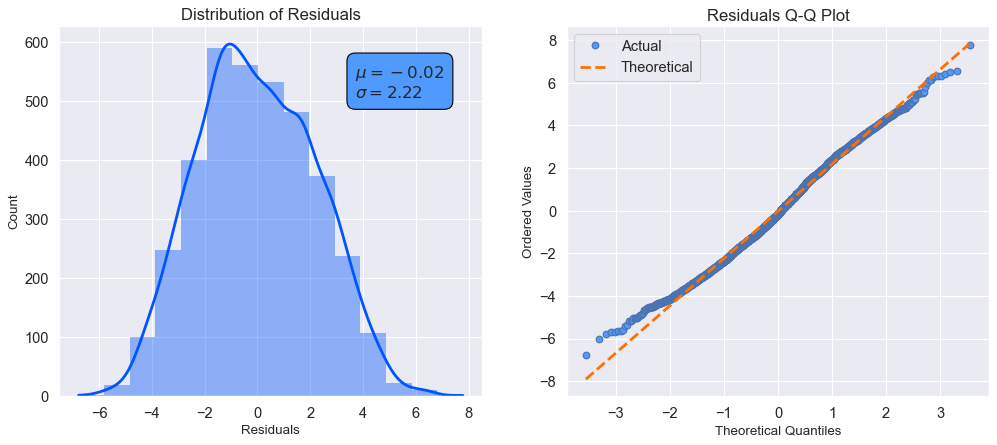

In [145]:
normal_errors_assumption(linear_reg, X_test, y_test)

**RESULT= The non-zero mean value and  pattern of the deviations in the QQ plot show that the residuals do not follow the Gaussian distribution.

**Potential solutions:**

Nonlinear transformation of target variable and features

Removing potential outliers

#### Assumption 3 - No Perfect Multicollinearity

**Multicollinearity occurs when the independent variables are correlated to each other. It becomes difficult for the model to estimate the relationship between each independent variable and the dependent variable independently because the independent variables tend to change in unison. The coefficient estimates can swing wildly based on which other independent variables are in the model and they become very sensitive to small changes in the model. Therefore, the estimates will be less precise and highly sensitive to particular sets of data. This increases the standard error of the coefficients, which results in them potentially showing as statistically insignificant when they might actually be significant. On the other hand, the simultaneous changes of the independent variables can lead to large fluctuations of the target variable, which leads to the overfitting of the model and the reduction of its performance.**

**To detect multicolinearity, we can:
Use a heatmap of the correlation (step 7)
Examine the variance inflation factor (VIF)
Interpretation of VIF: The square root of a given variable’s VIF shows how much larger the standard error is, compared with what it would be if that predictor were uncorrelated with the other features in the model. The higher the value of VIF the higher correlation between this variable and the rest. A rule of thumb is that if VIF > 10 then multicollinearity is high.**

In [146]:
def multicollinearity_assumption(X):
    ''''
    This assumes that predictors are not correlated with each other and calculates VIF values of predictors
    '''
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    possible_multicollinearity = sum([1 for v in vif if v > 10])
    definite_multicollinearity = sum([1 for v in vif if v > 100])
    
    print('{} cases of possible multicollinearity.'.format(possible_multicollinearity))
    print('{} cases of definite multicollinearity.'.format(definite_multicollinearity))
    
    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied.')
        else:
            print('Assumption possibly satisfied.')
    else:
        print('Assumption not satisfied.')
    
    return pd.DataFrame({'vif': vif}, index=X.columns).round(2)

In [147]:
multicollinearity_assumption(X)

3 cases of possible multicollinearity.
1 cases of definite multicollinearity.
Assumption not satisfied.


vif
const  18298334.87
AFDP          1.41
GTEP          6.37
TIT          20.20
TAT           1.00
CDP          23.99
CO            1.64
year          3.41

**RESULT : Possible multicollinearities are CDP and TIT

- Potential solutions:

- Using Regularization

- Removing features with high values of VIF

- Using PCA -> Reducing features to a smaller set of uncorrelated components

#### Assumption 4 - No Autocorrelation of Residuals

**This assumes no autocorrelation of the residuals. The presence of autocorrelation usually indicates that we are missing some information that should be captured by the model. Our model can be systematically biased by under-prediction or over-prediction under certain conditions. This could be the result of violating the linearity assumption.**

**To investigate this assumption we can perform a Durbin-Watson test to determine whether the correlation is positive or negative:
- The test statistic always has a value between 0 and 4
- Values of 1.5 < d < 2.5 means that there is no autocorrelation in the data
- Values < 1.5 indicate positive autocorrelation, values > 2.5 indicate negative autocorrelation**

In [148]:
def autocorrelation_assumption(model, X_test, y_test):
    '''
    It assumes that there is no autocorrelation in the residuals. If there is autocorrelation, then 
    there is a pattern that is not explained because the current value is dependent on the previous value.
    '''
    df_results = residuals(model, X_test, y_test)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', round(durbinWatson,3))
    
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation. Assumption not satisfied.', '\n')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation. Assumption not satisfied.', '\n')
    else:
        print('Little to no autocorrelation. Assumption satisfied.', '\n')

In [149]:
autocorrelation_assumption(linear_reg, X_test, y_test)

Durbin-Watson: 2.041
Little to no autocorrelation. Assumption satisfied. 



#### Assumption 5 - Homoscedasticity

**Homoscedasticity means that the residuals doesn’t change across all the values of the target variable.
When residuals do not have constant variance, it is difficult to determine the true standard deviation of the forecast errors, usually resulting in confidence intervals that are too wide/narrow. The effect of heteroscedasticity might also be putting too much weight to a subset of data when estimating coefficients**

**To investigate if the residuals are homoscedastic, we can look at a plot of residuals vs. predicted values. The placement of the points should be random and no pattern (increase/decrease in values of residuals) should be visible.**

In [150]:
def homoscedasticity_assumption(model, X_test, y_test):
    """
    Homoscedasticity assumes that the residuals exhibit constant variance
    """
    print('The orange line should be flat:')
    df_results = residuals(model, X_test, y_test)
    
    fig = plt.figure(figsize=(6,6), dpi=80)
    sns.regplot(x='Predicted', y='Residuals', data=df_results, lowess=True,
                color='#0055ff', line_kws={'color':'#ff7000','ls':'--','lw':2.5})
    plt.axhline(y=0, color='#23bf00', lw=1)
    plt.title('Residuals vs. Predicted Values', fontsize=15)
    plt.xlabel('Predicted Values', fontsize=12)
    plt.ylabel('Residuals', fontsize=12)    
    plt.show()

The orange line should be flat:


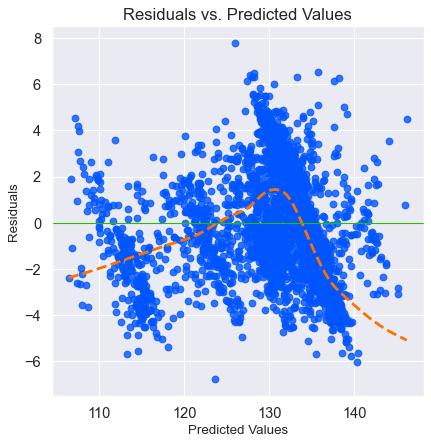

In [151]:
homoscedasticity_assumption(linear_reg, X_test, y_test)

**RESULT=We can not see a fully uniform variance across our residuals because the orange line is not flat. The assumption is not satisfied.**

Potential solutions:

Outlier removal (We have already eliminated outliers)

Appllying log transformation of independent variables

Applying polynomial regression

#### 6.2.3. ASSUMPTION RESULT

**In the following:**

**To satisfy the multicollinearity assumption, we will remove the CDP and TIT feature.
Then, according to the pattern in the plot of the residuals vs. predicted values, we will use box-cox transformation on the entire dataset.
By applying polynomial regression, we will try to improve the satisfaction of homoscedasticity and normality of residuals.
Finally, we will use regularization to reduce the probability of the model to be overfit.**


In [152]:
df3=df2.drop(['CDP','TIT'],axis=1)

##### RESULT VISUALIZATION
We compare the actual and predicted target values for the test data with the help of a bar plot:

In [153]:
y_pred = linear_reg.predict(X_test)
df_comp = pd.DataFrame({'actual values':y_test, 'predictions':y_pred})
df_comp

actual values  predictions
786          133.99   135.185016
2765         134.06   133.181426
5369         129.53   131.406196
4974         121.55   124.543059
5897         120.58   120.127995
...             ...          ...
1128         133.86   130.101485
5478         133.79   135.189515
5347         130.27   132.683608
5844         134.91   135.231616
4528         122.73   124.711288

[3685 rows x 2 columns]

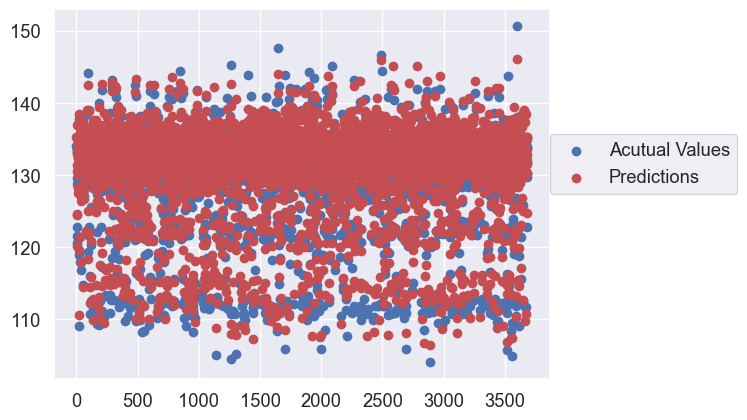

In [154]:
fig, ax = plt.subplots()
x = np.arange(0, len(df_comp), 1)
ax.scatter(x, df_comp["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df_comp["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

#### 6.3. DIFFERENT SCALING METHODS

#### 6.3.1. Apply Box-Cox Transformation:

**In order to satisfy the regression assumptions, we apply the Box-Cox transformation on the whole dataset. The Box-Cox transformations change the shape of our data, making it more close to a normal distribution.
In order to prevent data leakage, the fitted lambda value for each feature is obtained from the training data set and then the transformation is applied to the both training and test data:**

In [155]:
fitted_lambda = pd.Series(np.zeros(len(df2.columns), dtype=np.float64), index=df2.columns)
y =df2['TEY']
X=df2.drop('TEY',axis=1)
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

y_train, fitted_lambda['TEY'] = stats.boxcox(y_train+1)
for col in X_train.columns:
    X_train[col], fitted_lambda[col] = stats.boxcox(X_train[col]+1)
    
fitted_lambda

AFDP      0.395560
GTEP      2.144582
TIT      50.790473
TAT    -440.412580
TEY      11.764699
CDP      14.218856
CO        0.613183
year   -259.681750
dtype: float64

In [156]:
y_test = stats.boxcox(y_test+1, fitted_lambda['TEY'])
for col in X_test.columns:
    X_test[col] = stats.boxcox(X_test[col]+1, fitted_lambda[col])

In [157]:
y_train = pd.DataFrame(y_train, index=X_train.index, columns=['TEY'])
y_test = pd.DataFrame(y_test, index=X_test.index, columns=['TEY'])

X_boxcox = pd.concat([X_train, X_test])
y_boxcox = pd.concat([y_train, y_test])

df_boxcox = pd.concat([X_boxcox, y_boxcox], axis=1)
df_boxcox.sort_index(inplace=True)


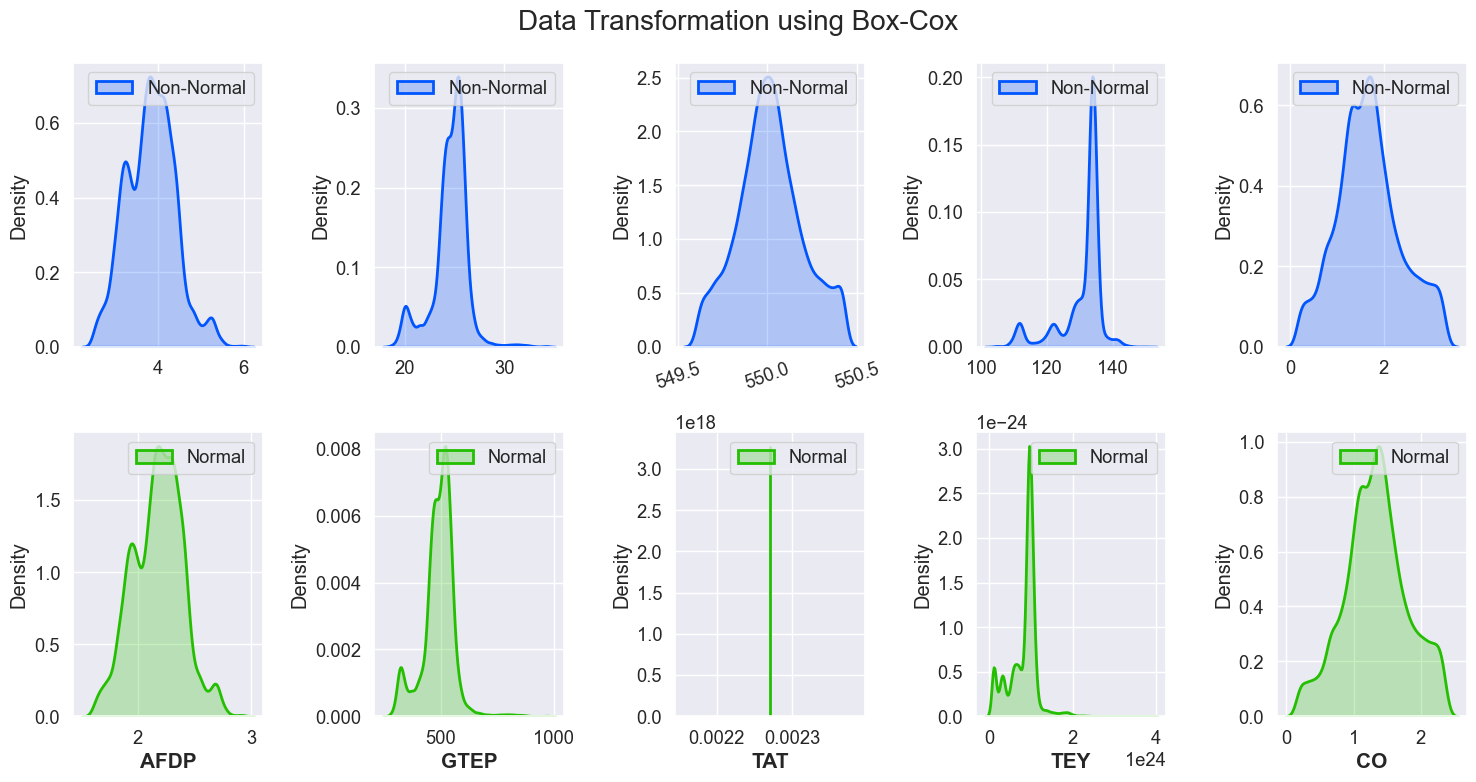

In [158]:
fig, ax = plt.subplots(2, 5, figsize=(15,8), dpi=100)
columns = ['AFDP', 'GTEP', 'TAT', 'TEY', 'CO']

for i,col in enumerate(columns):
    sns.kdeplot(df2[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(df_boxcox[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])  
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Box-Cox', fontsize=20)
plt.tight_layout()
plt.show()

#### 6.3.2. APPLY LOG TRANSFORMATION 

In [159]:
log_df = df2.apply(lambda x: np.log10(x) if np.issubdtype(x.dtype, np.number) else x)

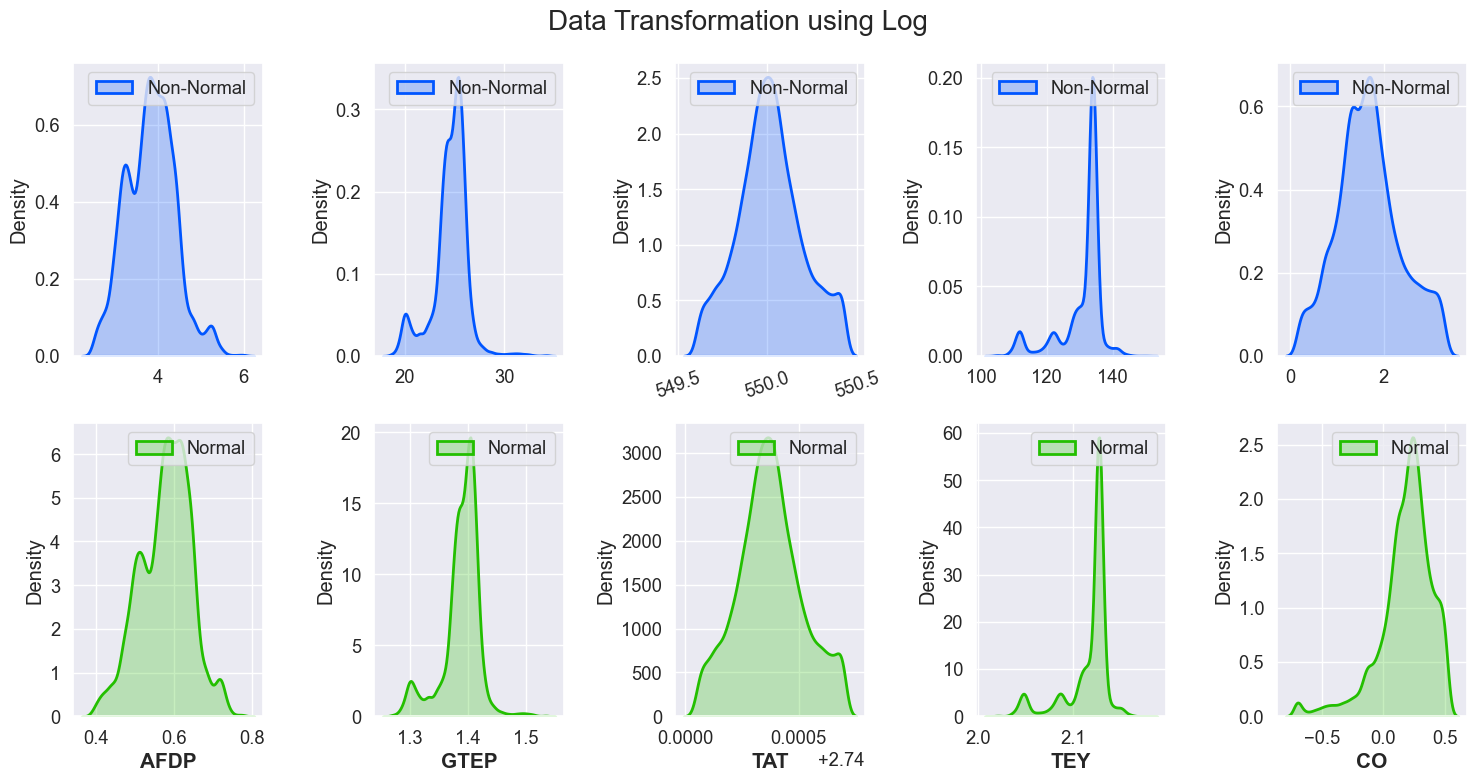

In [160]:
fig, ax = plt.subplots(2, 5, figsize=(15,8), dpi=100)
columns = ['AFDP', 'GTEP', 'TAT', 'TEY', 'CO']

for i,col in enumerate(columns):
    sns.kdeplot(df2[col], label="Non-Normal", fill=True, color='#0055ff', linewidth=2, ax=ax[0,i])
    sns.kdeplot(log_df[col], label="Normal", fill=True, color='#23bf00', linewidth=2, ax=ax[1,i])  
    ax[0,i].set_xlabel('', fontsize=15)
    ax[1,i].set_xlabel(col, fontsize=15, fontweight='bold')
    ax[0,i].legend(loc="upper right")
    ax[1,i].legend(loc="upper right")

ax[0,2].tick_params(axis='x', labelrotation = 20)
plt.suptitle('Data Transformation using Log', fontsize=20)
plt.tight_layout()
plt.show()

**6.3.RESULT= We applied Box-Cox and Log Transformation to normalize our data but as we see from the ater and before shape of variables, not only Box-Cox but also Log transformation are not useful to normalize our variables Therefore we will continue with unscaled data.**

### 6.4. POLYNOMIAL REGRESSION

**- In order to overcome under-fitting and meet linear regression assumptions,
first we try to increase the complexity of the model by adding all of the second-order terms of the features:**

In [161]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly = pd.DataFrame(X_poly, columns=poly_features.get_feature_names_out(X.columns))
X_poly.head(5)

AFDP    GTEP     TIT     TAT     CDP       CO    year     AFDP^2  AFDP GTEP    AFDP TIT     AFDP TAT   AFDP CDP   AFDP CO  AFDP year      GTEP^2    GTEP TIT     GTEP TAT    GTEP CDP    GTEP CO  GTEP year       TIT^2     TIT TAT     TIT CDP      TIT CO   TIT year        TAT^2     TAT CDP      TAT CO    TAT year       CDP^2    CDP CO   CDP year      CO^2    CO year     year^2
0  3.5758  23.979  1086.2  549.83  11.898  0.32663  2011.0  12.786346  85.744108  3884.03396  1966.082114  42.544868  1.167964  7190.9338  574.992441  26045.9898  13184.37357  285.302142   7.832261  48221.769  1179830.44  597225.346  12923.6076  354.785506  2184348.2  302313.0289  6541.87734  179.590973  1105708.13  141.562404  3.886244  23926.878  0.106687  656.85293  4044121.0
1  3.5709  23.951  1086.1  550.05  11.892  0.44784  2011.0  12.751327  85.526626  3878.35449  1964.173545  42.465143  1.599192  7181.0799  573.650401  26013.1811  13174.24755  284.825292  10.726216  48165.461  1179613.21  597409.305  12915.9012  486.399024  2184147.1  302555.0025  6541.19460  246.334392  1106150.55  141.419664  5.325713  23914.812  0.200561  900.60624  4044121.0
2  3.5828  23.990  1086.5  550.19  12.042  0.45144  2011.0  12.836456  85.951372  3892.71220  1971.220732  43.144078  1.617419  7205.0108  575.520100  26065.1350  13199.05810  288.887580  10.830046  48243.890  1180482.25  597781.435  13083.6330  490.489560  2184951.5  302709.0361  6625.38798  248.377774  1106432.09  145.009764  5.436240  24216.462  0.203798  907.84584  4044121.0
3  3.5808  23.911  1086.5  550.17  11.990  0.23107  2011.0  12.822129  85.620509  3890.53920  1970.048736  42.933792  0.827415  7200.9888  571.735921  25979.3015  13155.11487  286.692890   5.525115  48085.021  1180482.25  597759.705  13027.1350  251.057555  2184951.5  302687.0289  6596.53830  127.127782  1106391.87  143.760100  2.770529  24111.890  0.053393  464.68177  4044121.0
4  3.5781  23.917  1085.9  550.00  11.910  0.26747  2011.0  12.802800  85.577418  3885.45879  1967.955000  42.615171  0.957034  7195.5591  572.022889  25971.4703  13154.35000  284.851470   6.397080  48097.087  1179178.81  597245.000  12933.0690  290.445673  2183744.9  302500.0000  6550.50000  147.108500  1106050.00  141.848100  3.185568  23951.010  0.071540  537.88217  4044121.0

In [162]:
poly_features_names = poly_features.get_feature_names_out(X.columns)
len(poly_features_names)

35

In [163]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [164]:
scaler = StandardScaler()
scaler.fit(X_poly_train)

X_poly_train = scaler.transform(X_poly_train)
X_poly_train = pd.DataFrame(X_poly_train, columns=poly_features_names)

X_poly_test = scaler.transform(X_poly_test)
X_poly_test = pd.DataFrame(X_poly_test, columns=poly_features_names)

In [165]:
polynomial_reg = LinearRegression()
polynomial_reg.fit(X_poly_train, y_poly_train)

LinearRegression()

#### 6.4.1. MODEL EVALUATION

In [166]:
model_evaluation(polynomial_reg, X_poly_test, y_poly_test, 'Polynomial Reg. Test')

Polynomial Reg. Test
MAE                   1.216081
MSE                   2.562651
RMSE                  1.600828
R2-Score              0.942655

In [167]:
model_evaluation(polynomial_reg, X_poly_train, y_poly_train, 'Polynomial Reg. Train')

Polynomial Reg. Train
MAE                    1.207313
MSE                    2.509650
RMSE                   1.584187
R2-Score               0.945244

As can be seen, using boxcox transformation and production of second-order features has improved the model performance greatly!

MAE: 1.313 -> 1.307

MSE: 2.92 -> 2.86

RMSE: 1.709 -> 1.69

R2 Score: %93.46 -> %93.75

The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
The production of third-order and higher features was also tested, which caused the model to become overfit.

#### 6.4.2. GRIDSAERCHCV FOR FINDING BEST PARAMS OF POLYNOMIAL REGRESSION

- We tried polynomial regression with degree=2 that is most common start for polynomial regression and we obtain better score but we can also check other degree to find better regression result.

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score 
degrees = [2, 3, 4, 5, 6] # Change degree "hyperparameter" here
normalizes = [True, False] # Change normalize hyperparameter here
best_score = 0
best_degree = 0
for degree in degrees:
    for normalize in normalizes:
        poly_features = PolynomialFeatures(degree = degree)
        
        polynomial_regressor = LinearRegression(normalize=normalize)
        polynomial_regressor.fit(X_poly_train, y_poly_train)
        scores = cross_val_score(polynomial_regressor, X_poly_train, y_poly_train, cv=5) # Change k-fold cv value here
        if max(scores) > best_score:
            best_score = max(scores)
            best_degree = degree
            best_normalize = normalize

In [169]:
print(best_score)

0.9481344307223406


In [170]:
print(best_normalize)
print(best_degree)

False
2


**RESULT= After GridSearchCV we can also find 2 as the best degree but We catch with GirdsearchCV normalizing variables provide better result.

#### 6.4.3.  MODEL EVALUATION WITH CROSS VALIDATION
- By using cross-validation, we can be more confident in our estimation of the model evaluation metrics:

In [171]:
pipeline = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),  LinearRegression(normalize=True))

kf = KFold(n_splits=6, shuffle=True, random_state=0) 
scoring = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'r2']
result2 = cross_validate(pipeline, X, y, cv=kf, return_train_score=True, scoring=scoring)

MAE_mean = (-result2['test_neg_mean_absolute_error']).mean()
MAE_std = (-result2['test_neg_mean_absolute_error']).std()
MSE_mean = (-result2['test_neg_mean_squared_error']).mean()
MSE_std = (-result2['test_neg_mean_squared_error']).std()
RMSE_mean = (-result2['test_neg_root_mean_squared_error']).mean()
RMSE_std = (-result2['test_neg_root_mean_squared_error']).std()
R2_Score_mean = result2['test_r2'].mean()
R2_Score_std = result2['test_r2'].std()

pd.DataFrame({'Mean': [MAE_mean,MSE_mean,RMSE_mean,R2_Score_mean], 'Std': [MAE_std,MSE_std,RMSE_std,R2_Score_std]},
             index=['MAE', 'MSE', 'RMSE' ,'R2-Score'])

Mean       Std
MAE       1.212628  0.015168
MSE       2.537619  0.076397
RMSE      1.592812  0.023870
R2-Score  0.944178  0.002129

**RESULT= The accuracy obtained from GridSearchCV is  close to the accuracy obtained from cross validation.
So far, we have a polynomial model consisting of 35 features with 93.63% r2-score. Lets check regression assumptions for this model.**

#### 6.4.5 ASSUMPTIONS INVESTIGATION


####  Assumption 1 - Linearity

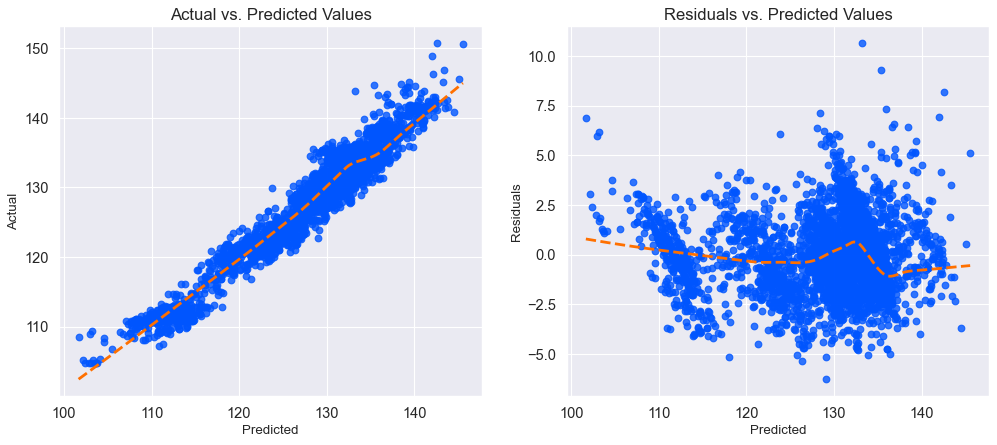

In [172]:
linear_assumption(polynomial_reg, X_poly_test, y_poly_test)

#### Assumption 2 - Normality of Residuals



P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


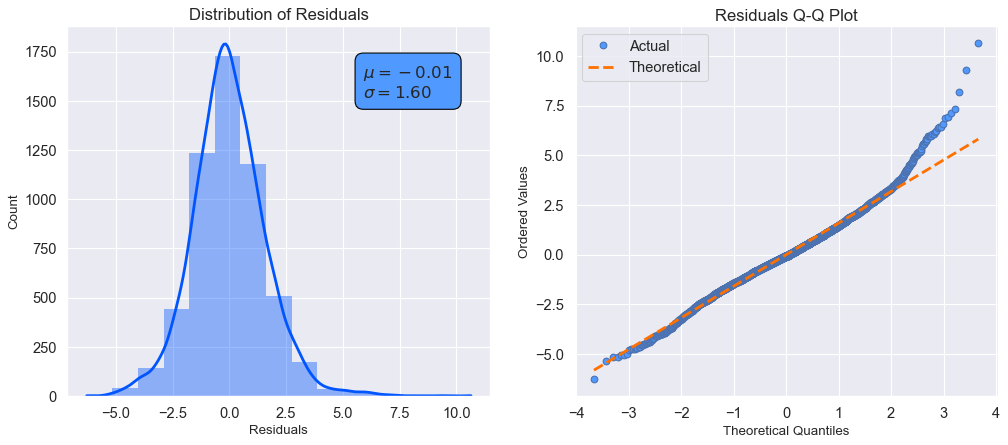

In [173]:
normal_errors_assumption(polynomial_reg, X_poly_test, y_poly_test)

#### Assumption 3 - No Perfect Multicollinearity


In [174]:
warnings.simplefilter(action='ignore')
multicollinearity_assumption(X_poly).T

35 cases of possible multicollinearity.
34 cases of definite multicollinearity.
Assumption not satisfied.


AFDP          GTEP          TIT         TAT           CDP           CO         year  AFDP^2  AFDP GTEP  AFDP TIT     AFDP TAT  AFDP CDP  AFDP CO    AFDP year   GTEP^2    GTEP TIT     GTEP TAT  GTEP CDP  GTEP CO     GTEP year       TIT^2       TIT TAT      TIT CDP     TIT CO      TIT year        TAT^2       TAT CDP       TAT CO     TAT year       CDP^2    CDP CO     CDP year  CO^2      CO year       year^2
vif  41156450.55  1.905528e+08  334076625.5  14281892.1  3.675790e+08  30864106.88  50720518.12  201.85    9844.02  520445.7  14780754.69  45098.04    130.1  21966440.42  5537.41  4800669.41  56606501.27  440414.3  1106.28  1.239049e+08  13781151.9  1.509064e+08  18252661.16  413626.27  2.675747e+08  17760624.34  1.885789e+08  14592563.87  23092770.73  1010770.76  27575.64  213301801.3  33.4  14680025.64  63945173.26

####  Assumption 4 - No Autocorrelation of Residuals

In [175]:
autocorrelation_assumption(polynomial_reg, X_poly_test, y_poly_test)

Durbin-Watson: 1.987
Little to no autocorrelation. Assumption satisfied. 



####  Assumption 5 - Homoscedasticity


The orange line should be flat:


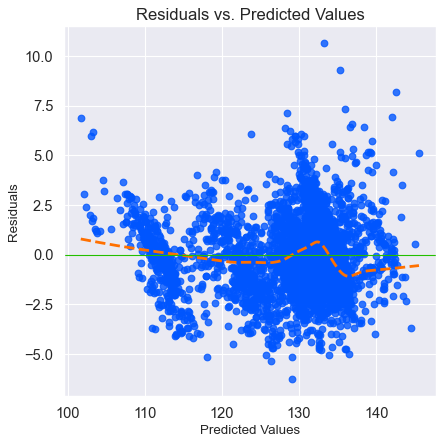

In [176]:
homoscedasticity_assumption(polynomial_reg, X_poly_test, y_poly_test)

**RESULT= All regression assumptions are NOT satisfied except for autocorrelation and linearity. But in general, the polynomial model performs better than the linear model on this data set.
To reduce multicollinearity effects we can use Regularization. Regularized regression puts contraints on the magnitude of the coefficients and will progressively shrink them towards zero relative to the least-squares estimates. There are two types of regularization as follows:**

**- L1 Regularization or LASSO Regularization**

**- L2 Regularization or RIDGE Regularization**

### 6.5 RIDGE REGRESSION

**- In L2 Regularization or Ridge Regularization, we add a penalty which is the sum of the squared values of weights on the loss function in order to push the estimated coefficients towards zero and not take more extreme values:**

**Loss function = OLS + alpha * (the sum of the square of coefficients)
In the above loss function, alpha is the tuning factor which has control over the strength of the penalty term. A small alpha value leads the model to overfit and a large alpha value leads the model to underfit. We use cross-validated ridge regression to tune alpha value:**

#### Split Dataset to Training & Test Sets

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

#### Scale Data using Standard Scaler

In [178]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [179]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge_cv_model = RidgeCV(alphas = alphas, cv = 3, scoring = 'neg_mean_squared_error')                        
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=3, scoring='neg_mean_squared_error')

In [180]:
ridge_cv_model.alpha_

0.005

####  Ridge Model Evaluation

In [181]:
model_evaluation(ridge_cv_model, X_test, y_test, 'Ridge Reg. Test')

Ridge Reg. Test
MAE              1.345610
MSE              2.992075
RMSE             1.729762
R2-Score         0.933045

In [182]:
model_evaluation(ridge_cv_model, X_train, y_train, 'Ridge Reg. Train')

Ridge Reg. Train
MAE               1.353146
MSE               2.973513
RMSE              1.724388
R2-Score          0.935123

**RESULT= The accuracy of the model on the training and test data are close to each other, so the model is not overfit.**

**The Ridge model has almost the same accuracy as the polynomial model.**

#### Ridge Regression Coefficients

In [183]:
ridge_cv_model.coef_

array([  23.41807844,   32.41239817,  -25.59662684,   35.31026915,
         49.13260553,   24.82087088,  -11.3662149 ,    5.25248931,
        -25.31992578,  165.17181277,    2.52112593,  -24.66396302,
         -2.17143462, -149.34657229,   -1.47411475, -249.95689211,
         28.52796569,   95.99356964,    0.1307886 ,  110.36515133,
        216.75354423,  -27.86181232, -138.46929473,   53.28654729,
       -115.56025177,  -30.5873973 ,   28.92260436,    2.21625019,
         -9.65262647,  -36.24107198,   -4.25626367,   49.83316598,
          0.05977287,  -74.89476285,   27.95721984])

**RESULT= As can be seen, RIDGE regularization do NOT allows weights to zero.**

#### 6.5.1. MODEL ASSUMPTION INVESTIGATION 

#### Assumption 1 - Linearity

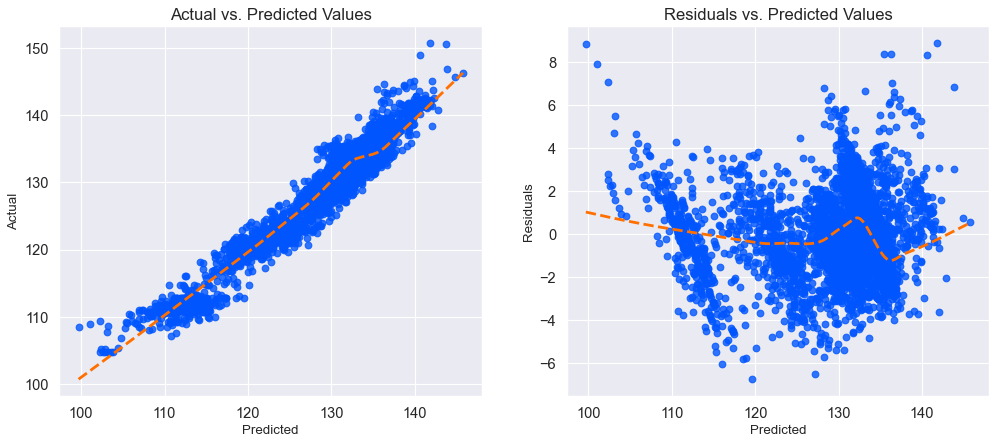

In [184]:
linear_assumption(ridge_cv_model, X_test, y_test)

#### Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


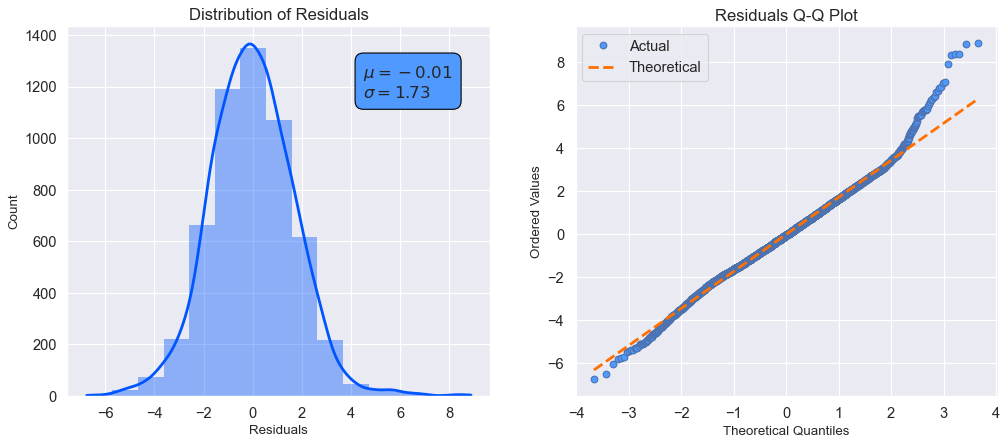

In [185]:
normal_errors_assumption(ridge_cv_model, X_test, y_test)

#### Assumption 3 - No Perfect Multicollinearity

In [186]:
multicollinearity_assumption(X_poly).T

35 cases of possible multicollinearity.
34 cases of definite multicollinearity.
Assumption not satisfied.


AFDP          GTEP          TIT         TAT           CDP           CO         year  AFDP^2  AFDP GTEP  AFDP TIT     AFDP TAT  AFDP CDP  AFDP CO    AFDP year   GTEP^2    GTEP TIT     GTEP TAT  GTEP CDP  GTEP CO     GTEP year       TIT^2       TIT TAT      TIT CDP     TIT CO      TIT year        TAT^2       TAT CDP       TAT CO     TAT year       CDP^2    CDP CO     CDP year  CO^2      CO year       year^2
vif  41156450.55  1.905528e+08  334076625.5  14281892.1  3.675790e+08  30864106.88  50720518.12  201.85    9844.02  520445.7  14780754.69  45098.04    130.1  21966440.42  5537.41  4800669.41  56606501.27  440414.3  1106.28  1.239049e+08  13781151.9  1.509064e+08  18252661.16  413626.27  2.675747e+08  17760624.34  1.885789e+08  14592563.87  23092770.73  1010770.76  27575.64  213301801.3  33.4  14680025.64  63945173.26

#### Assumption 4 - No Autocorrelation of Residuals


In [187]:
autocorrelation_assumption(ridge_cv_model, X_test, y_test)

Durbin-Watson: 1.995
Little to no autocorrelation. Assumption satisfied. 



#### Assumption 5 - Homoscedasticity

The orange line should be flat:


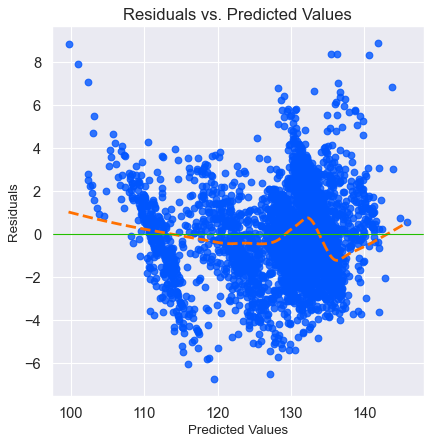

In [188]:
homoscedasticity_assumption(ridge_cv_model, X_test, y_test)

**RESULT= As can be seen, the assumptions have NOT improved compared to the polynomial model.**

### 6.6. LASSO REGRESSION 

**- In L1 Regularization or Lasso Regularization, we add a penalty which is the sum of the absolute values of weights on the loss function in order to push the estimated coefficients towards zero:**

**- Loss function = OLS + alpha * (the sum of the absolute of coefficients)**

**- We again use cross-validated lasso regression to tune alpha value:**

In [189]:
lasso_cv_model = LassoCV(eps=0.01, n_alphas=100, max_iter=10000, cv=3)

In [190]:
lasso_cv_model.fit(X_train, y_train)

LassoCV(cv=3, eps=0.01, max_iter=10000)

In [191]:
lasso_cv_model.alpha_

0.0631446009069223

####  Lasso Model Evaluation on Test and Train Data


In [192]:
model_evaluation(lasso_cv_model, X_test, y_test, 'Lasso Reg. Test')

Lasso Reg. Test
MAE              1.812540
MSE              4.826139
RMSE             2.196847
R2-Score         0.892004

In [193]:
model_evaluation(lasso_cv_model, X_train, y_train, 'Lasso Reg. Train')

Lasso Reg. Train
MAE               1.845285
MSE               4.967091
RMSE              2.228697
R2-Score          0.891627

**The accuracy of the model on the training and test data are close to each other, so the model is not overfit.
The accuracy of the Lasso model has decreased compared to the Ridge model.**

#### The Lasso Regression coefficients are:

In [194]:
lasso_coef = lasso_cv_model.coef_
lasso_coef

array([-0.        ,  0.        ,  0.        , -0.        ,  0.2298792 ,
       -0.        ,  0.        , -0.        , -1.0822711 , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  1.60009598,
       -0.06586992,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  5.18059656, -0.14278886, -0.        ,  0.        ])

**As we can see, With Lasso penalty most of coefficients become zero**

#### Non-zero Coefficient in LASSO

In [195]:
lasso_coef = pd.DataFrame(lasso_cv_model.coef_, index=X_poly.columns, columns=['Lasso Coef.'])
lasso_coef = lasso_coef[lasso_coef['Lasso Coef.']!=0]
lasso_coef.T

CDP  AFDP GTEP  TIT year    TAT^2  CDP year      CO^2
Lasso Coef.  0.229879  -1.082271  1.600096 -0.06587  5.180597 -0.142789

**RESULT= L1 regularization allows weights to decay to zero.
In exchange for reducing the number of features from 35 to 6, the R2-score of the model has decreased from %93.3 to %89.1.**

#### 6.6.1. MODEL ASSUMPTION INVESTIGATION 


#### Assumption 1 - Linearity


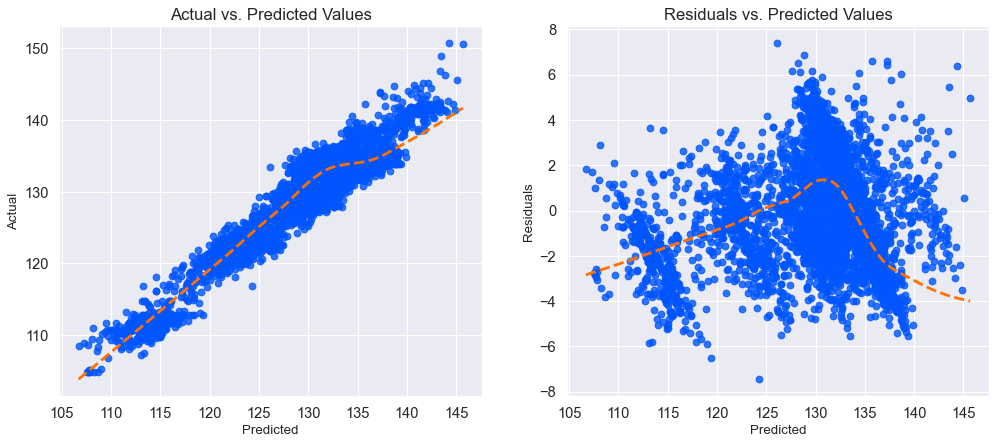

In [196]:
linear_assumption(lasso_cv_model, X_test, y_test)

#### Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


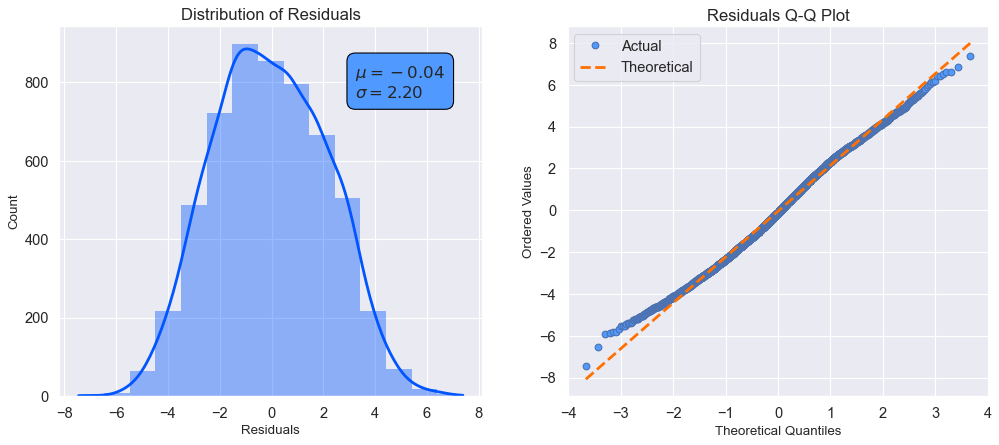

In [197]:
normal_errors_assumption(lasso_cv_model, X_test, y_test)

#### Assumption 3 - No Perfect Multicollinearity

In [198]:
multicollinearity_assumption(X_poly[lasso_coef.index]).T

5 cases of possible multicollinearity.
4 cases of definite multicollinearity.
Assumption not satisfied.


CDP  AFDP GTEP   TIT year      TAT^2    CDP year  CO^2
vif  5006867.26      60.45  222269.22  129755.28  4635201.87  4.36

####  Assumption 4 - No Autocorrelation of Residuals


In [199]:
autocorrelation_assumption(lasso_cv_model, X_test, y_test)

Durbin-Watson: 2.006
Little to no autocorrelation. Assumption satisfied. 



#### Assumption 5 - Homoscedasticity

The orange line should be flat:


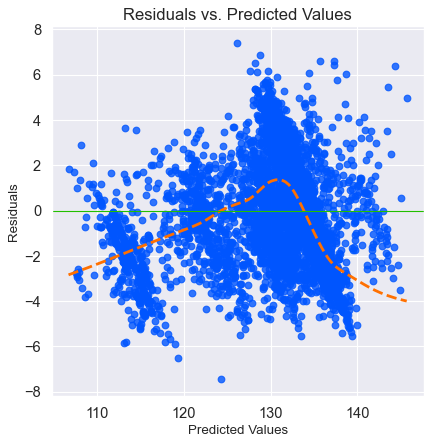

In [200]:
homoscedasticity_assumption(lasso_cv_model, X_test, y_test)

**RESULT= As can be seen, the assumption of collinearity is more satisfied in the Lasso than in the ridge, but the conditions in other assumptions are not good like Ridge.**

### 6.7. ELASTIC NET RREGRESSION

**-Elastic-Net allows a balance of both L1 and L2 penalties, which can result in better performance than a model with either one or the other penalty on problems.**

**Loss function = OLS + [ alpha l1_ratio L1-norm ] + [ 0.5 alpha (1 - l1_ratio) * L2-norm ]**

**In addition to setting an alpha value, Elastic-Net also allows us to tune the l1-ratio parameter where l1-ratio = 0 corresponds to ridge and l1-ratio = 1 corresponds to lasso. We again use cross-validated Elastic-Net regression to tune hyperparameters:**



#### Build Elastic-Net Regression Model


In [201]:
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, .998, 1], 
                                eps=0.001, n_alphas=100, cv=3, max_iter=100000)

In [202]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(cv=3, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 0.998, 1],
             max_iter=100000)

#### The l1-ratio value that results in the smallest cross-validation error is:


In [203]:
elastic_cv_model.l1_ratio_

1.0

#### The alpha value that results in the smallest cross-validation error is:

In [204]:
elastic_cv_model.alpha_

0.00631446009069223

#### Elastic-Net Model Performance on Training and Test  Data:

In [205]:
model_evaluation(elastic_cv_model, X_train, y_train, 'Elastic-Net Reg. Train')

Elastic-Net Reg. Train
MAE                     1.562285
MSE                     3.725458
RMSE                    1.930145
R2-Score                0.918717

In [206]:
model_evaluation(elastic_cv_model, X_test, y_test, 'Elastic-Net Reg. Test')

Elastic-Net Reg. Test
MAE                    1.545720
MSE                    3.702594
RMSE                   1.924213
R2-Score               0.917146

**RESULT=The accuracy of the model on the training and test data are close to each other, so the model is not overfited.
The accuracy of the Elastic-Net model has decreased slightly compared to Ridge model.**


####  Elastic-Net Regression Coefficients


In [207]:
elastic_coef = elastic_cv_model.coef_
elastic_coef

array([  0.        ,   0.30491461,   0.        ,  -0.        ,
         4.04055896,  -0.        ,   0.        ,   6.59890274,
       -16.27698009,   0.54416931,   5.44504457,   0.        ,
        -1.52258647,   0.        ,  -0.        ,   0.        ,
         2.09950121,  -0.        ,   3.69632879,   2.25692701,
         0.        ,   0.        ,   0.        ,  -0.        ,
         1.46793612,  -0.12422024,   0.44258549,  -2.30256364,
         0.        ,  -0.        ,   0.        ,   1.25474207,
        -0.33234025,  -0.00353438,   0.0417549 ])

**Non-zero coefficients in the Elastic-Net model:**

In [208]:
elastic_coef = pd.DataFrame(elastic_cv_model.coef_, index=X_poly.columns, columns=['ElasticNet Coef.'])
elastic_coef = elastic_coef[elastic_coef['ElasticNet Coef.']!=0]
elastic_coef

ElasticNet Coef.
GTEP               0.304915
CDP                4.040559
AFDP^2             6.598903
AFDP GTEP        -16.276980
AFDP TIT           0.544169
AFDP TAT           5.445045
AFDP CO           -1.522586
GTEP TAT           2.099501
GTEP CO            3.696329
GTEP year          2.256927
TIT year           1.467936
TAT^2             -0.124220
TAT CDP            0.442585
TAT CO            -2.302564
CDP year           1.254742
CO^2              -0.332340
CO year           -0.003534
year^2             0.041755

**RESULT=ElasticNet contains 18 non-zero coefficients compared to Lasso Regreesion there are more non zero coefficient with high model score.Model R2 score of  Lasso  is 89% but Model R2 score of  ElasticNet  is 91%**

#### 6.7.1. MODEL ASSUMPTION INVESTIGATION 


#### Assumption 1 - Linearity

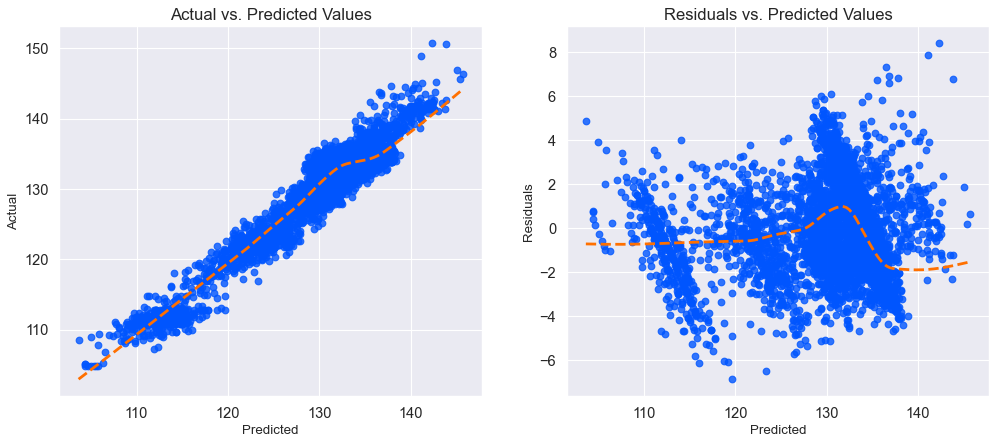

In [209]:
linear_assumption(elastic_cv_model, X_test, y_test)

#### Assumption 2 - Normality of Residuals


P-value from the test (below 0.05 generally means non-normal):   0.0
Residuals are not normally distributed. Assumption not satisfied.


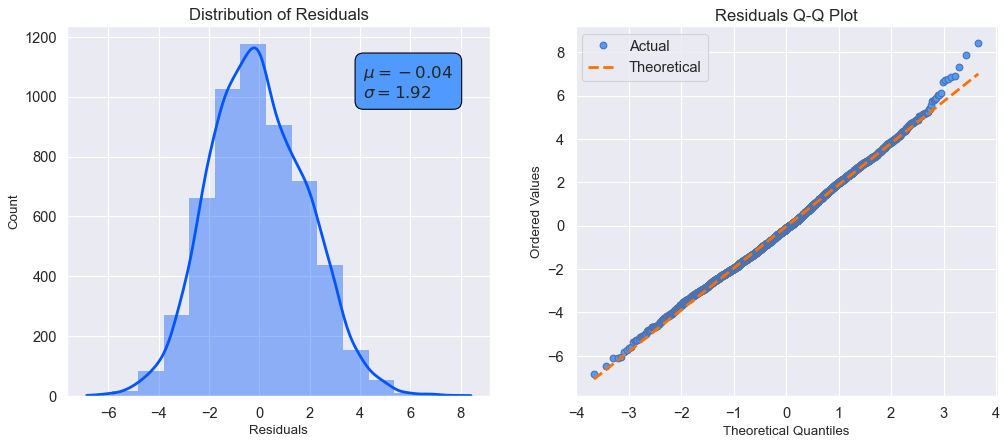

In [210]:
normal_errors_assumption(elastic_cv_model, X_test, y_test)

#### Assumption 3 - No Perfect Multicollinearity

In [211]:
multicollinearity_assumption(X_poly[elastic_coef.index]).T

18 cases of possible multicollinearity.
16 cases of definite multicollinearity.
Assumption not satisfied.


GTEP           CDP  AFDP^2  AFDP GTEP  AFDP TIT  AFDP TAT  AFDP CO     GTEP TAT  GTEP CO   GTEP year  TIT year         TAT^2       TAT CDP      TAT CO     CDP year   CO^2     CO year        year^2
vif  7.514328e+09  7.471047e+09  154.52     2216.1  75624.88  55320.88    90.73  36734053.23   257.25  16734915.2    259.14  9.591167e+08  1.412876e+10  2992804.14  15515057.08  27.54  3011717.27  9.295219e+08

#### Assumption 4 - No Autocorrelation of Residuals

In [212]:
autocorrelation_assumption(elastic_cv_model, X_test, y_test)

Durbin-Watson: 1.997
Little to no autocorrelation. Assumption satisfied. 



####  Assumption 5 - Homoscedasticity¶


The orange line should be flat:


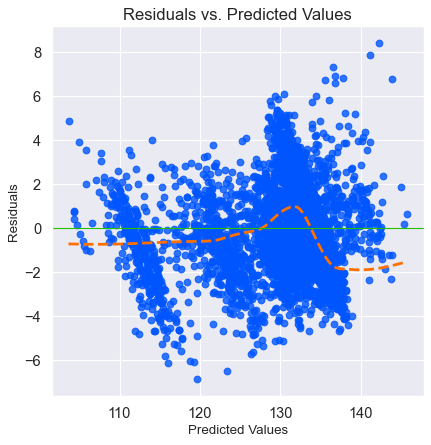

In [213]:
homoscedasticity_assumption(elastic_cv_model, X_test, y_test)

** RESULT= The assumptions are slightly better than Lasso and Ridge , but the accuracy of the model is lower than the Ridge model and higher than Lasso model**

#### 6.8. RESULT OF LINEAR REGRESSION MODEL

**During linear regression analysis, We tried to find best fitted linear regression model for our data set. First of all, we try multiple linear regression with Sklearn and Stat model and obtained 0.89 R2 score but the data did not meet assumptions and did not fit the model efectively.**

**Secondly, In order to overcome under-fitting and meet linear regression assumptions,  we try to increase the complexity of the model by adding all of the second-order terms of the features with Polynomial regression.The polynomial model R2 score is 0.93 and created 35 second terms features and it performed better than the linear model on this data set.**

**Thirdly,To reduce multicollinearity effects we used Regularization. Regularized regression put contraints on the magnitude of the coefficients and progressively shrunk them towards zero relative to the least-squares estimates. We used Ridge and Lasso Regularization Ridge Regression model R2 score is 0.93 which is the highest score compared to other models but It did not make any regularization of coefficient of features. 35 features stayed in our Ridge model. Lasso model R2 score is 0.89 which is lowest and same with the multiple linear regressiom model but it shrunk 35 features to 6 that was really good for us.** 

**Finally,We tried Elastic-Net because It allowed us to tune the l1-ratio parameter where l1-ratio = 0 corresponds to Ridge and l1-ratio = 1 corresponds to Lasso. Elastic Net model R2 score is 0.91 and shrunk 35 features to 18.Therefore we can say that the best fitted model is ElasticNet but the data did not meet assumptions of ElasticNet Regression so we can not trust our model prediction.We can try nonlinear regresssion analysis for our data.** 

### 7.NONLINEAR REGRESSION ANALYSIS

**As we can see part 6, We tried to find best linear model and compare Ridge,Lasso,ElasticNet Polynomial Regression ann then found the best proper model is Elastic Net but it did not meet Linear Regression assumptions. Therefore, we will try to nonlinear regression analysis for our data**

#### 7.1. FIND BEST NON LINEAR REGRESSION MODEL

There are lots of nonlinear regression model types. Hyperparameters adjustment is not easy and very important for obtaining the best fitted nonlinear regression model. Hence, To pick the best one of them first of all we compare them without adjusting hypermeters.


In [214]:
X= df2.drop('TEY',axis=1)
y =df2['TEY']
# Split data into train and test
np.random.seed(42)
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [215]:
scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train= scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

In [216]:

models = {"DecisionTreeRegressor": DecisionTreeRegressor(),
          "KNeighborsRegressor": KNeighborsRegressor(), 
          "Random Forest": RandomForestRegressor(),
          "GradientBoostingRegressor": GradientBoostingRegressor(),
          "SupportVector Regressor": SVR()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
 
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():

        model.fit(X_train, y_train)

        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [217]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores


{'DecisionTreeRegressor': 0.9563229740569715,
 'KNeighborsRegressor': 0.9666859260339624,
 'Random Forest': 0.9797083059141075,
 'GradientBoostingRegressor': 0.9624359816501304,
 'SupportVector Regressor': 0.9582818114900234}

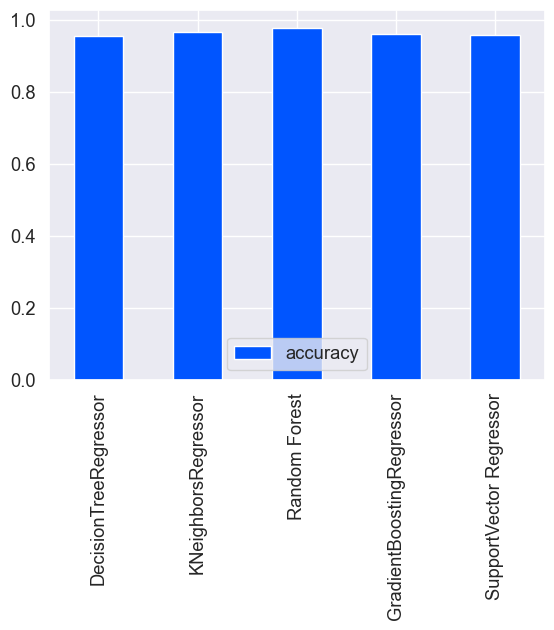

In [218]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


**RESULT= All model have really high score that is not soo good because nonlinear regression models tend to overfitting so we have to consider overfitting and check the train and test set score after conduct models.
On the other hand, We pick RandomForestRegrossor, GradientBoostingRegressor, KNeighborsRegressor and adjust their hyperparameter and pick the best fitted to our data.**

#### 7.2. KNNREGRESSOR MODEL 

In [219]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [220]:
knn_model.metric

'minkowski'

In [221]:
y_pred = knn_model.predict(X_test)

In [222]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.229815647125973

#### FIND BEST HYPERPARAMETERS  WITH GRIDSEARCH CV

In [223]:
clf = KNeighborsRegressor(n_jobs=1)
knn_params = {"n_neighbors": np.arange(1,30,1)}
# Setup GridSearchCV
knn_clf = GridSearchCV(estimator=clf,param_grid=knn_params,cv=5)
# Fit the RandomizedSearchCV version of clf
knn_clf.fit(X_train, y_train);

In [224]:
#Find best params
knn_clf.best_params_

{'n_neighbors': 6}

In [225]:
# Max predictions with the GridSearchCV classifier
knn_y_preds = knn_clf.predict(X_test)

#### CREATE BEST KNNREGRESSOR MODEL 
**We find neighbors number =6  for the best fitted KNNRegressor. Therefore we create new model with it.**

In [226]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_clf.best_params_["n_neighbors"]).fit(X_train, y_train)

In [227]:
y_pred = knn_tuned.predict(X_test)

In [228]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.2284642076646113

#### KNNRegressor Model Evaluation

In [229]:
# Evaluate the predictions
model_evaluation(knn_tuned, X_test, y_test, 'KNNRegressor Test')

KNNRegressor Test
MAE                0.821671
MSE                1.509124
RMSE               1.228464
R2-Score           0.966759

In [230]:
model_evaluation(knn_tuned, X_train, y_train, 'KNNRegressor  Train')

KNNRegressor  Train
MAE                  0.702240
MSE                  1.088596
RMSE                 1.043358
R2-Score             0.976082

#### 7.3. GRADIENTBOOSTER REGRESSOR  MODEL 

In [231]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [232]:
#?gbm_model

In [233]:
y_pred = gbm_model.predict(X_test)

In [234]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.3060439981499923

#### FIND BEST HYPERPARAMETERS WITH GRIDSEARCH CV

In [235]:
clf1 = GradientBoostingRegressor()
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth": [3,5,8],
             "n_estimators": [100,200,500],
             "subsample": [1,0.5,0.8]}

gbm_clf = GridSearchCV(estimator=clf1,param_grid=gbm_params,cv=5,n_jobs=-1)

gbm_clf.fit(X_train, y_train);

In [236]:
gbm_clf.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'subsample': 0.8}

#### CREATE GRADIENTBOOSTER REGRESSOR BEST  MODEL 

In [237]:
gbm_tuned = GradientBoostingRegressor( learning_rate= 0.1, max_depth= 8, n_estimators= 200, subsample= 0.8).fit(X_train, y_train)

In [238]:
y_pred = gbm_tuned.predict(X_test)

In [239]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.9382434538498914

#### The GradientBooster Regressor  Model Evaluation

In [240]:
model_evaluation(gbm_tuned, X_test, y_test, 'GradientBooster RegressorTest')

GradientBooster RegressorTest
MAE                            0.676563
MSE                            0.880301
RMSE                           0.938243
R2-Score                       0.980610

In [241]:
model_evaluation(gbm_tuned, X_train, y_train, 'GradientBooster Regressor Train')

GradientBooster Regressor Train
MAE                              0.344929
MSE                              0.200639
RMSE                             0.447928
R2-Score                         0.995592

#### 7.3. RANDOMFOREST REGRESSOR MODEL 

In [242]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [243]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

0.9603970596119408

#### FIND BEST HYPERPARAMETERS  WITH GRIDSEARCH CV

In [244]:
rf_model = RandomForestRegressor(random_state = 42).fit(X_train, y_train)

In [245]:

clf = RandomForestRegressor(random_state = 42).fit(X_train, y_train)
rf_params = {"max_depth": [5,8,10],
            "max_features": [2,5,10],
            "n_estimators": [200, 500, 1000, 2000],
            "min_samples_split": [2,10,80,100]}

rf_clf = GridSearchCV(estimator=clf,param_grid=rf_params,cv=5,n_jobs=-1)

rf_clf.fit(X_train, y_train);

In [246]:
rf_clf.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_split': 2,
 'n_estimators': 2000}

#### CREATE RANDOMFOREST REGRESSOR BEST  MODEL 

In [247]:
rf_model = RandomForestRegressor(random_state = 42, max_depth = 8,max_features = 2,min_samples_split = 2,n_estimators = 200)
rf_tuned = rf_model.fit(X_train, y_train)

In [248]:
y_pred = rf_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.252006311765087

#### The Random Forest Regressor Model Evaluation

In [249]:
model_evaluation(rf_tuned, X_test, y_test, 'RandomForest Regressor Test')

RandomForest Regressor Test
MAE                          0.877199
MSE                          1.567520
RMSE                         1.252006
R2-Score                     0.965473

In [250]:
model_evaluation(knn_tuned, X_train, y_train, 'RandomForest Regressor Train')

RandomForest Regressor Test
MAE                          0.702240
MSE                          1.088596
RMSE                         1.043358
R2-Score                     0.976082

#### FEATURE IMPORTANCE

In [251]:
# The feature importance of the best fitted model that is GradientBoosting Regressor 

def plot_feature(columns, importance, n=20):
    df = (pd.DataFrame({"feature":columns,
                       "feature_importances":importance})
         .sort_values("feature_importances",ascending =False)
         .reset_index(drop=True))
    # Plot the dataframe
    fig,ax = plt.subplots()
    ax.barh(df["feature"][:n],df["feature_importances"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Features imporance")
    ax.invert_yaxis()

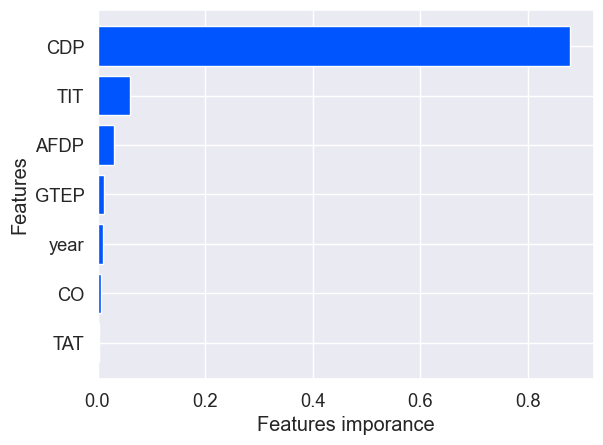

In [254]:
# Find best fitted model that is GradientBoost Regressor's feature importance
plot_feature(X.columns, gbm_tuned.feature_importances_)

**RESULT= For Gradient Boost Regressor the most important features is CDP. TIT and AFDP have slighly effect on Dependent variables (TEY).**

#### 7.4. RESULT OF NONLINEAR REGRESSION

**First of all,We compared nonlinear regression model types and pick the best proper third of them which are RandomForest,GradientBooster and KKNeighbors Regressor.**

**Secondly we conducted each models and then improve them wtih adjuting their hyperparameter and checked their evaluations that are MAE(Mean Absolute Error),MSE(Mean Squared error),
RMSE(Root Mean Squared Error)and R2. KNN Regressor gave 0.97 R2 score for train set and 0.96 for test GradientBoost Regressor gave 0.99 R2 score result for train set and 0.98 for test set . Random Forest Regrresor gave 0.97 R2 score for train set and 0.96 for test set. All of models seem to have overfitting because  their R2 score  is too high. When we have R2 score higher than 0.9 we have to suspect overfitting.**

**Thirdly,we visualized features importances according to best fitted score which is Gradient Boosting Regressor for our dataset.**


**Finally,non linear regressiom models are better fitted to our dataset than linear Regression models. But if we be sure our model fitted the data and do not have overfitted model we can try**

 **- conduct different nonlinear regression models**
 
 **- we can increase data size if it is possible**
 
 **- we can try different hperparameters for our default non linear regression mosels.**
